<a href="https://colab.research.google.com/github/samjoseph630/Unplanned-reviews-/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries (if not already available in Colab)
!pip install pandas matplotlib seaborn openpyxl

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload your dataset (Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx)

# Read the Excel file into a pandas DataFrame
file_name = 'Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'
data = pd.read_excel(file_name)

# Display the first few rows
data.head()


Saving Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx to Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx


Person ID     Age Band    Step ID      Review Type Step Start Date  \
0    1000475      18 - 64  117938297  Community Based      2024-01-17   
1    1000475      18 - 64  117513870  Community Based      2023-06-07   
2    1000475      18 - 64  116851029  Community Based      2022-12-20   
3    1000556      18 - 64  117893089  Community Based      2023-08-25   
4    1001514  65 And Over  117000755  Community Based      2023-11-27   

  Step End Date Type of Review   Reason for Unplanned  
0    2024-01-18      Unplanned        Change In Needs  
1    2023-06-07      Unplanned   Carer Related Change  
2    2023-05-25      Unplanned        Change In Needs  
3    2023-08-25      Unplanned         Provider Issue  
4    2023-12-11      Unplanned  Safeguarding Concerns

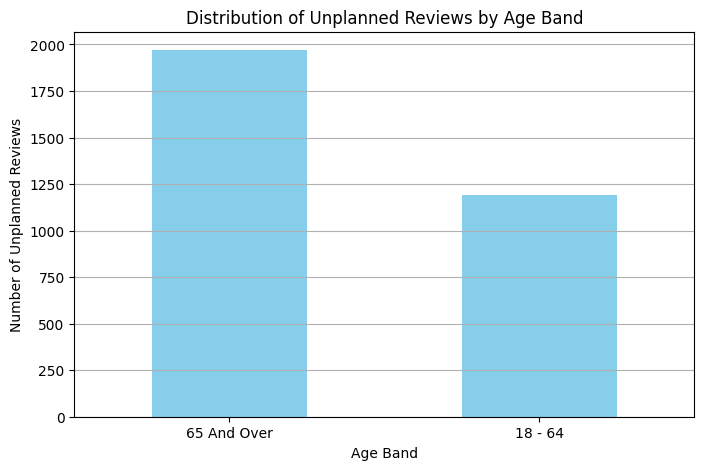

In [ ]:
# Count the frequency of unplanned reviews by age band
age_distribution = data['Age Band'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
age_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Unplanned Reviews by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Unplanned Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
# Proportion of unplanned reviews by age band
age_proportion = data['Age Band'].value_counts(normalize=True) * 100
print("Proportion of Unplanned Reviews by Age Band:\n", age_proportion)


Proportion of Unplanned Reviews by Age Band:
 Age Band
65 And Over    62.361507
18 - 64        37.638493
Name: proportion, dtype: float64


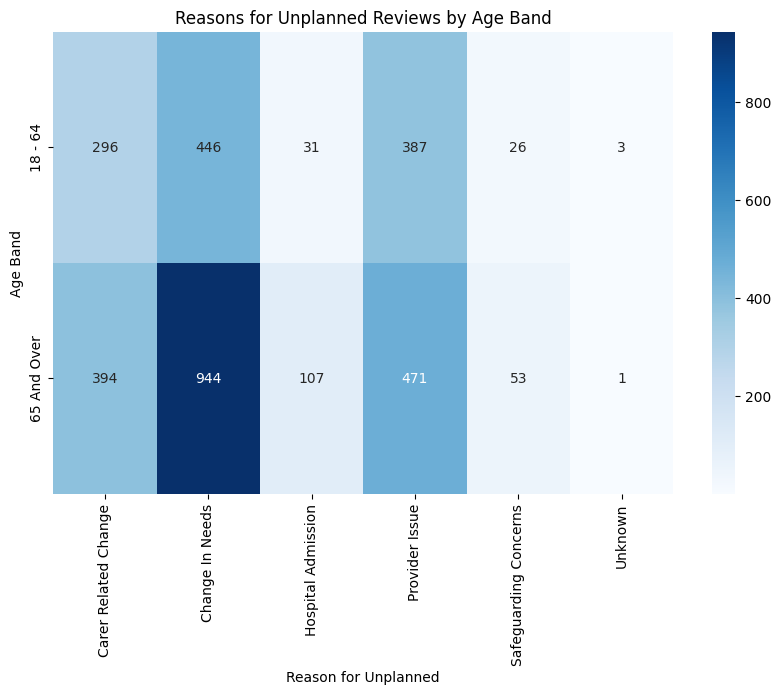

In [ ]:
# Age band and reasons for unplanned reviews
age_reason_counts = pd.crosstab(data['Age Band'], data['Reason for Unplanned'])

# Heatmap to visualize
plt.figure(figsize=(10, 6))
sns.heatmap(age_reason_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Reasons for Unplanned Reviews by Age Band')
plt.xlabel('Reason for Unplanned')
plt.ylabel('Age Band')
plt.show()


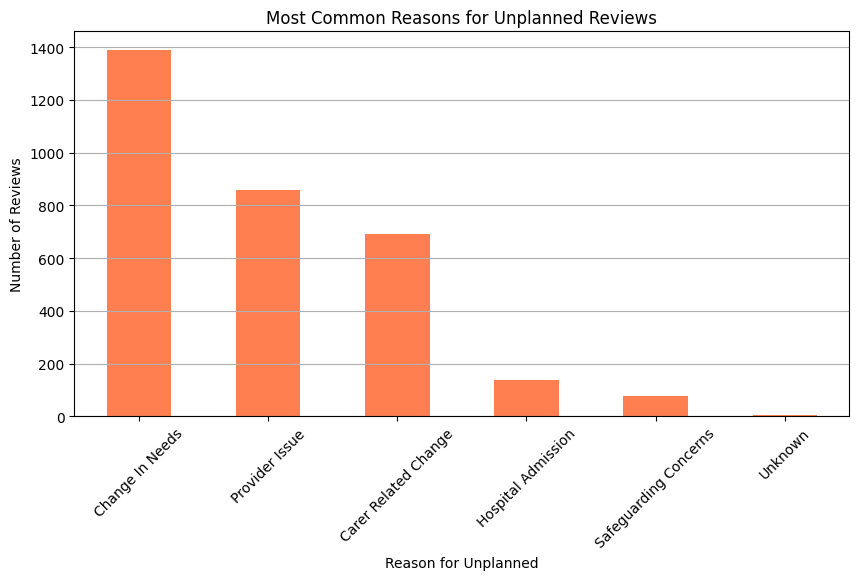

In [ ]:
# Count and plot the most common reasons
reason_counts = data['Reason for Unplanned'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
reason_counts.plot(kind='bar', color='coral')
plt.title('Most Common Reasons for Unplanned Reviews')
plt.xlabel('Reason for Unplanned')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<ipython-input-7-b8899dd392b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Reason for Unplanned', y='Duration (Days)', data=data, palette='viridis')


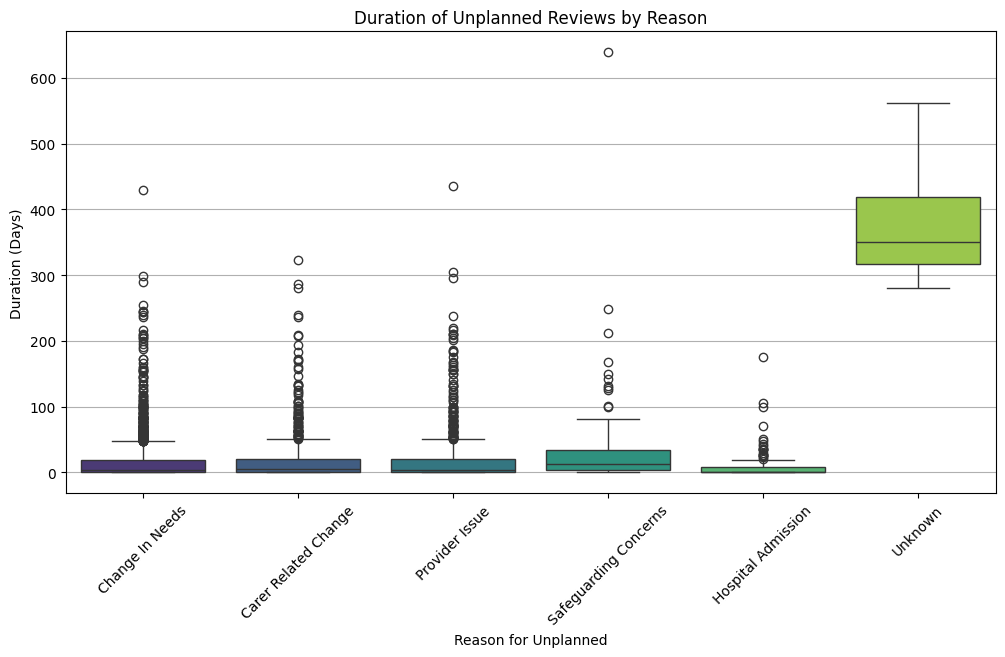

In [ ]:
# Calculate duration in days
data['Duration (Days)'] = (data['Step End Date'] - data['Step Start Date']).dt.days

# Boxplot: Duration by reason
plt.figure(figsize=(12, 6))
sns.boxplot(x='Reason for Unplanned', y='Duration (Days)', data=data, palette='viridis')
plt.title('Duration of Unplanned Reviews by Reason')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


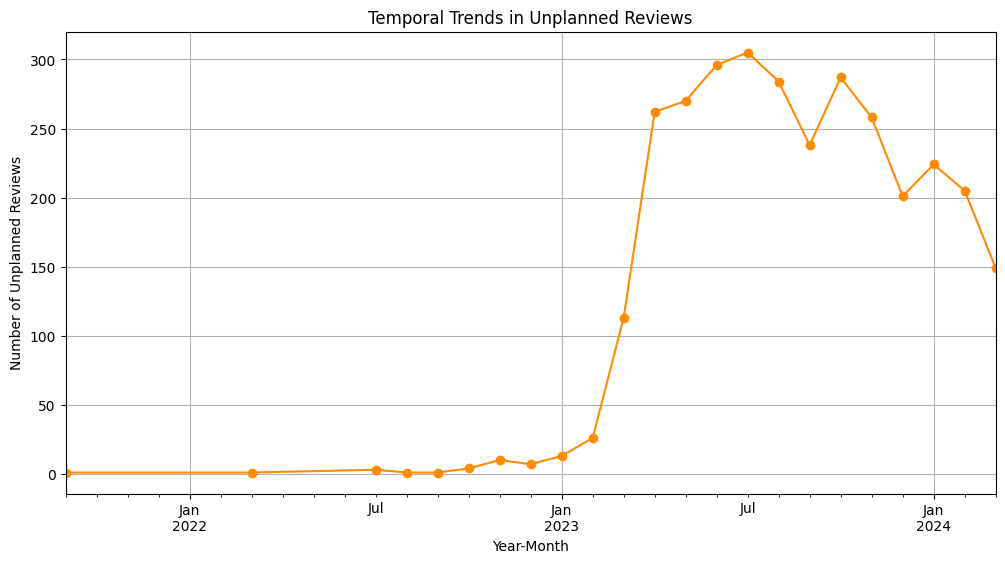

In [ ]:
# Extract Year-Month
data['Year-Month'] = data['Step Start Date'].dt.to_period('M')

# Count occurrences by month
monthly_trends = data['Year-Month'].value_counts().sort_index()

# Plot trends
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', color='darkorange')
plt.title('Temporal Trends in Unplanned Reviews')
plt.xlabel('Year-Month')
plt.ylabel('Number of Unplanned Reviews')
plt.grid()
plt.show()


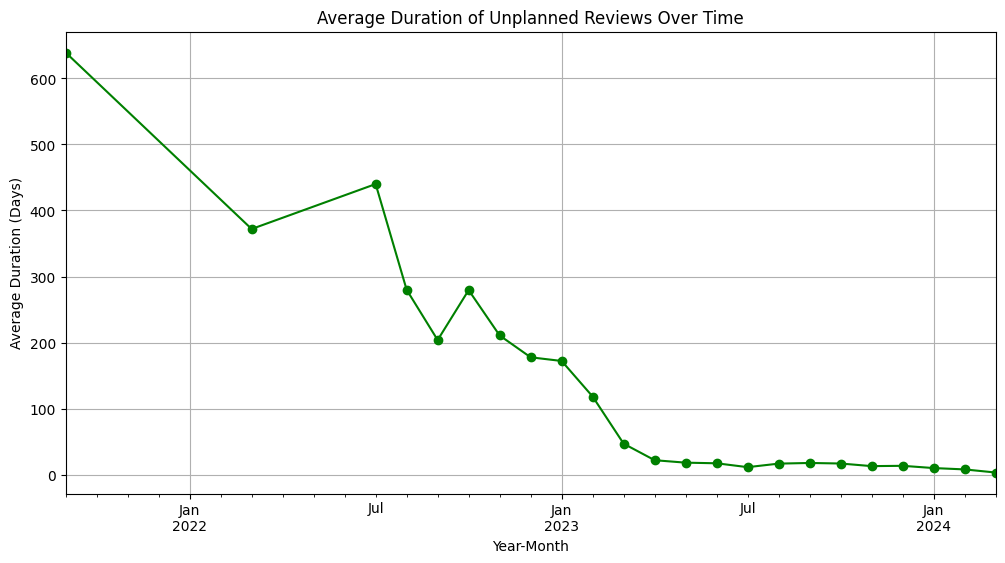

In [ ]:
# Group by Year-Month and calculate average duration
avg_duration_trends = data.groupby('Year-Month')['Duration (Days)'].mean()

# Plot average duration
plt.figure(figsize=(12, 6))
avg_duration_trends.plot(kind='line', marker='o', color='green')
plt.title('Average Duration of Unplanned Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Duration (Days)')
plt.grid()
plt.show()


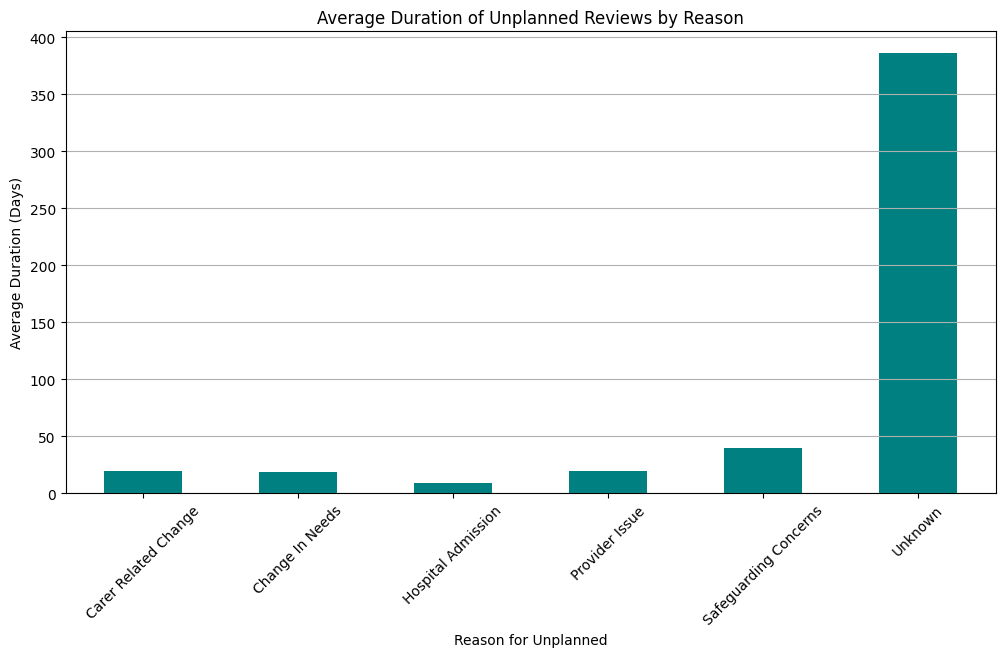

In [ ]:
# Compare average duration by reason
avg_duration_by_reason = data.groupby('Reason for Unplanned')['Duration (Days)'].mean()

# Plot
plt.figure(figsize=(12, 6))
avg_duration_by_reason.plot(kind='bar', color='teal')
plt.title('Average Duration of Unplanned Reviews by Reason')
plt.xlabel('Reason for Unplanned')
plt.ylabel('Average Duration (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
data['Age Band Encoded'] = label_encoder.fit_transform(data['Age Band'])
data['Reason Encoded'] = label_encoder.fit_transform(data['Reason for Unplanned'])

# Prepare features and target
X = data[['Age Band Encoded']]
y = data['Reason Encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 44.41%


In [ ]:

from scipy.stats import chi2_contingency

# Create a contingency table
age_reason_counts = pd.crosstab(data['Age Band'], data['Reason for Unplanned'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(age_reason_counts)

# Results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant difference in the frequency of unplanned reviews between age groups.")
else:
    print("There is no significant difference in the frequency of unplanned reviews between age groups.")


Chi-Square Statistic: 63.43634838646077
P-Value: 2.3641226227418326e-12
Degrees of Freedom: 5
There is a significant difference in the frequency of unplanned reviews between age groups.


In [ ]:
# Count total reviews by age group
age_counts = data['Age Band'].value_counts()

# Calculate proportions
age_proportions = age_counts / age_counts.sum() * 100

# Display results
print("Proportion of Unplanned Reviews by Age Band:")
print(age_proportions)


Proportion of Unplanned Reviews by Age Band:
Age Band
65 And Over    62.361507
18 - 64        37.638493
Name: count, dtype: float64


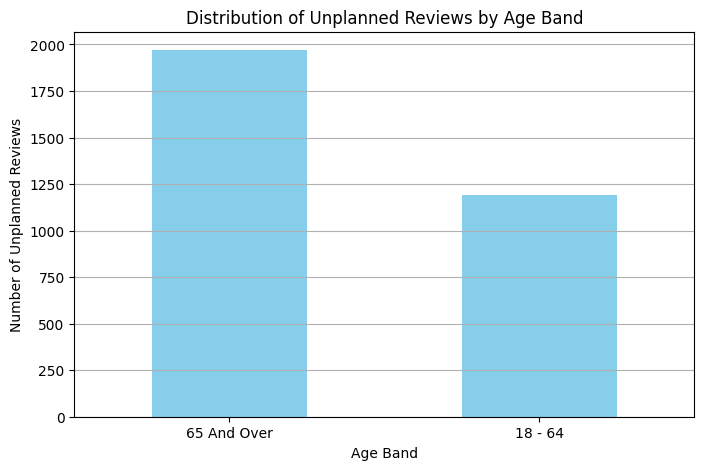

In [ ]:
# Plot the distribution
plt.figure(figsize=(8, 5))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Unplanned Reviews by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Unplanned Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


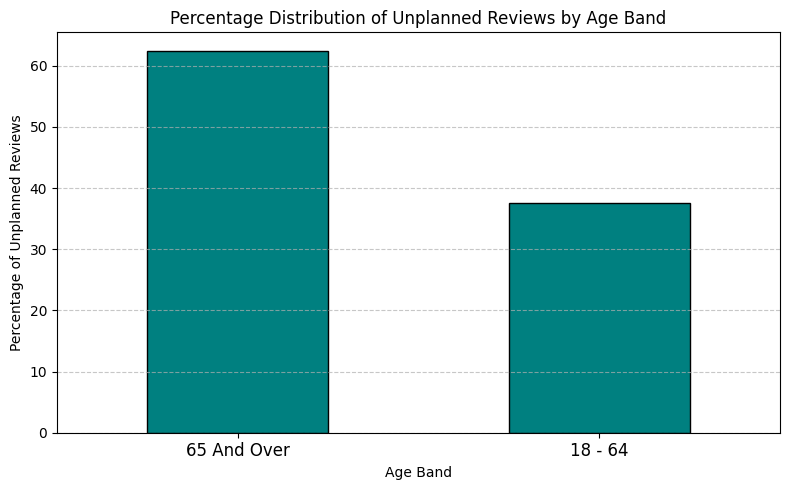

In [ ]:
# Plot the proportions with teal-green styling
plt.figure(figsize=(8, 5))
age_proportions.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Percentage Distribution of Unplanned Reviews by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Percentage of Unplanned Reviews')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


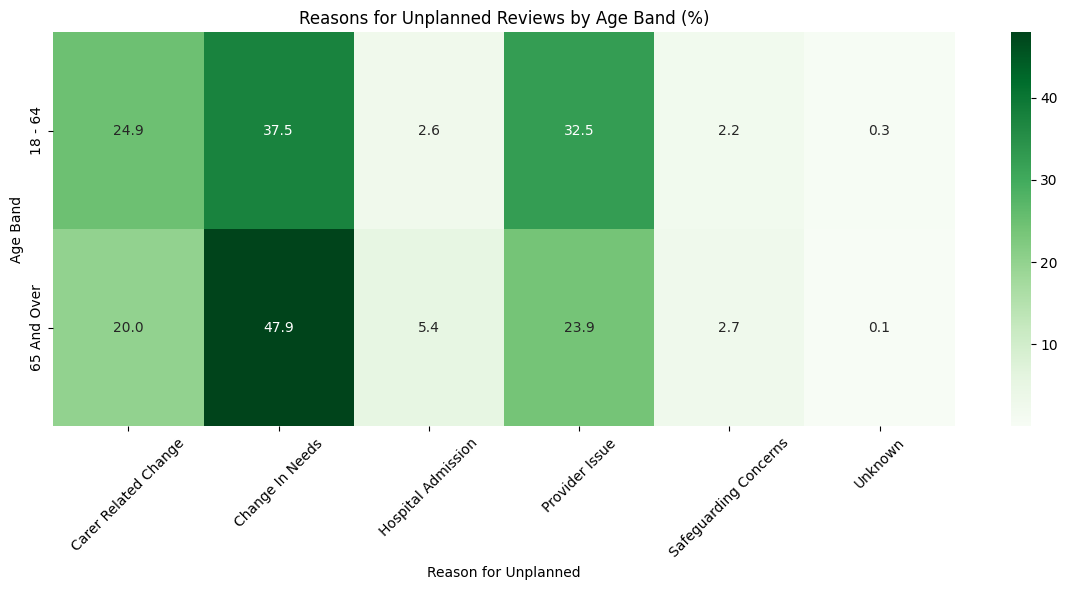

In [ ]:
# Cross-tabulation of Age Band and Reason for Unplanned
age_reason_counts = pd.crosstab(data['Age Band'], data['Reason for Unplanned'])

# Normalize by age group to get percentages
age_reason_percentages = age_reason_counts.div(age_reason_counts.sum(axis=1), axis=0) * 100

# Heatmap to visualize trends
plt.figure(figsize=(12, 6))
sns.heatmap(age_reason_percentages, annot=True, fmt=".1f", cmap="Greens")
plt.title('Reasons for Unplanned Reviews by Age Band (%)')
plt.xlabel('Reason for Unplanned')
plt.ylabel('Age Band')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


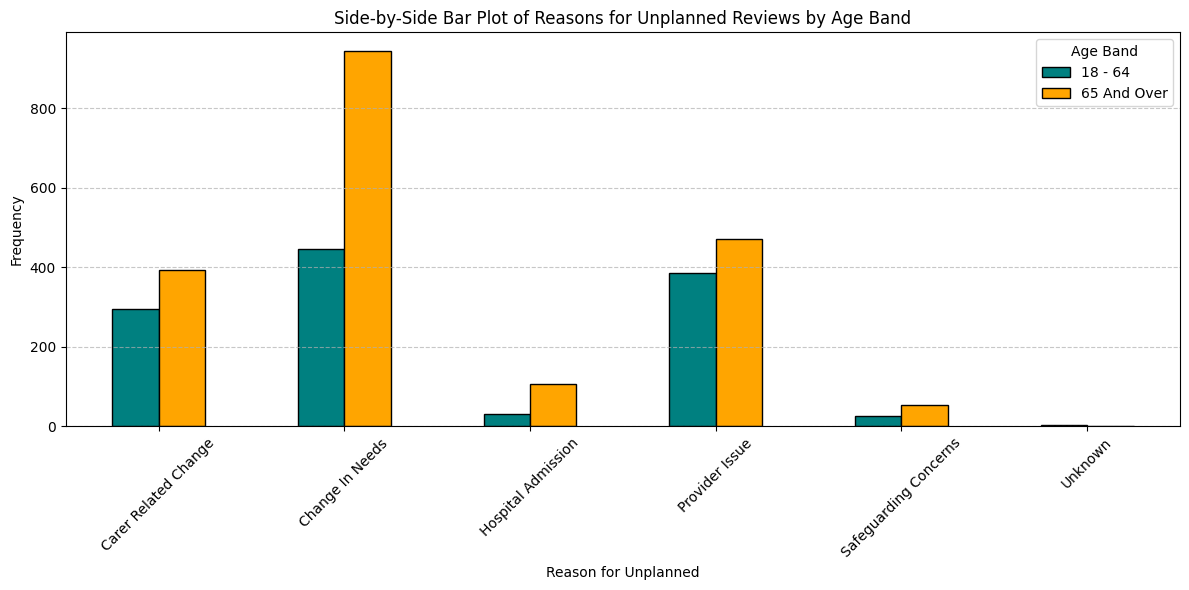

In [ ]:
# Create a side-by-side bar plot for different age groups and reasons for unplanned reviews

# Generate the data for plotting
age_reason_counts = pd.crosstab(data['Reason for Unplanned'], data['Age Band'])

# Plot side-by-side bars
age_reason_counts.plot(
    kind='bar',
    figsize=(12, 6),
    color=['teal', 'orange'],
    edgecolor='black'
)

# Add titles and labels
plt.title('Side-by-Side Bar Plot of Reasons for Unplanned Reviews by Age Band')
plt.xlabel('Reason for Unplanned')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Age Band')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# Count the number of reviews per individual
repeat_counts = data['Person ID'].value_counts()

# Identify repeat reviewers
repeat_reviewers = repeat_counts[repeat_counts > 1]

# Output summary
print(f"Total number of repeat reviewers: {len(repeat_reviewers)}")
print(f"Percentage of repeat reviewers: {len(repeat_reviewers) / len(data['Person ID'].unique()) * 100:.2f}%")


Total number of repeat reviewers: 716
Percentage of repeat reviewers: 36.33%


In [ ]:
# Identify individuals with more than one review
repeat_counts = data['Person ID'].value_counts()
repeat_reviewers = repeat_counts[repeat_counts > 1]

# Create a dataset for repeat reviewers
repeat_data = data[data['Person ID'].isin(repeat_reviewers.index)]


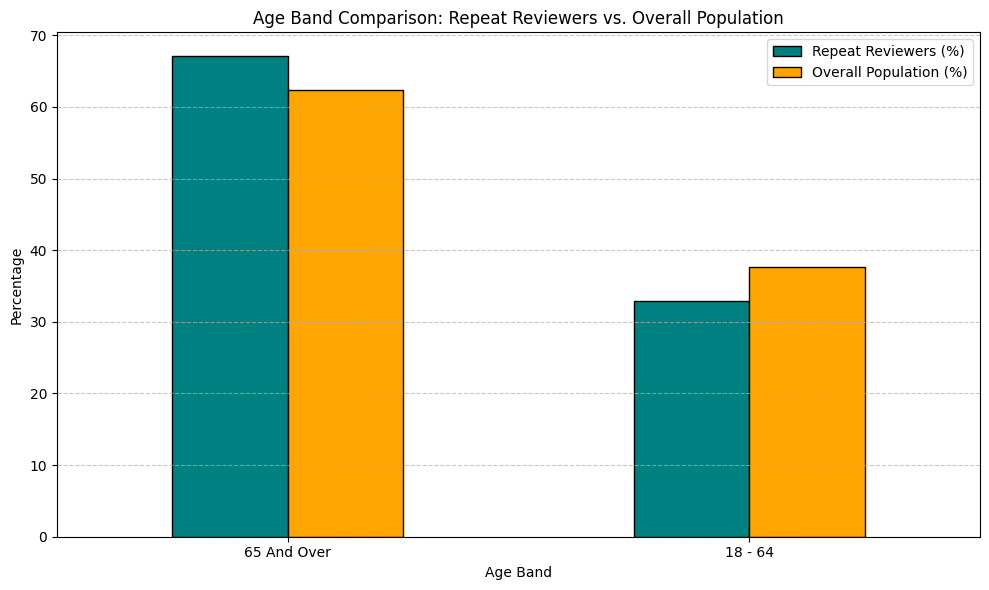

In [ ]:
# Calculate proportions for repeat reviewers
repeat_age_proportions = repeat_data['Age Band'].value_counts(normalize=True) * 100

# Calculate proportions for the overall dataset
overall_age_proportions = data['Age Band'].value_counts(normalize=True) * 100

# Combine the proportions into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Repeat Reviewers (%)': repeat_age_proportions,
    'Overall Population (%)': overall_age_proportions
}).fillna(0)

# Plot for comparison
comparison_df.plot(kind='bar', figsize=(10, 6), color=['teal', 'orange'], edgecolor='black')
plt.title('Age Band Comparison: Repeat Reviewers vs. Overall Population')
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Count the number of reviews per individual
repeat_counts = data['Person ID'].value_counts()

# Identify individuals with repeat reviews (more than one review)
repeat_reviewers = repeat_counts[repeat_counts > 1]

# Total number of repeat reviewers
total_repeat_reviewers = len(repeat_reviewers)

# Percentage of individuals with repeat reviews
percentage_repeat_reviewers = (total_repeat_reviewers / data['Person ID'].nunique()) * 100

# Print results
print(f"Total number of individuals with repeat unplanned reviews: {total_repeat_reviewers}")
print(f"Percentage of individuals with repeat unplanned reviews: {percentage_repeat_reviewers:.2f}%")


Total number of individuals with repeat unplanned reviews: 716
Percentage of individuals with repeat unplanned reviews: 36.33%


In [ ]:
# Filter the dataset to include only repeat reviewers
repeat_data = data[data['Person ID'].isin(repeat_reviewers.index)]

# Count the most common reasons for repeat reviews
most_common_repeat_reasons = repeat_data['Reason for Unplanned'].value_counts()

# Display the results
print("Most Common Reasons for Repeat Reviews:")
print(most_common_repeat_reasons)


Most Common Reasons for Repeat Reviews:
Reason for Unplanned
Change In Needs          903
Provider Issue           450
Carer Related Change     417
Hospital Admission        92
Safeguarding Concerns     42
Name: count, dtype: int64


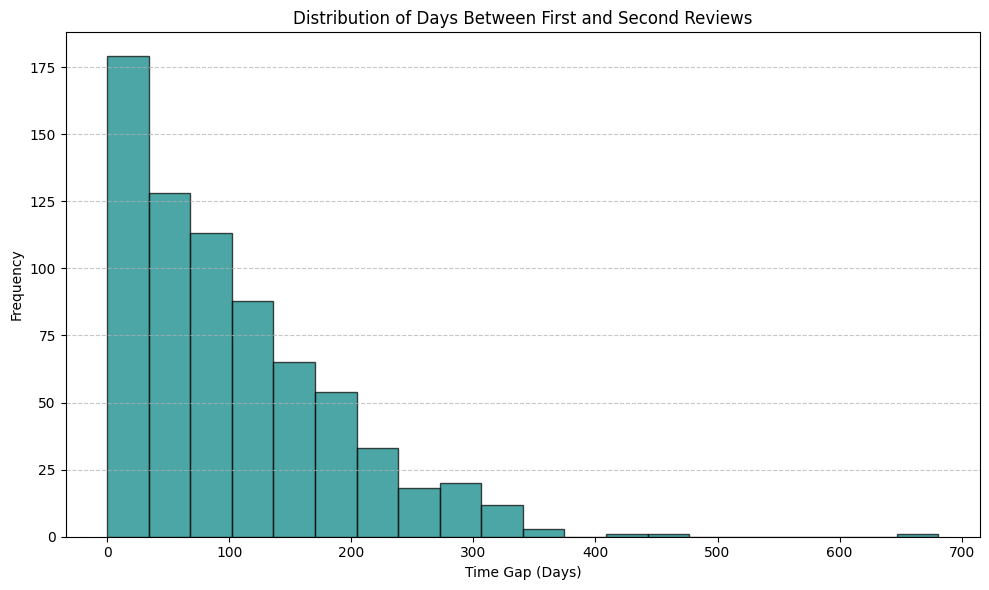

In [ ]:
# Sort data by Person ID and Step Start Date
sorted_data = data.sort_values(by=['Person ID', 'Step Start Date'])

# Calculate the time gap between consecutive reviews for each individual
sorted_data['Time Gap (Days)'] = sorted_data.groupby('Person ID')['Step Start Date'].diff().dt.days

# Filter the dataset to include only repeat reviewers
repeat_data = sorted_data[sorted_data['Person ID'].isin(repeat_reviewers.index)]

# Extract the time gap between the first and second review for each person
time_gap_first_second = repeat_data.groupby('Person ID').first()['Time Gap (Days)']

# Plot a histogram of the time gaps
plt.figure(figsize=(10, 6))
time_gap_first_second.plot(kind='hist', bins=20, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Days Between First and Second Reviews')
plt.xlabel('Time Gap (Days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


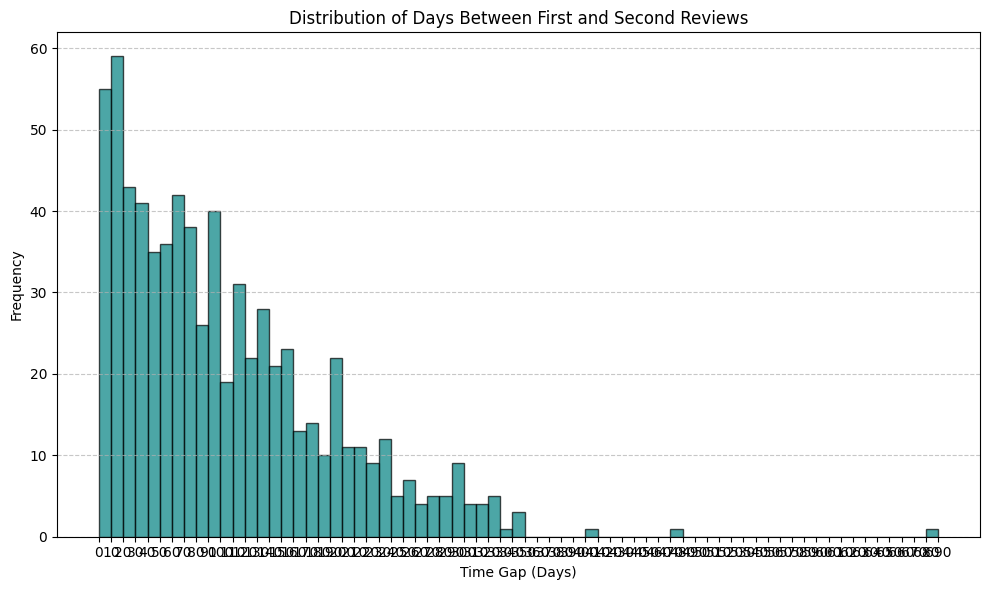

In [ ]:
# Calculate the range of the time gaps and determine bin edges
time_gap_first_second = repeat_data.groupby('Person ID').first()['Time Gap (Days)']
bin_edges = range(0, int(time_gap_first_second.max()) + 10, 10)  # 10-day intervals

# Plot a histogram of the time gaps with specified bin edges
plt.figure(figsize=(10, 6))
plt.hist(time_gap_first_second.dropna(), bins=bin_edges, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Days Between First and Second Reviews')
plt.xlabel('Time Gap (Days)')
plt.ylabel('Frequency')
plt.xticks(bin_edges)  # Show bin intervals on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the range of the time gaps
time_gap_first_second = repeat_data.groupby('Person ID').first()['Time Gap (Days)']

# Define bins with 10-day intervals
bin_edges = range(0, int(time_gap_first_second.max()) + 10, 10)

# Count the frequency of time gaps within each bin
time_gap_table = pd.cut(time_gap_first_second.dropna(), bins=bin_edges).value_counts().sort_index()

# Convert to a DataFrame for better presentation
time_gap_df = time_gap_table.reset_index()
time_gap_df.columns = ['Time Gap Interval (Days)', 'Frequency']

# Display the table
print(time_gap_df)


   Time Gap Interval (Days)  Frequency
0                   (0, 10]         46
1                  (10, 20]         55
2                  (20, 30]         47
3                  (30, 40]         40
4                  (40, 50]         36
..                      ...        ...
64               (640, 650]          0
65               (650, 660]          0
66               (660, 670]          0
67               (670, 680]          0
68               (680, 690]          1

[69 rows x 2 columns]


In [ ]:
# Calculate the range of the time gaps
time_gap_first_second = repeat_data.groupby('Person ID').first()['Time Gap (Days)']

# Define bins with 10-day intervals
bin_edges = range(0, int(time_gap_first_second.max()) + 10, 10)

# Count the frequency of time gaps within each bin
time_gap_table = pd.cut(time_gap_first_second.dropna(), bins=bin_edges, right=False).value_counts().sort_index()

# Format the bin intervals for clarity
time_gap_df = time_gap_table.reset_index()
time_gap_df.columns = ['Time Gap Interval (Days)', 'Frequency']
time_gap_df['Time Gap Interval (Days)'] = time_gap_df['Time Gap Interval (Days)'].astype(str)

# Ensure full table display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Display the formatted table
print(time_gap_df)


   Time Gap Interval (Days)  Frequency
0                   [0, 10)         55
1                  [10, 20)         59
2                  [20, 30)         43
3                  [30, 40)         41
4                  [40, 50)         35
5                  [50, 60)         36
6                  [60, 70)         42
7                  [70, 80)         38
8                  [80, 90)         26
9                 [90, 100)         40
10               [100, 110)         19
11               [110, 120)         31
12               [120, 130)         22
13               [130, 140)         28
14               [140, 150)         21
15               [150, 160)         23
16               [160, 170)         13
17               [170, 180)         14
18               [180, 190)         10
19               [190, 200)         22
20               [200, 210)         11
21               [210, 220)         11
22               [220, 230)          9
23               [230, 240)         12
24               [240, 25

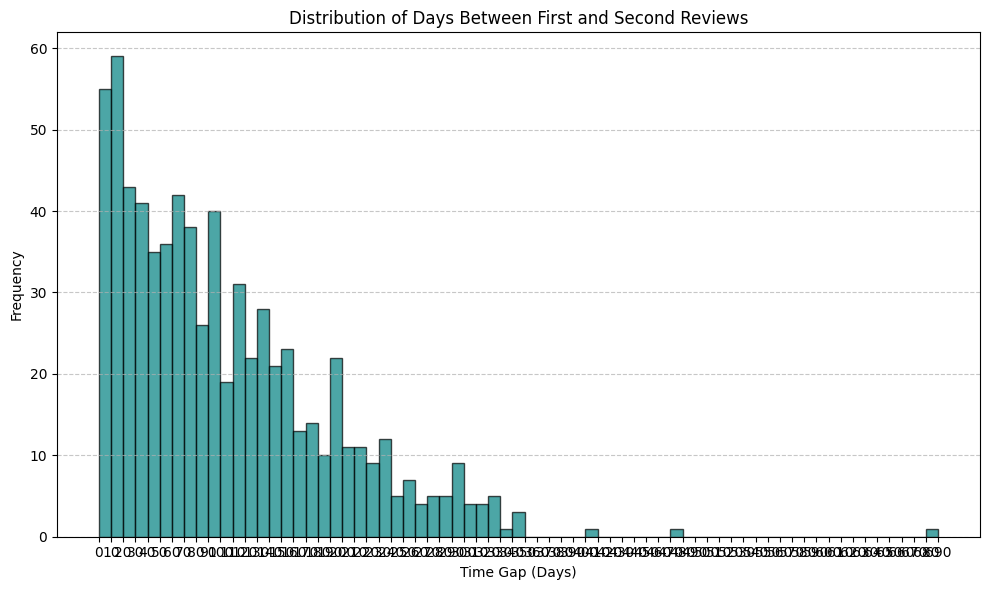

In [ ]:
# Plot a histogram to visualize clustering
plt.figure(figsize=(10, 6))
plt.hist(time_gap_first_second.dropna(), bins=bin_edges, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Days Between First and Second Reviews')
plt.xlabel('Time Gap (Days)')
plt.ylabel('Frequency')
plt.xticks(bin_edges)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the frequency of time gaps by interval
time_gap_table = pd.cut(time_gap_first_second.dropna(), bins=bin_edges, right=False).value_counts().sort_index()

# Convert to DataFrame for better analysis
time_gap_df = time_gap_table.reset_index()
time_gap_df.columns = ['Time Gap Interval (Days)', 'Frequency']

# Add a percentage column for better interpretation
time_gap_df['Percentage'] = (time_gap_df['Frequency'] / time_gap_df['Frequency'].sum()) * 100

# Display the table
print(time_gap_df)


   Time Gap Interval (Days)  Frequency  Percentage
0                   [0, 10)         55    7.681564
1                  [10, 20)         59    8.240223
2                  [20, 30)         43    6.005587
3                  [30, 40)         41    5.726257
4                  [40, 50)         35    4.888268
5                  [50, 60)         36    5.027933
6                  [60, 70)         42    5.865922
7                  [70, 80)         38    5.307263
8                  [80, 90)         26    3.631285
9                 [90, 100)         40    5.586592
10               [100, 110)         19    2.653631
11               [110, 120)         31    4.329609
12               [120, 130)         22    3.072626
13               [130, 140)         28    3.910615
14               [140, 150)         21    2.932961
15               [150, 160)         23    3.212291
16               [160, 170)         13    1.815642
17               [170, 180)         14    1.955307
18               [180, 190)    

In [ ]:
from scipy.stats import chisquare

# Perform the Chi-Square test
observed_frequencies = time_gap_table.values
expected_frequencies = [time_gap_table.sum() / len(time_gap_table)] * len(time_gap_table)  # Uniform distribution
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The time gaps are not uniformly distributed, indicating clustering around certain intervals.")
else:
    print("The time gaps are uniformly distributed, with no significant clustering.")


Chi-Square Statistic: 1530.1620111731847
P-Value: 9.382570902905917e-275
The time gaps are not uniformly distributed, indicating clustering around certain intervals.


In [ ]:
# Identify intervals with significantly higher frequencies
significant_clusters = time_gap_df[time_gap_df['Frequency'] > time_gap_df['Frequency'].mean()]

# Display significant clusters
print("Intervals with Clustering:")
print(significant_clusters)


Intervals with Clustering:
   Time Gap Interval (Days)  Frequency  Percentage
0                   [0, 10)         55    7.681564
1                  [10, 20)         59    8.240223
2                  [20, 30)         43    6.005587
3                  [30, 40)         41    5.726257
4                  [40, 50)         35    4.888268
5                  [50, 60)         36    5.027933
6                  [60, 70)         42    5.865922
7                  [70, 80)         38    5.307263
8                  [80, 90)         26    3.631285
9                 [90, 100)         40    5.586592
10               [100, 110)         19    2.653631
11               [110, 120)         31    4.329609
12               [120, 130)         22    3.072626
13               [130, 140)         28    3.910615
14               [140, 150)         21    2.932961
15               [150, 160)         23    3.212291
16               [160, 170)         13    1.815642
17               [170, 180)         14    1.955307
19  

In [ ]:
# Filter the dataset to include only repeat reviewers
repeat_data = data[data['Person ID'].isin(repeat_reviewers.index)]

# Count the most common reasons for repeat reviews
most_common_repeat_reasons = repeat_data['Reason for Unplanned'].value_counts()

# Convert to a DataFrame for better presentation
most_common_repeat_reasons_df = most_common_repeat_reasons.reset_index()
most_common_repeat_reasons_df.columns = ['Reason for Unplanned', 'Frequency']

# Display the most common reasons
print("Most Common Reasons for Repeat Reviews:")
print(most_common_repeat_reasons_df)


Most Common Reasons for Repeat Reviews:
    Reason for Unplanned  Frequency
0        Change In Needs        903
1         Provider Issue        450
2   Carer Related Change        417
3     Hospital Admission         92
4  Safeguarding Concerns         42


In [ ]:
# Identify individuals with repeat reviews
repeat_counts = data['Person ID'].value_counts()
repeat_reviewers = repeat_counts[repeat_counts > 1].index

# Create a dataset for repeat reviewers
repeat_data = data[data['Person ID'].isin(repeat_reviewers)]


In [ ]:
# Proportion of Age Band for repeat reviewers
repeat_age_distribution = repeat_data['Age Band'].value_counts(normalize=True) * 100

# Proportion of Age Band for overall population
overall_age_distribution = data['Age Band'].value_counts(normalize=True) * 100

# Combine for comparison
age_comparison = pd.DataFrame({
    'Repeat Reviewers (%)': repeat_age_distribution,
    'Overall Population (%)': overall_age_distribution
}).fillna(0)

print("Comparison of Age Band Proportions:")
print(age_comparison)


Comparison of Age Band Proportions:
             Repeat Reviewers (%)  Overall Population (%)
Age Band                                                 
65 And Over             67.069328               62.361507
18 - 64                 32.930672               37.638493


In [ ]:
# Cross-tabulation of reasons by age band for repeat reviewers
reason_age_distribution = pd.crosstab(repeat_data['Reason for Unplanned'], repeat_data['Age Band'], normalize='columns') * 100

print("Distribution of Reasons by Age Band for Repeat Reviewers:")
print(reason_age_distribution)


Distribution of Reasons by Age Band for Repeat Reviewers:
Age Band                 18 - 64  65 And Over
Reason for Unplanned                         
Carer Related Change   24.720893    20.516836
Change In Needs        40.031898    51.057165
Hospital Admission      2.232855     6.108066
Provider Issue         31.100478    19.968677
Safeguarding Concerns   1.913876     2.349256


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(repeat_data['Age Band'], repeat_data['Reason for Unplanned'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)

if p < 0.05:
    print("There is a significant correlation between demographics (Age Band) and reasons for repeat reviews.")
else:
    print("No significant correlation between demographics and reasons for repeat reviews.")


Chi-Square Statistic: 49.651183154224746
P-Value: 4.2700488810171685e-10
There is a significant correlation between demographics (Age Band) and reasons for repeat reviews.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
data['Repeat'] = data['Person ID'].isin(repeat_reviewers).astype(int)  # Target variable
data['Age Band Encoded'] = label_encoder.fit_transform(data['Age Band'])
data['Reason Encoded'] = label_encoder.fit_transform(data['Reason for Unplanned'])

# Prepare features and target
X = data[['Age Band Encoded', 'Reason Encoded']]
y = data['Repeat']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model accuracy
accuracy = model.score(X_test, y_test)
print(f"Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")


Logistic Regression Model Accuracy: 57.59%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print(f"Random Forest Accuracy: {model.score(X_test, y_test) * 100:.2f}%")


Random Forest Accuracy: 57.28%


In [ ]:
# Example: Adding Duration to Features
data['Duration (Days)'] = (data['Step End Date'] - data['Step Start Date']).dt.days
X = data[['Age Band Encoded', 'Reason Encoded', 'Duration (Days)']]


In [ ]:
data['Age_Reason'] = data['Age Band'] + "_" + data['Reason for Unplanned']
X = pd.get_dummies(data[['Age Band Encoded', 'Reason Encoded', 'Age_Reason']])


In [ ]:
# Extract the month from the Step Start Date
repeat_data['Review Month'] = repeat_data['Step Start Date'].dt.month

# Count the number of repeat reviews by month
monthly_repeat_counts = repeat_data['Review Month'].value_counts().sort_index()

# Create a DataFrame for better presentation
monthly_repeat_df = monthly_repeat_counts.reset_index()
monthly_repeat_df.columns = ['Month', 'Frequency']

# Map numeric months to month names for clarity
monthly_repeat_df['Month'] = monthly_repeat_df['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

# Display the result
print("Monthly Repeat Reviews Frequency:")
print(monthly_repeat_df)


Monthly Repeat Reviews Frequency:
        Month  Frequency
0     January        146
1    February        135
2       March        148
3       April        144
4         May        159
5        June        187
6        July        192
7      August        167
8   September        147
9     October        173
10   November        167
11   December        139


<ipython-input-47-94df9920611f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_data['Review Month'] = repeat_data['Step Start Date'].dt.month


<ipython-input-48-bf65dc3cfd42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_data['Review Month'] = repeat_data['Step Start Date'].dt.month


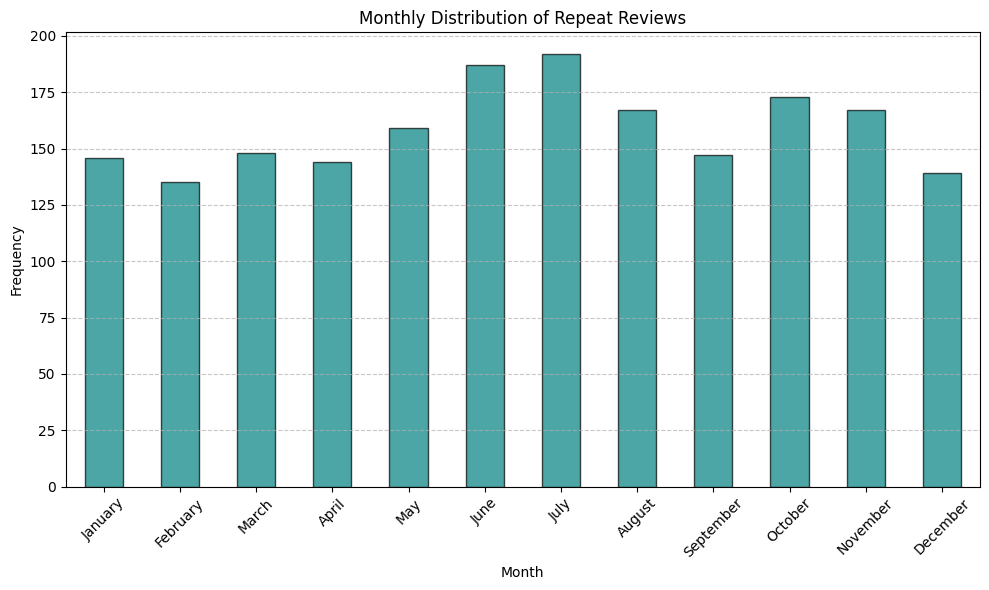

In [ ]:
# Extract the month from the Step Start Date
repeat_data['Review Month'] = repeat_data['Step Start Date'].dt.month

# Count the number of repeat reviews by month
monthly_repeat_counts = repeat_data['Review Month'].value_counts().sort_index()

# Map numeric months to month names for clarity
monthly_repeat_counts.index = monthly_repeat_counts.index.map(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

# Plot the chart
plt.figure(figsize=(10, 6))
monthly_repeat_counts.plot(kind='bar', color='teal', edgecolor='black', alpha=0.7)
plt.title('Monthly Distribution of Repeat Reviews')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Count the number of repeat reviews by month
monthly_repeat_counts = repeat_data['Review Month'].value_counts().sort_index()

# Convert to observed frequencies
observed_frequencies = monthly_repeat_counts.values


In [ ]:
from scipy.stats import chisquare

# Calculate expected frequencies (uniform distribution)
total_reviews = observed_frequencies.sum()
expected_frequencies = [total_reviews / len(observed_frequencies)] * len(observed_frequencies)

# Perform Chi-Square Test
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Display results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The differences in repeat reviews across months are statistically significant.")
else:
    print("The differences in repeat reviews across months are not statistically significant.")


Chi-Square Statistic: 24.142857142857142
P-Value: 0.012144186546679977
The differences in repeat reviews across months are statistically significant.


In [ ]:
# Cross-tabulate reasons by months for repeat reviews
reasons_by_month = pd.crosstab(repeat_data['Reason for Unplanned'], repeat_data['Review Month'])

# Filter for high-frequency months
high_month_reasons = reasons_by_month[[6, 7, 8]]  # Example: June, July, August
print("Reasons Driving Repeat Reviews in High Months:")
print(high_month_reasons)


Reasons Driving Repeat Reviews in High Months:
Review Month            6   7   8
Reason for Unplanned             
Carer Related Change   35  31  51
Change In Needs        82  90  71
Hospital Admission      9   7   9
Provider Issue         56  60  31
Safeguarding Concerns   5   4   5


In [ ]:
# Filter for December and check the reasons for repeat reviews
holiday_data = repeat_data[repeat_data['Review Month'] == 12]
holiday_reasons = holiday_data['Reason for Unplanned'].value_counts()
print("Reasons for Repeat Reviews in December:")
print(holiday_reasons)


Reasons for Repeat Reviews in December:
Reason for Unplanned
Change In Needs          64
Provider Issue           36
Carer Related Change     28
Hospital Admission        9
Safeguarding Concerns     2
Name: count, dtype: int64


In [ ]:
# Filter repeat reviews for high-frequency months
high_months_data = repeat_data[repeat_data['Review Month'].isin([6, 7, 8])]  # Example for June, July, August

# Analyze the distribution of review types in high months
review_type_distribution = high_months_data['Review Type'].value_counts()
print("Review Types in High Months:")
print(review_type_distribution)


Review Types in High Months:
Review Type
Community Based    502
Lt Care             44
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `df`

# Calculate the total count of unplanned reviews per age band
age_band_counts = df['Age Band'].value_counts()

# Calculate percentages
age_band_percentages = (age_band_counts / age_band_counts.sum()) * 100

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.bar(age_band_percentages.index, age_band_percentages.values)

# Add labels and title
plt.xlabel('Age Band')
plt.ylabel('Percentage of Unplanned Reviews')
plt.title('Distribution of Unplanned Reviews Across Age Bands')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_file_path.xlsx' with the actual file path in your Google Colab environment
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate the total count of unplanned reviews per age band
age_band_counts = df_unplanned['Age Band'].value_counts()

# Calculate percentages
age_band_percentages = (age_band_counts / age_band_counts.sum()) * 100

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.bar(age_band_percentages.index, age_band_percentages.values)

# Add labels and title
plt.xlabel('Age Band')
plt.ylabel('Percentage of Unplanned Reviews')
plt.title('Distribution of Unplanned Reviews Across Age Bands')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx to Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx


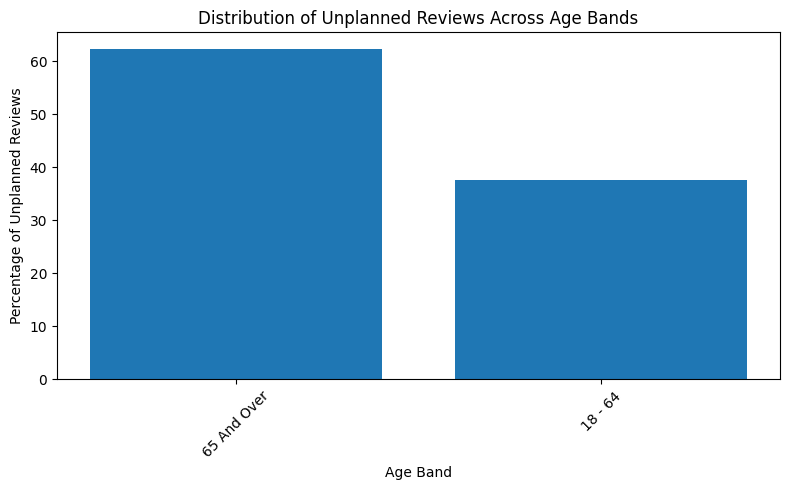

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_file_path.xlsx' with the actual file path in your Google Colab environment
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate the total count of unplanned reviews per age band
age_band_counts = df_unplanned['Age Band'].value_counts()

# Calculate percentages
age_band_percentages = (age_band_counts / age_band_counts.sum()) * 100

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.bar(age_band_percentages.index, age_band_percentages.values)

# Add labels and title
plt.xlabel('Age Band')
plt.ylabel('Percentage of Unplanned Reviews')
plt.title('Distribution of Unplanned Reviews Across Age Bands')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate the total count of unplanned reviews per age band
age_band_counts = df_unplanned['Age Band'].value_counts()

# Calculate percentages
age_band_percentages = (age_band_counts / age_band_counts.sum()) * 100

# Create a table for the data
age_band_table = pd.DataFrame({
    'Age Band': age_band_counts.index,
    'Count': age_band_counts.v


SyntaxError: incomplete input (<ipython-input-5-923e7f59f8b1>, line 20)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate the total count of unplanned reviews per age band
age_band_counts = df_unplanned['Age Band'].value_counts()

# Calculate percentages
age_band_percentages = (age_band_counts / age_band_counts.sum()) * 100

# Create a table for the data
age_band_table = pd.DataFrame({
    'Age Band': age_band_counts.index,
    'Count': age_band_counts.values,
    'Percentage': age_band_percentages.values
})

# Display the table
import ace_tools as tools; tools.display_dataframe_to_user(name="Age Band Unplanned Review Distribution", dataframe=age_band_table)

# Plot the histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(age_band_percentages.index, age_band_percentages.values)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Age Band')
plt.ylabel('Percentage of Unplanned Reviews')
plt.title('Distribution of Unplanned Reviews Across Age Bands')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'ace_tools'

      Age Band  Count  Percentage
0  65 And Over   1970   62.361507
1      18 - 64   1189   37.638493


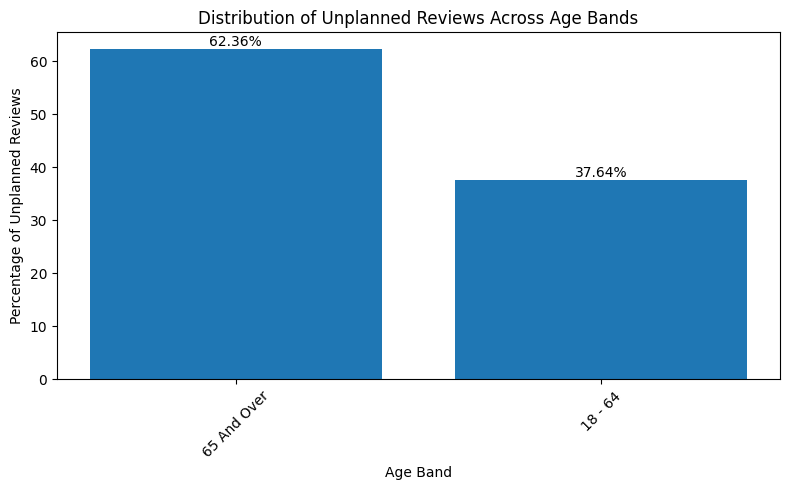

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate the total count of unplanned reviews per age band
age_band_counts = df_unplanned['Age Band'].value_counts()

# Calculate percentages
age_band_percentages = (age_band_counts / age_band_counts.sum()) * 100

# Create a table for the data
age_band_table = pd.DataFrame({
    'Age Band': age_band_counts.index,
    'Count': age_band_counts.values,
    'Percentage': age_band_percentages.values
})

# Display the table in Colab
print(age_band_table)

# Plot the histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(age_band_percentages.index, age_band_percentages.values)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Age Band')
plt.ylabel('Percentage of Unplanned Reviews')
plt.title('Distribution of Unplanned Reviews Across Age Bands')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()


Unplanned Reviews by Age Band:
      Age Band  Count  Percentage
0  65 And Over   1970   62.361507
1      18 - 64   1189   37.638493


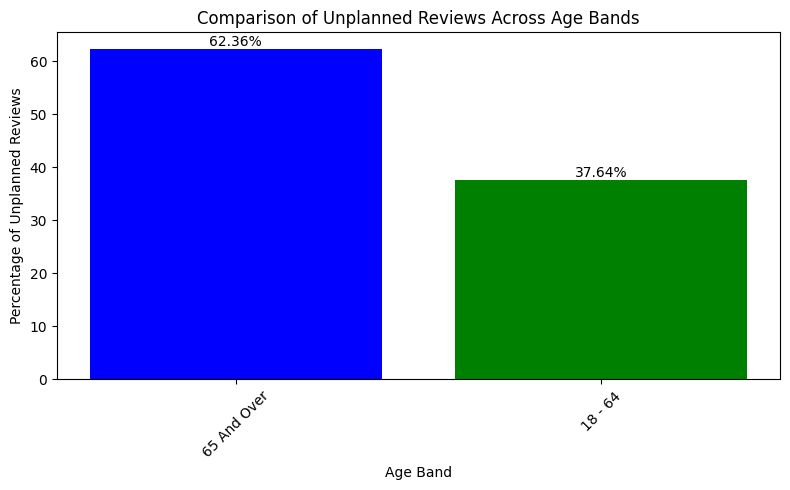

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate the total count of unplanned reviews per age band
age_band_counts = df_unplanned['Age Band'].value_counts()

# Calculate percentages
age_band_percentages = (age_band_counts / age_band_counts.sum()) * 100

# Display the table to show differences
age_band_table = pd.DataFrame({
    'Age Band': age_band_counts.index,
    'Count': age_band_counts.values,
    'Percentage': age_band_percentages.values
})

# Show the table
print("Unplanned Reviews by Age Band:")
print(age_band_table)

# Plot a comparison bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(age_band_percentages.index, age_band_percentages.values, color=['blue', 'green'])

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Age Band')
plt.ylabel('Percentage of Unplanned Reviews')
plt.title('Comparison of Unplanned Reviews Across Age Bands')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()


Age Band Distribution of Unplanned Reviews:
Age Band
65 And Over    62.361507
18 - 64        37.638493
Name: count, dtype: float64

Reasons for Unplanned Reviews:
Reason for Unplanned
Change In Needs          44.001266
Provider Issue           27.160494
Carer Related Change     21.842355
Hospital Admission        4.368471
Safeguarding Concerns     2.500791
Unknown                   0.126622
Name: count, dtype: float64

Reason Distribution by Age Group (Percentage):
Reason for Unplanned  Carer Related Change  Change In Needs  \
Age Band                                                      
18 - 64                           24.89487        37.510513   
65 And Over                       20.00000        47.918782   

Reason for Unplanned  Hospital Admission  Provider Issue  \
Age Band                                                   
18 - 64                         2.607233       32.548360   
65 And Over                     5.431472       23.908629   

Reason for Unplanned  Safeguarding C

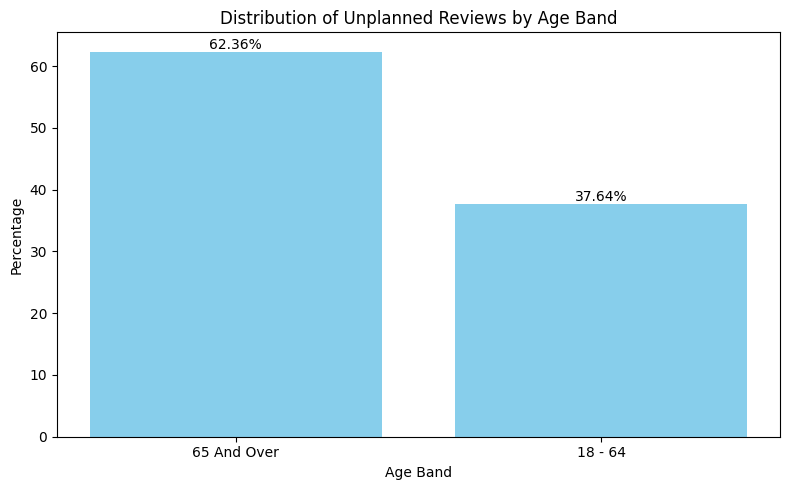

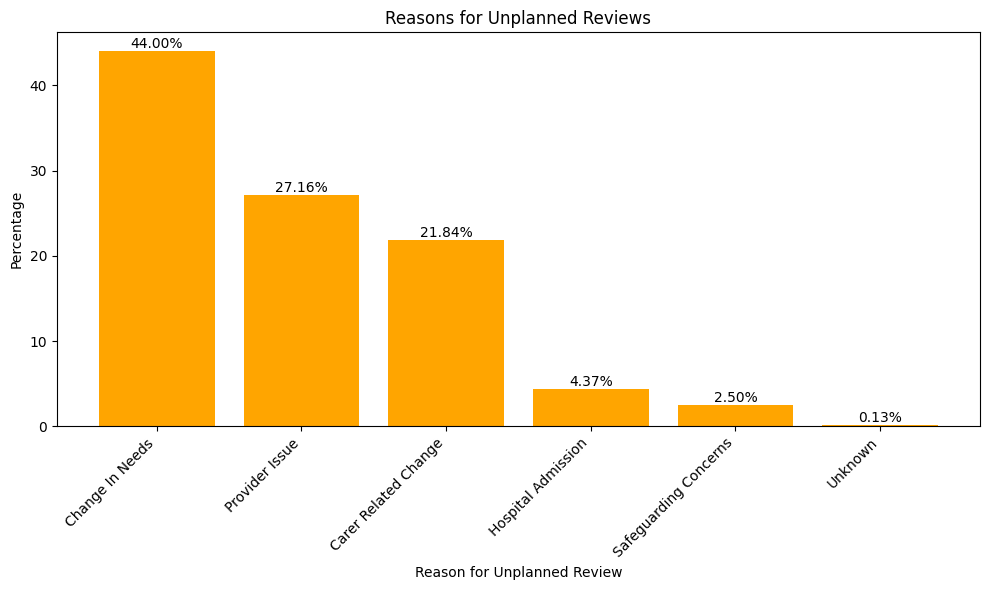

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Filter for unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# 1. Distribution by Age
age_band_counts = df_unplanned['Age Band'].value_counts()
age_band_percentages = (age_band_counts / age_band_counts.sum()) * 100

# 2. Reasons for Unplanned Reviews
reason_counts = df_unplanned['Reason for Unplanned'].value_counts()
reason_percentages = (reason_counts / reason_counts.sum()) * 100

# 3. Cross-analysis of Reasons by Age Groups
reason_by_age = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)
reason_by_age_percentage = reason_by_age.div(reason_by_age.sum(axis=1), axis=0) * 100

# Display the results
print("Age Band Distribution of Unplanned Reviews:")
print(age_band_percentages)

print("\nReasons for Unplanned Reviews:")
print(reason_percentages)

print("\nReason Distribution by Age Group (Percentage):")
print(reason_by_age_percentage)

# Visualization

# Distribution of unplanned reviews by age group
plt.figure(figsize=(8, 5))
bars = plt.bar(age_band_percentages.index, age_band_percentages.values, color='skyblue')
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.title('Distribution of Unplanned Reviews by Age Band')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Reasons for unplanned reviews
plt.figure(figsize=(10, 6))
bars = plt.bar(reason_percentages.index, reason_percentages.values, color='orange')
plt.xlabel('Reason for Unplanned Review')
plt.ylabel('Percentage')
plt.title('Reasons for Unplanned Reviews')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


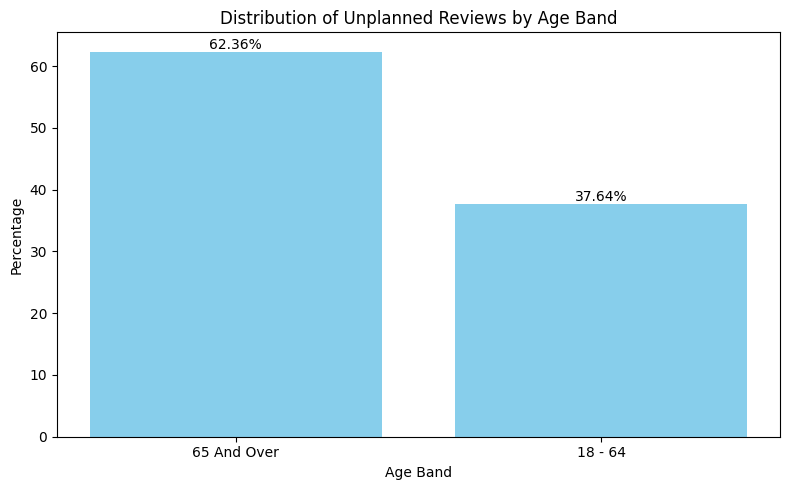

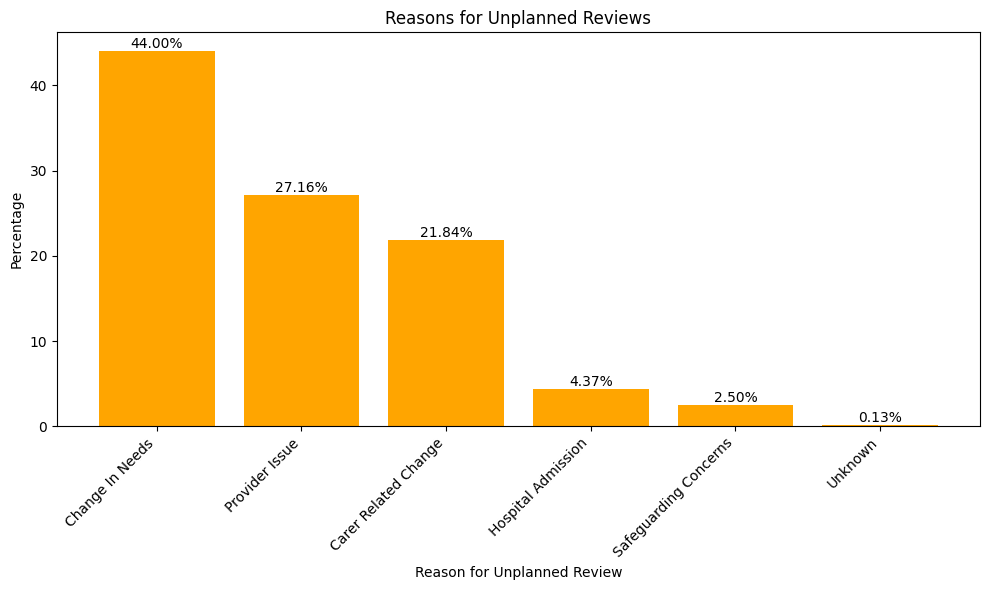

In [ ]:
# Calculate percentages of unplanned reviews by age group
age_band_counts = df_unplanned['Age Band'].value_counts()
age_band_percentages = (age_band_counts / age_band_counts.sum()) * 100

# Calculate percentages of reasons for unplanned reviews
reason_counts = df_unplanned['Reason for Unplanned'].value_counts()
reason_percentages = (reason_counts / reason_counts.sum()) * 100

# Plot histogram for age group percentages
plt.figure(figsize=(8, 5))
bars_age = plt.bar(age_band_percentages.index, age_band_percentages.values, color='skyblue')
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.title('Distribution of Unplanned Reviews by Age Band')
for bar in bars_age:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Plot histogram for reason percentages
plt.figure(figsize=(10, 6))
bars_reason = plt.bar(reason_percentages.index, reason_percentages.values, color='orange')
plt.xlabel('Reason for Unplanned Review')
plt.ylabel('Percentage')
plt.title('Reasons for Unplanned Reviews')
plt.xticks(rotation=45, ha='right')
for bar in bars_reason:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


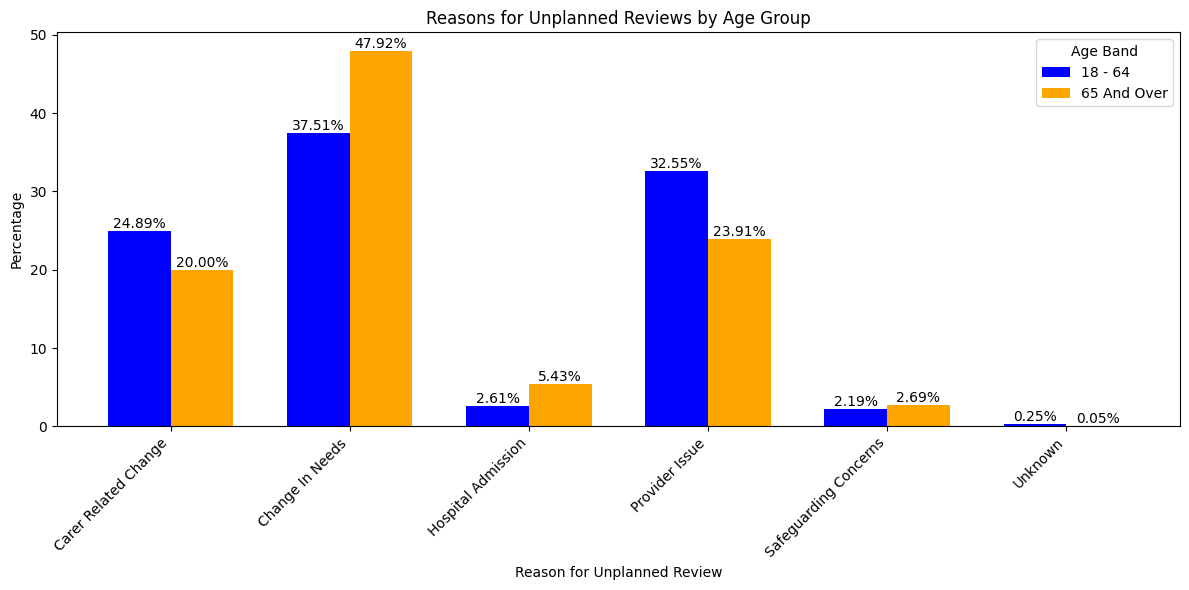

In [ ]:
# Calculate percentages for each reason by age group
reason_by_age = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)
reason_by_age_percentage = reason_by_age.div(reason_by_age.sum(axis=1), axis=0) * 100

# Set up the plot
import numpy as np
x = np.arange(len(reason_by_age_percentage.columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each age band
bars1 = ax.bar(x - width/2, reason_by_age_percentage.loc['18 - 64'], width, label='18 - 64', color='blue')
bars2 = ax.bar(x + width/2, reason_by_age_percentage.loc['65 And Over'], width, label='65 And Over', color='orange')

# Add labels and title
ax.set_xlabel('Reason for Unplanned Review')
ax.set_ylabel('Percentage')
ax.set_title('Reasons for Unplanned Reviews by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(reason_by_age_percentage.columns, rotation=45, ha='right')
ax.legend(title="Age Band")

# Add data labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid displaying labels for zero heights
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


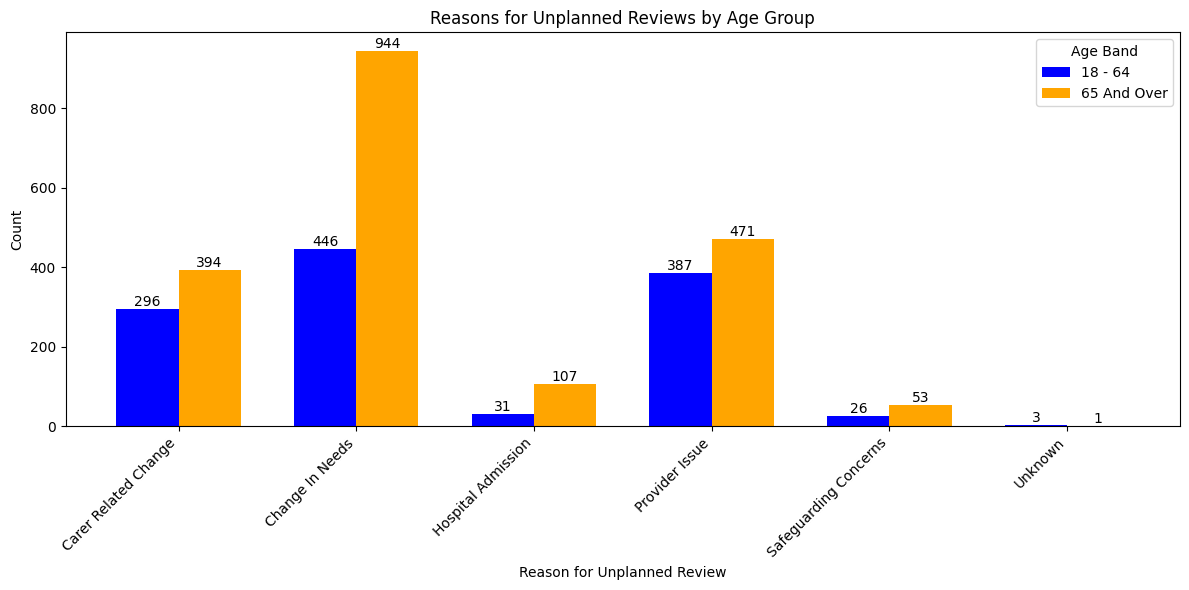

In [ ]:
# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)

# Set up the plot
import numpy as np
x = np.arange(len(reason_by_age_counts.columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each age band
bars1 = ax.bar(x - width/2, reason_by_age_counts.loc['18 - 64'], width, label='18 - 64', color='blue')
bars2 = ax.bar(x + width/2, reason_by_age_counts.loc['65 And Over'], width, label='65 And Over', color='orange')

# Add labels and title
ax.set_xlabel('Reason for Unplanned Review')
ax.set_ylabel('Count')
ax.set_title('Reasons for Unplanned Reviews by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(reason_by_age_counts.columns, rotation=45, ha='right')
ax.legend(title="Age Band")

# Add data labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid displaying labels for zero heights
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)

# Convert the counts into a DataFrame for display
reason_by_age_table = reason_by_age_counts.reset_index()

# Display the table
import ace_tools as tools; tools.display_dataframe_to_user(name="Reasons for Unplanned Reviews by Age Group (Counts)", dataframe=reason_by_age_table)

# Set up the plot
x = np.arange(len(reason_by_age_counts.columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each age band
bars1 = ax.bar(x - width/2, reason_by_age_counts.loc['18 - 64'], width, label='18 - 64', color='blue')
bars2 = ax.bar(x + width/2, reason_by_age_counts.loc['65 And Over'], width, label='65 And Over', color='orange')

# Add labels and title
ax.set_xlabel('Reason for Unplanned Review')
ax.set_ylabel('Count')
ax.set_title('Reasons for Unplanned Reviews by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(reason_by_age_counts.columns, rotation=45, ha='right')
ax.legend(title="Age Band")

# Add data labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid displaying labels for zero heights
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'ace_tools'

Reasons for Unplanned Reviews by Age Group (Counts):
Reason for Unplanned     Age Band  Carer Related Change  Change In Needs  \
0                         18 - 64                   296              446   
1                     65 And Over                   394              944   

Reason for Unplanned  Hospital Admission  Provider Issue  \
0                                     31             387   
1                                    107             471   

Reason for Unplanned  Safeguarding Concerns  Unknown  
0                                        26        3  
1                                        53        1  


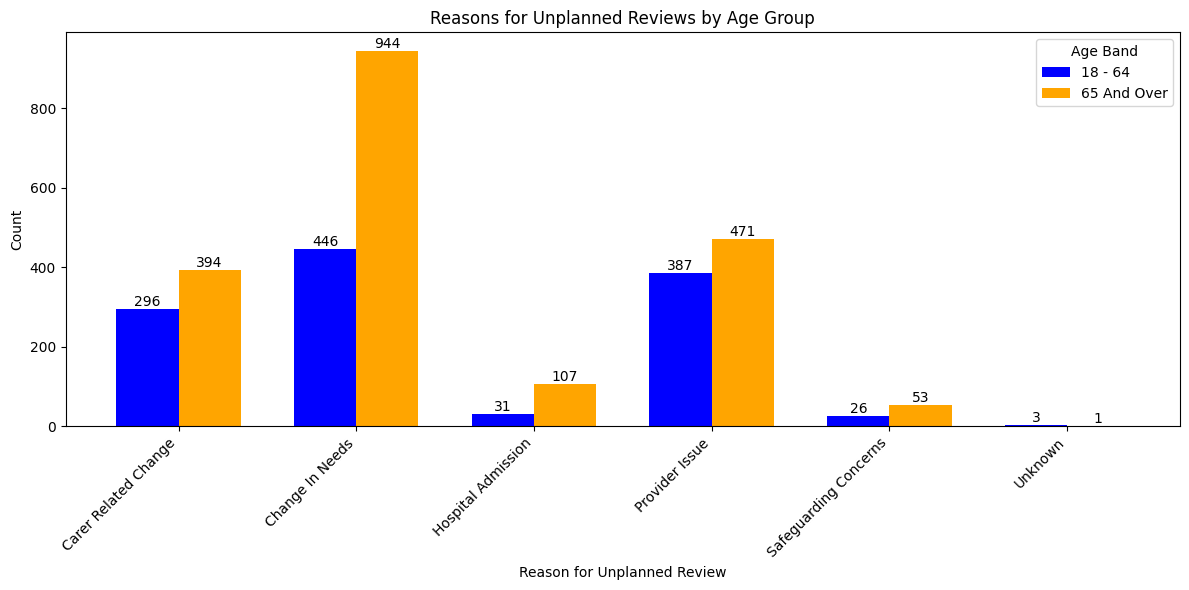

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)

# Convert the counts into a DataFrame for display
reason_by_age_table = reason_by_age_counts.reset_index()

# Display the table in Colab
print("Reasons for Unplanned Reviews by Age Group (Counts):")
print(reason_by_age_table)

# Set up the plot
x = np.arange(len(reason_by_age_counts.columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each age band
bars1 = ax.bar(x - width/2, reason_by_age_counts.loc['18 - 64'], width, label='18 - 64', color='blue')
bars2 = ax.bar(x + width/2, reason_by_age_counts.loc['65 And Over'], width, label='65 And Over', color='orange')

# Add labels and title
ax.set_xlabel('Reason for Unplanned Review')
ax.set_ylabel('Count')
ax.set_title('Reasons for Unplanned Reviews by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(reason_by_age_counts.columns, rotation=45, ha='right')
ax.legend(title="Age Band")

# Add data labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid displaying labels for zero heights
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupb


AttributeError: 'DataFrame' object has no attribute 'groupb'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)

# Convert the counts into a DataFrame for display
reason_by_age_table = reason_by_age_counts.reset_index()

# Create and display the interactive HTML table
html_table = reason_by_age_table.to_html(index=False, border=1)
display_table = HTML(f"""
    <style>
        table {{
            margin: 25px auto;
            border-collapse: collapse;
            width: 90%;
            font-size: 14px;
            text-align: center;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
        }}
        th {{
            background-color: #f4f4f4;
            font-weight: bold;
        }}
        caption {{
            margin-top: 10px;
            margin-bottom: 10px;
            font-size: 16px;
            font-weight: bold;
        }}


SyntaxError: incomplete input (<ipython-input-16-b04f22f0c937>, line 21)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML, display

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)

# Convert the counts into a DataFrame for display
reason_by_age_table = reason_by_age_counts.reset_index()

# Create and display the interactive HTML table
html_table = reason_by_age_table.to_html(index=False, border=1)
display_table = HTML(f"""
    <style>
        table {{
            margin: 25


SyntaxError: incomplete input (<ipython-input-17-20dc7f7161be>, line 21)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML, display

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)

# Convert the counts into a DataFrame for display
reason_by_age_table = reason_by_age_counts.reset_index()

# Create an interactive HTML table
html_table = reason_by_age_table.to_html(index=False, border=1)
styled_html = f"""
<style>
    table {{
        margin: 25px auto;
        border-collapse: collapse;
        width: 90%;
        font-size: 14px;
        text-align: center;
    }}
    th, td {{
        border: 1px solid #ddd;
        padding: 8px;
    }}
    th {{
        background-color: #f4f4f4;
        font-weight: bold;
    }}
    caption {{
        margin-top: 10px;
        margin-bottom: 10px;
        font-size: 16px;
        font-weight: bold;
    }}
</style>
{html_tabl


SyntaxError: incomplete input (<ipython-input-18-f3ba821cfcb5>, line 21)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML, display

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)

# Convert the counts into a DataFrame for display
reason_by_age_table = reason_by_age_counts.reset_index()

# Display the interactive HTML table
display(HTML(reason_by_age_table.to_html(index=False, border=1)))

# Set up the histogram plot
x = np.arange(len(reason_by_age_counts.columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each age band
bars1 = ax.bar(x - width/2, reason_by_age_counts.loc['18 - 64'], width, label='18 - 64', color='blue')
bars2 = ax.bar(x + width/2, reason_by_age_counts.loc['65 And Over'], width, label='65 And Over', color='orange')

# Add labels and title
ax.set_xlabel('Reason for Unplanned Review')
ax.set_ylabel('Count')
ax.set_title('Reasons for Unplanned Reviews by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(reason_by_age_counts.columns,


SyntaxError: incomplete input (<ipython-input-19-93457f179593>, line 37)

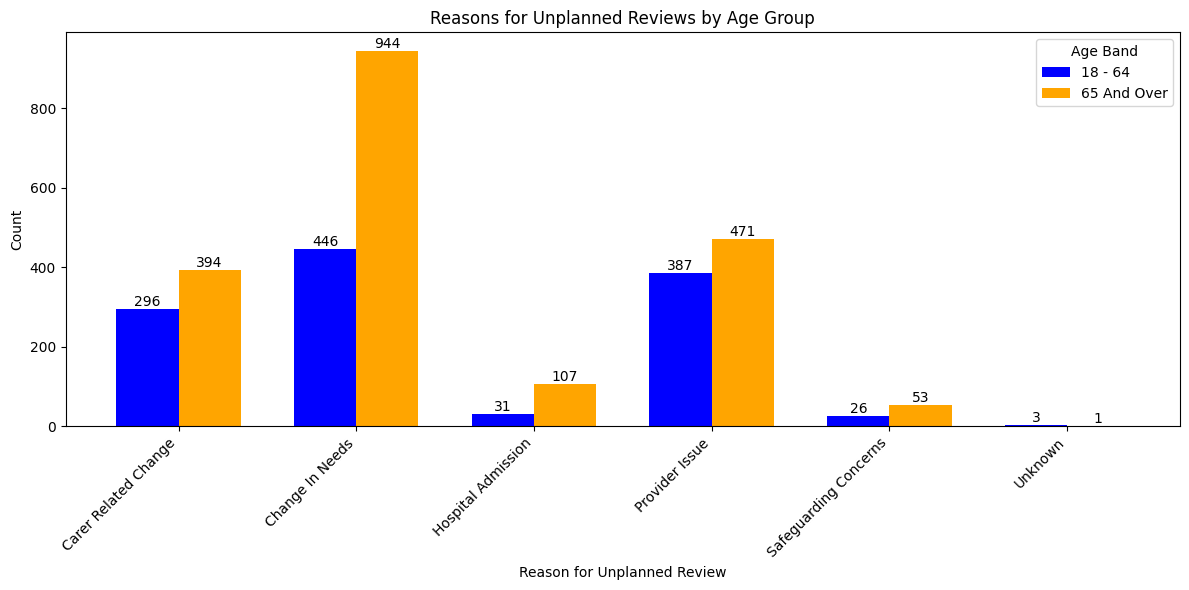

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML, display

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)

# Convert the counts into a DataFrame for display
reason_by_age_table = reason_by_age_counts.reset_index()

# Display the table as an interactive HTML table
display(HTML(reason_by_age_table.to_html(index=False, border=1)))

# Set up the histogram plot
x = np.arange(len(reason_by_age_counts.columns))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each age band
bars1 = ax.bar(x - width/2, reason_by_age_counts.loc['18 - 64'], width, label='18 - 64', color='blue')
bars2 = ax.bar(x + width/2, reason_by_age_counts.loc['65 And Over'], width, label='65 And Over', color='orange')

# Add labels and title
ax.set_xlabel('Reason for Unplanned Review')
ax.set_ylabel('Count')
ax.set_title('Reasons for Unplanned Reviews by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(reason_by_age_counts.columns, rotation=45, ha='right')
ax.legend(title="Age Band")

# Add data labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid displaying labels for zero heights
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Display the table nicely using Pandas styling
from IPython.display import display

# Style the DataFrame
styled_table = reason_by_age_table.style.set_caption("Reasons for Unplanned Reviews by Age Group (Counts)") \
                                         .set_table_styles([
                                             {"selector": "caption",
                                              "props": [("text-align", "center"),
                                                        ("font-size", "16px"),
                                                        ("color", "black"),
                                                        ("font-weight", "bold")]}
                                         ]) \
                                         .set_properties(**{'text-align': 'center'}) \
                                         .hide_index()

# Display the styled table
display(styled_table)


AttributeError: 'Styler' object has no attribute 'hide_index'

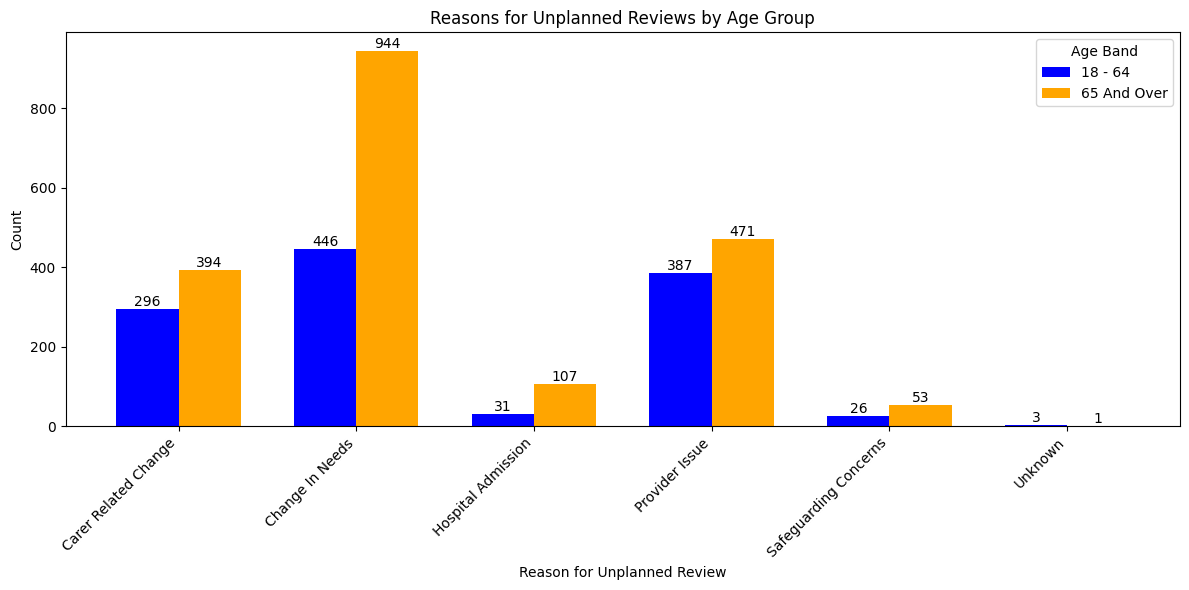

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML, display

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate counts for each reason by age group
reason_by_age_counts = df_unplanned.groupby(['Age Band', 'Reason for Unplanned']).size().unstack(fill_value=0)

# Convert the counts into a DataFrame for display
reason_by_age_table = reason_by_age_counts.reset_index()

# Display the table in a simple interactive HTML format
display(HTML(reason_by_age_table.to_html(index=False, border=1)))

# Set up the histogram plot
x = np.arange(len(reason_by_age_counts.columns))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each age band
bars1 = ax.bar(x - width/2, reason_by_age_counts.loc['18 - 64'], width, label='18 - 64', color='blue')
bars2 = ax.bar(x + width/2, reason_by_age_counts.loc['65 And Over'], width, label='65 And Over', color='orange')

# Add labels and title
ax.set_xlabel('Reason for Unplanned Review')
ax.set_ylabel('Count')
ax.set_title('Reasons for Unplanned Reviews by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(reason_by_age_counts.columns, rotation=45, ha='right')
ax.legend(title="Age Band")

# Add data labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid displaying labels for zero heights
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Save the table to an Excel file
reason_by_age_table.to_excel('Reason_By_Age_Table.xlsx', index=False)


In [ ]:
from google.colab import files
files.download('Reason_By_Age_Table.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

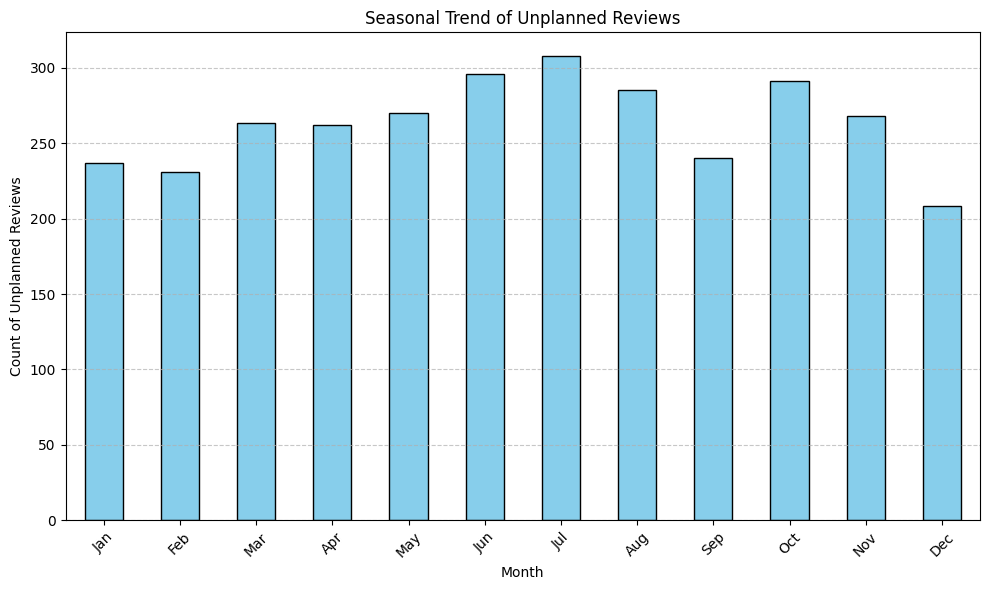

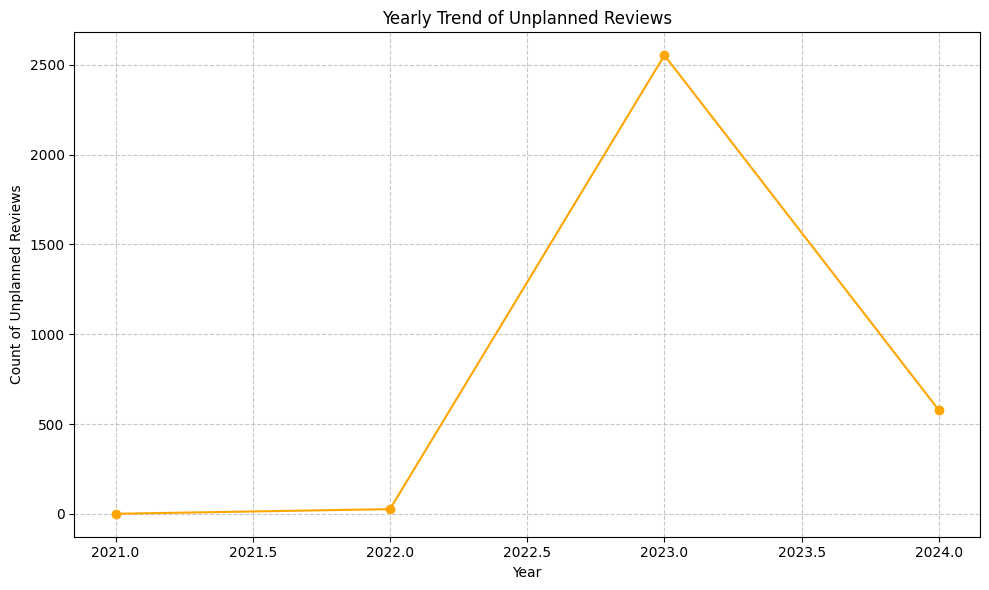

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Convert date column to datetime format (update 'Step Start Date' to match your date column name)
df_unplanned['Step Start Date'] = pd.to_datetime(df_unplanned['Step Start Date'])

# Extract month and year for analysis
df_unplanned['Month'] = df_unplanned['Step Start Date'].dt.month
df_unplanned['Year'] = df_unplanned['Step Start Date'].dt.year

# Group by month to find seasonal trends
seasonal_trend = df_unplanned.groupby('Month').size()

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
seasonal_trend.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Count of Unplanned Reviews')
plt.title('Seasonal Trend of Unplanned Reviews')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group by year to find yearly trends
yearly_trend = df_unplanned.groupby('Year').size()

# Plot the yearly trend
plt.figure(figsize=(10, 6))
yearly_trend.plot(kind='line', marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Count of Unplanned Reviews')
plt.title('Yearly Trend of Unplanned Reviews')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


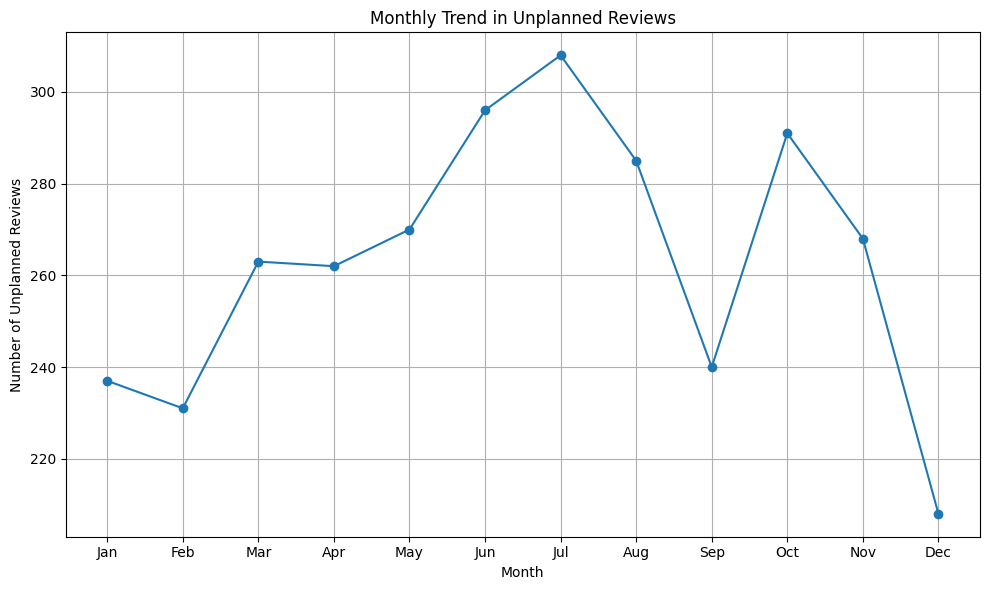

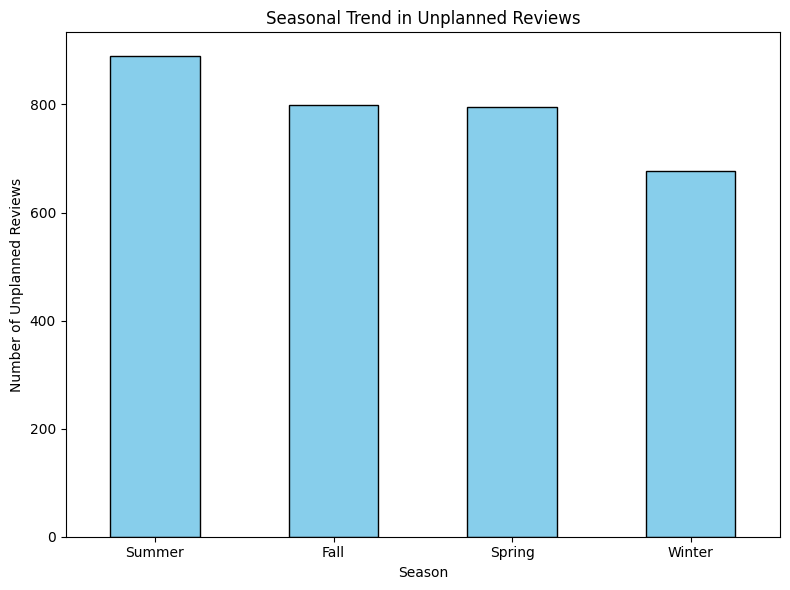

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Replace with the correct file path
df = pd.read_excel(file_path)

# Filter only unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Convert 'Step Start Date' to a datetime object (replace with your actual date column name)
df_unplanned['Step Start Date'] = pd.to_datetime(df_unplanned['Step Start Date'])

# Extract the month and season
df_unplanned['Month'] = df_unplanned['Step Start Date'].dt.month
df_unplanned['Season'] = df_unplanned['Step Start Date'].dt.month % 12 // 3 + 1  # Seasons: 1=Winter, 2=Spring, 3=Summer, 4=Fall

# Map season numbers to season names
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df_unplanned['Season'] = df_unplanned['Season'].map(season_mapping)

# Group by month and season to analyze trends
monthly_trend = df_unplanned['Month'].value_counts().sort_index()
seasonal_trend = df_unplanned['Season'].value_counts()

# Plot the monthly trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o')
plt.title('Monthly Trend in Unplanned Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Unplanned Reviews')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.tight_layout()
plt.show()

# Plot the seasonal trend
plt.figure(figsize=(8, 6))
seasonal_trend.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Seasonal Trend in Unplanned Reviews')
plt.xlabel('Season')
plt.ylabel('Number of Unplanned Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Convert date columns to datetime format
df['Step Start Date'] = pd.to_datetime(df['Step Start Date'])
df['Step End Date'] = pd.to_datetime(df['Step End Date'])

# Calculate the duration between start and end dates in days
df['Duration (Days)'] = (df['Step End Date'] - df['Step Start Date']).dt.days

# Calculate the average duration
average_duration = df['Duration (Days)'].mean()

print(f"The average duration between the step start and end dates is {average_duration:.2f} days.")


The average duration between the step start and end dates is 19.68 days.


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Convert date columns to datetime format
df['Step Start Date'] = pd.to_datetime(df['Step Start Date'])
df['Step End Date'] = pd.to_datetime(df['Step End Date'])

# Calculate the duration between start and end dates in days
df['Duration (Days)'] = (df['Step End Date'] - df['Step Start Date']).dt.days

# Calculate the average duration for each reason
average_duration_by_reason = df.groupby('Reason for Unplanned')['Duration (Days)'].mean().reset_index()

# Sort by average duration
average_duration_by_reason = average_duration_by_reason.sort_values(by='Duration (Days)', ascending=False)

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user(name="Average Duration by Review Reason", dataframe=average_duration_by_reason)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(average_duration_by_reason['Reason for Unplanned'], average_duration_by_reason['Duration (Days)'], color='skyblue')
plt.xlabel('Average Duration (Days)')
plt.ylabel('Reason for Unplanned')
plt.title('Average Duration by Review Reason')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Convert date columns to datetime format
df['Step Start Date'] = pd.to_datetime(df['Step Start Date'])
df['Step End Date'] = pd.to_datetime(df['Step End Date'])

# Calculate the duration between start and end dates in days
df['Duration (Days)'] = (df['Step End Date'] - df['Step Start Date']).dt.days

# Calculate the average duration for each reason
average_duration_by_reason = df.groupby('Reason for Unplanned')['Duration (Days)'].mean().reset_index()

# Sort by average duration
average_duration_by_reason


Reason for Unplanned  Duration (Days)
0   Carer Related Change        19.233333
1        Change In Needs        18.605036
2     Hospital Admission         9.492754
3         Provider Issue        19.853147
4  Safeguarding Concerns        39.759494
5                Unknown       385.750000

Average Duration by Month:
   Month  Duration (Days)
3    Apr        22.156489
7    Aug        17.922807
11   Dec        19.201923
1    Feb        20.640693
0    Jan        19.168776
6    Jul        15.814935
5    Jun        17.496622
2    Mar        23.661597
4    May        18.455556
10   Nov        20.585821
9    Oct        20.769759
8    Sep        21.354167


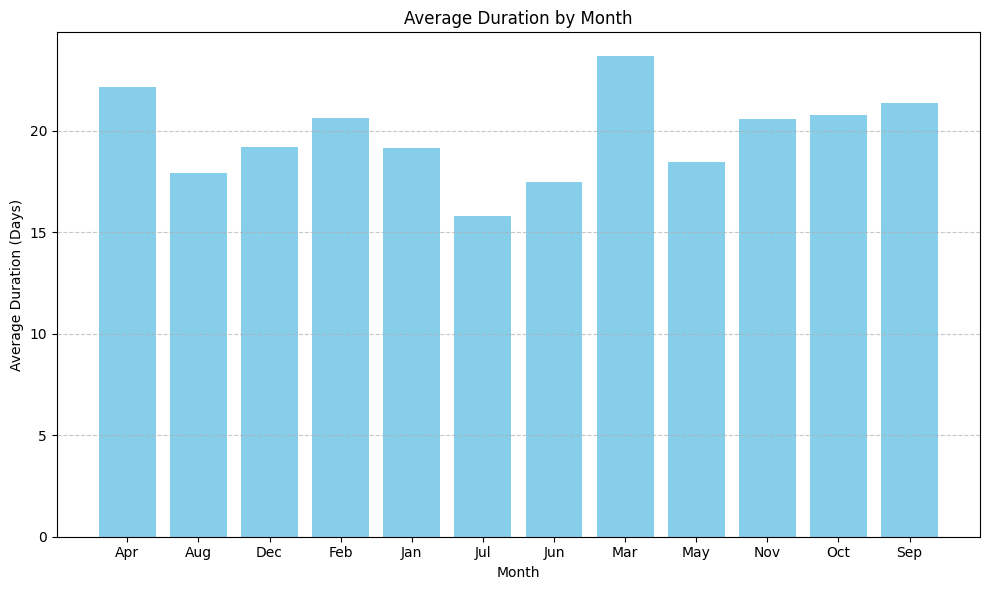

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Convert date columns to datetime format
df['Step Start Date'] = pd.to_datetime(df['Step Start Date'])
df['Step End Date'] = pd.to_datetime(df['Step End Date'])

# Calculate the duration between start and end dates in days
df['Duration (Days)'] = (df['Step End Date'] - df['Step Start Date']).dt.days

# Extract the month from the Step Start Date
df['Month'] = df['Step Start Date'].dt.month

# Calculate the average duration for each month
average_duration_by_month = df.groupby('Month')['Duration (Days)'].mean().reset_index()

# Map month numbers to names
average_duration_by_month['Month'] = average_duration_by_month['Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Sort months in calendar order
average_duration_by_month = average_duration_by_month.sort_values('Month')

# Display the results as a DataFrame
print("Average Duration by Month:")
print(average_duration_by_month)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(average_duration_by_month['Month'], average_duration_by_month['Duration (Days)'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Duration (Days)')
plt.title('Average Duration by Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Convert date columns to datetime format
df['Step Start Date'] = pd.to_datetime(df['Step Start Date'])
df['Step End Date'] = pd.to_datetime(df['Step End Date'])

# Calculate the duration between start and end dates in days
df['Duration (Days)'] = (df['Step End Date'] - df['Step Start Date']).dt.days

# Extract the month from the Step Start Date
df['Month'] = df['Step Start Date'].dt.month

# Map month numbers to names
df['Month Name'] = df['Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# --- Step 1: Test for Normality ---
print("Shapiro-Wilk Test for Normality (by Month):")
normality_results = df.groupby('Month')['Duration (Days)'].apply(lambda x: stats.shapiro(x) if len(x) > 3 else "Not enough data")
print(normality_results)

# --- Step 2: Test for Homogeneity of Variances ---
levene_test = stats.levene(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print(f"Levene’s Test for Homogeneity of Variance: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")

# --- Step 3: Perform One-Way ANOVA ---
anova_test = stats.f_oneway(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print(f"ANOVA Test: Statistic={anova_test.statistic}, p-value={anova_test.pvalue}")

# --- Step 4: Post-Hoc Analysis (if ANOVA is significant) ---
if anova_test.pvalue < 0.05:
    tukey = pairwise_tukeyhsd(endog=df['Duration (Days)'], groups=df['Month Name'], alpha=0.05)
    print("\nTukey's HSD Post-Hoc Results:")
    print(tukey)

    # Plot Tukey's HSD results
    tukey.plot_simultaneous()
    plt.title("Tukey HSD - Pairwise Comparison of Monthly Durations")
    plt.show()

# --- Step 5: If Data is Non-Normal (Use Kruskal-Wallis Test) ---
kruskal_test = stats.kruskal(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print(f"Kruskal-Wallis Test: Statistic={kruskal_test.statistic}, p-value={kruskal_test.pvalue}")



FileNotFoundError: [Errno 2] No such file or directory: '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Convert date columns to datetime format
df['Step Start Date'] = pd.to_datetime(df['Step Start Date'])
df['Step End Date'] = pd.to_datetime(df['Step End Date'])

# Calculate the duration between start and end dates in days
df['Duration (Days)'] = (df['Step End Date'] - df['Step Start Date']).dt.days

# Extract the month from the Step Start Date
df['Month'] = df['Step Start Date'].dt.month

# Map month numbers to names
df['Month Name'] = df['Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# --- Step 1: Test for Normality ---
print("Shapiro-Wilk Test for Normality (by Month):")
normality_results = df.groupby('Month')['Duration (Days)'].apply(lambda x: stats.shapiro(x) if len(x) > 3 else "Not enough data")
print(normality_results)

# --- Step 2: Test for Homogeneity of Variances ---
levene_test = stats.levene(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print(f"Levene’s Test for Homogeneity of Variance: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")

# --- Step 3: Perform One-Way ANOVA ---
anova_test = stats.f_oneway(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print(f"ANOVA Test: Statistic={anova_test.statistic}, p-value={anova_test.pvalue}")

# --- Step 4: Post-Hoc Analysis (if ANOVA is significant) ---
if anova_test.pvalue < 0.05:
    tukey = pairwise_tukeyhsd(endog=df['Duration (Days)'], groups=df['Month Name'], alpha=0.05)
    print("\nTukey's HSD Post-Hoc Results:")
    print(tukey)

    # Plot Tukey's HSD results
    tukey.plot_simultaneous()
    plt.title("Tukey HSD - Pairwise Comparison of Monthly Durations")
    plt.show()

# --- Step 5: If Data is Non-Normal (Use Kruskal-Wallis Test) ---
kruskal_test = stats.kruskal(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print(f"Kruskal-Wallis Test: Statistic={kruskal_test.statistic}, p-value={kruskal_test.pvalue}")



FileNotFoundError: [Errno 2] No such file or directory: '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'

In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx to Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Convert date columns to datetime format
df['Step Start Date'] = pd.to_datetime(df['Step Start Date'])
df['Step End Date'] = pd.to_datetime(df['Step End Date'])

# Calculate the duration between start and end dates in days
df['Duration (Days)'] = (df['Step End Date'] - df['Step Start Date']).dt.days

# Extract the month from the Step Start Date
df['Month'] = df['Step Start Date'].dt.month

# Map month numbers to names
df['Month Name'] = df['Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# --- Step 1: Test for Normality ---
print("Shapiro-Wilk Test for Normality (by Month):")
normality_results = df.groupby('Month')['Duration (Days)'].apply(lambda x: stats.shapiro(x) if len(x) > 3 else "Not enough data")
print(normality_results)

# --- Step 2: Test for Homogeneity of Variances ---
levene_test = stats.levene(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print(f"Levene’s Test for Homogeneity of Variance: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")

# --- Step 3: Perform One-Way ANOVA ---
anova_test = stats.f_oneway(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print(f"ANOVA Test: Statistic={anova_test.statistic}, p-value={anova_test.pvalue}")

# --- Step 4: Post-Hoc Analysis (if ANOVA is significant) ---
if anova_test.pvalue < 0.05:
    tukey = pairwise_tukeyhsd(endog=df['Duration (Days)'], groups=df['Month Name'], alpha=0.05)
    print("\nTukey's HSD Post-Hoc Results:")
    print(tukey)

    # Plot Tukey's HSD results
    tukey.plot_simultaneous()
    plt.title("Tukey HSD - Pairwise Comparison of Monthly Durations")
    plt.show()

# --- Step 5: If Data is Non-Normal (Use Kruskal-Wallis Test) ---
kruskal_test = stats.kruskal(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print(f"Kruskal-Wallis Test: Statistic={kruskal_test.statistic}, p-value={kruskal_test.pvalue}")



Shapiro-Wilk Test for Normality (by Month):
Month
1      (0.4822276592541116, 8.912187747359433e-26)
2      (0.5140203463273292, 8.138076258647982e-25)
3       (0.5731261955034156, 6.02210491797274e-25)
4     (0.5845905502851811, 1.2810225163655192e-24)
5      (0.5398468763018394, 4.756313631333418e-26)
6     (0.5021528591330204, 4.9863713768575715e-28)
7      (0.3089759772939038, 2.264860285564513e-32)
8      (0.5913495212935009, 2.040272758741584e-25)
9     (0.4034817108509733, 1.8722687435007582e-27)
10     (0.5032824695625906, 8.600760516755399e-28)
11      (0.4982436519250196, 6.74676431778413e-27)
12      (0.564248982964815, 1.467542220136463e-22)
Name: Duration (Days), dtype: object
Levene’s Test for Homogeneity of Variance: Statistic=0.629567952130958, p-value=0.8049218953731201
ANOVA Test: Statistic=0.7287362921525529, p-value=0.7117489175943481
Kruskal-Wallis Test: Statistic=22.80669837471763, p-value=0.018817789176297933


In [ ]:
!pip install scikit-posthocs


In [ ]:
import scikit_posthocs as sp
import pandas as pd

# Perform Dunn's test for pairwise comparisons
dunn_test = sp.posthoc_dunn(df, val_col='Duration (Days)', group_col='Month', p_adjust='bonferroni')

# Display the Dunn's test results
print("Dunn's Test Results for Monthly Durations:")
print(dunn_test)

# Optionally save the results to a file
dunn_test.to_csv("Dunn_Test_Results.csv", index=True)

print("\nThe Dunn's test results have also been saved to 'Dunn_Test_Results.csv'.")


Dunn's Test Results for Monthly Durations:
          1         2         3    4         5         6         7         8   \
1   1.000000  1.000000  0.087058  1.0  1.000000  1.000000  1.000000  1.000000   
2   1.000000  1.000000  0.807161  1.0  1.000000  1.000000  1.000000  1.000000   
3   0.087058  0.807161  1.000000  1.0  0.461962  0.997468  0.001104  0.115285   
4   1.000000  1.000000  1.000000  1.0  1.000000  1.000000  1.000000  1.000000   
5   1.000000  1.000000  0.461962  1.0  1.000000  1.000000  1.000000  1.000000   
6   1.000000  1.000000  0.997468  1.0  1.000000  1.000000  1.000000  1.000000   
7   1.000000  1.000000  0.001104  1.0  1.000000  1.000000  1.000000  1.000000   
8   1.000000  1.000000  0.115285  1.0  1.000000  1.000000  1.000000  1.000000   
9   1.000000  1.000000  0.258935  1.0  1.000000  1.000000  1.000000  1.000000   
10  1.000000  1.000000  1.000000  1.0  1.000000  1.000000  1.000000  1.000000   
11  1.000000  1.000000  0.140452  1.0  1.000000  1.000000  1.00000

In [ ]:
from google.colab import files
files.download("Dunn_Test_Results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-8-78725d05fde0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Duration (Days)', data=df, palette='Set3')


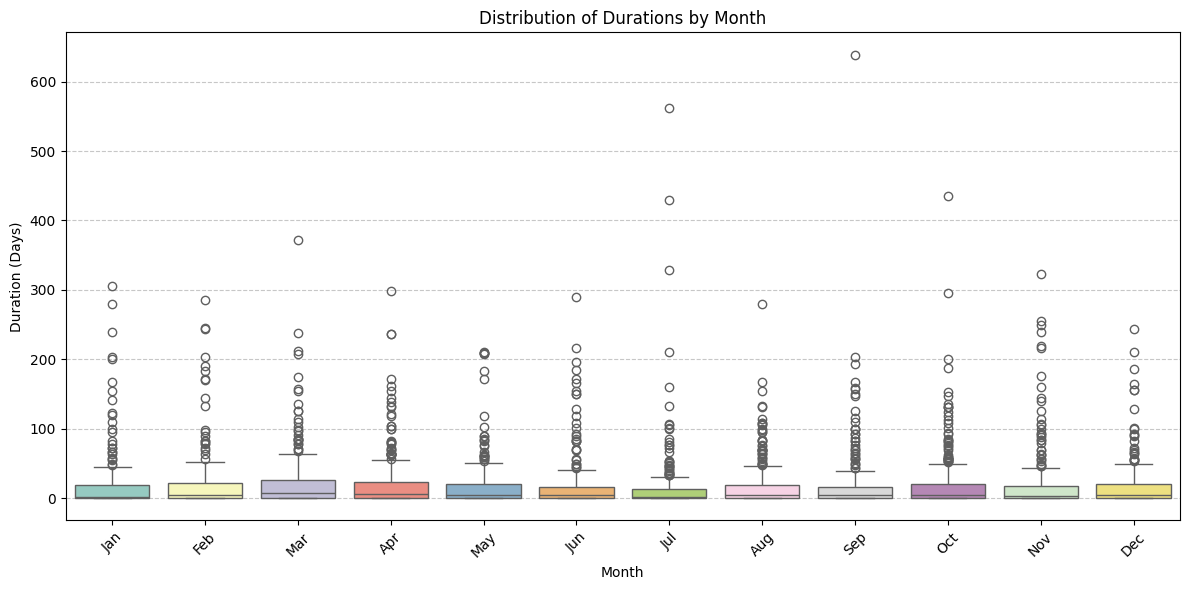

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Duration (Days)', data=df, palette='Set3')
plt.xlabel('Month')
plt.ylabel('Duration (Days)')
plt.title('Distribution of Durations by Month')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Convert Step Start Date to datetime
df['Step Start Date'] = pd.to_datetime(df['Step Start Date'])

# Extract month and season
df['Month'] = df['Step Start Date'].dt.month
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

# --- A. Chi-Square Test for Independence (Monthly) ---
monthly_counts = df['Month'].value_counts().sort_index()
expected_counts = [len(df) / 12] * 12  # Uniform expected distribution
chi2_stat, p_value, _, _ = stats.chi2_contingency([monthly_counts, expected_counts])

print("Chi-Square Test for Monthly Distribution:")
print(f"Chi-Square Statistic: {chi2_stat:.2f}, p-value: {p_value:.4f}")

# --- B. Chi-Square Test for Independence (Seasonal) ---
seasonal_counts = df['Season'].value_counts()
expected_season_counts = [len(df) / 4] * 4  # Uniform expected distribution
chi2_season_stat, season_p_value, _, _ = stats.chi2_contingency([seasonal_counts, expected_season_counts])

print("\nChi-Square Test for Seasonal Distribution:")
print(f"Chi-Square Statistic: {chi2_season_stat:.2f}, p-value: {season_p_value:.4f}")

# --- C. Kruskal-Wallis Test (for durations) ---
kruskal_test = stats.kruskal(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
print("\nKruskal-Wallis Test for Monthly Durations:")
print(f"Kruskal-Wallis Statistic: {kruskal_test.statistic:.2f}, p-value: {kruskal_test.pvalue:.4f}")

# --- Visualization ---
# Plot monthly unplanned review counts
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Unplanned Reviews')
plt.title('Monthly Distribution of Unplanned Reviews')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot seasonal unplanned review counts
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Number of Unplanned Reviews')
plt.title('Seasonal Distribution of Unplanned Reviews')
plt.tight_layout()
plt.show()


Chi-Square Test for Monthly Distribution:
Chi-Square Statistic: 18.84, p-value: 0.0640

Chi-Square Test for Seasonal Distribution:
Chi-Square Statistic: 14.77, p-value: 0.0020


KeyError: 'Duration (Days)'

In [ ]:
# Check available columns in the dataset
print("Available Columns:", df.columns)

# Check if 'Month' and 'Duration (Days)' columns exist
if 'Month' in df.columns and 'Duration (Days)' in df.columns:
    # Perform Kruskal-Wallis Test
    kruskal_test = stats.kruskal(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
    print("\nKruskal-Wallis Test for Monthly Durations:")
    print(f"Kruskal-Wallis Statistic: {kruskal_test.statistic:.2f}, p-value: {kruskal_test.pvalue:.4f}")
else:
    print("Error: 'Month' or 'Duration (Days)' column is missing in the dataset.")



Available Columns: Index(['Person ID', 'Age Band', 'Step ID', 'Review Type', 'Step Start Date',
       'Step End Date', 'Type of Review', 'Reason for Unplanned', 'Month',
       'Season'],
      dtype='object')
Error: 'Month' or 'Duration (Days)' column is missing in the dataset.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Convert date columns to datetime format
df['Step Start Date'] = pd.to_datetime(df['Step Start Date'])
df['Step End Date'] = pd.to_datetime(df['Step End Date'])

# Calculate the duration between start and end dates in days
df['Duration (Days)'] = (df['Step End Date'] - df['Step Start Date']).dt.days

# Verify if 'Duration (Days)' was successfully added
print("Updated Columns:", df.columns)

# Perform Kruskal-Wallis Test (only if the 'Duration (Days)' column now exists)
if 'Month' in df.columns and 'Duration (Days)' in df.columns:
    kruskal_test = stats.kruskal(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
    print("\nKruskal-Wallis Test for Monthly Durations:")
    print(f"Kruskal-Wallis Statistic: {kruskal_test.statistic:.2f}, p-value: {kruskal_test.pvalue:.4f}")
else:
    print("Error: 'Month' or 'Duration (Days)' column is missing in the dataset.")


Updated Columns: Index(['Person ID', 'Age Band', 'Step ID', 'Review Type', 'Step Start Date',
       'Step End Date', 'Type of Review', 'Reason for Unplanned',
       'Duration (Days)'],
      dtype='object')
Error: 'Month' or 'Duration (Days)' column is missing in the dataset.


In [ ]:
# Extract the month from the Step Start Date
df['Month'] = df['Step Start Date'].dt.month

# Verify the updated columns
print("Updated Columns After Adding 'Month':", df.columns)

# Perform Kruskal-Wallis Test (only if the required columns now exist)
if 'Month' in df.columns and 'Duration (Days)' in df.columns:
    kruskal_test = stats.kruskal(*[df[df['Month'] == m]['Duration (Days)'] for m in df['Month'].unique()])
    print("\nKruskal-Wallis Test for Monthly Durations:")
    print(f"Kruskal-Wallis Statistic: {kruskal_test.statistic:.2f}, p-value: {kruskal_test.pvalue:.4f}")
else:
    print("Error: 'Month' or 'Duration (Days)' column is still missing in the dataset.")



Updated Columns After Adding 'Month': Index(['Person ID', 'Age Band', 'Step ID', 'Review Type', 'Step Start Date',
       'Step End Date', 'Type of Review', 'Reason for Unplanned',
       'Duration (Days)', 'Month'],
      dtype='object')

Kruskal-Wallis Test for Monthly Durations:
Kruskal-Wallis Statistic: 22.81, p-value: 0.0188


Chi-Square Test for Monthly Distribution:
Chi-Square Statistic: 36.89, p-value: 0.0001

Chi-Square Test for Seasonal Distribution:
Chi-Square Statistic: 29.00, p-value: 0.0000


<ipython-input-13-1b1a793fa4cc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')


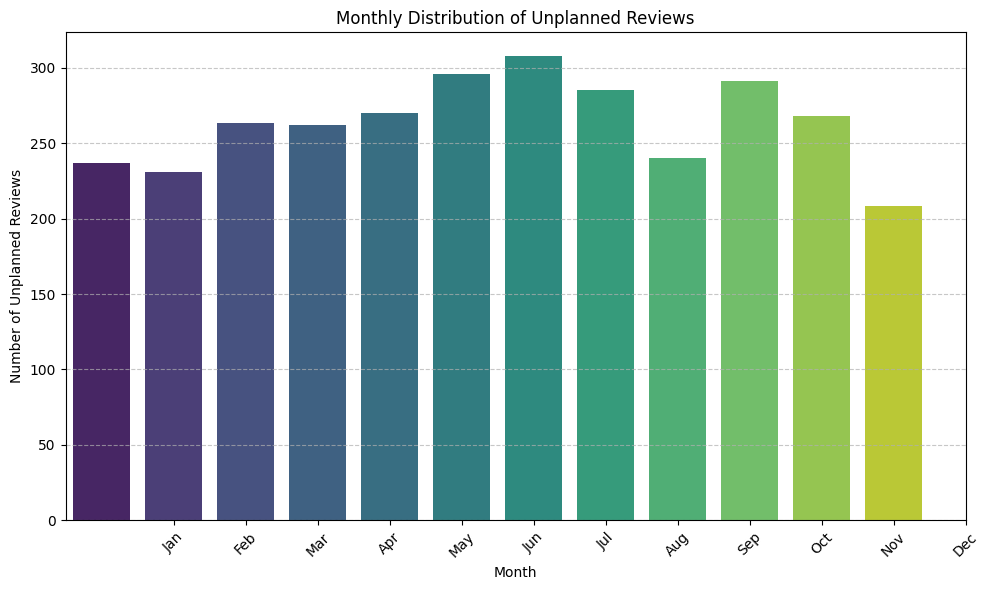

<ipython-input-13-1b1a793fa4cc>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette='viridis')


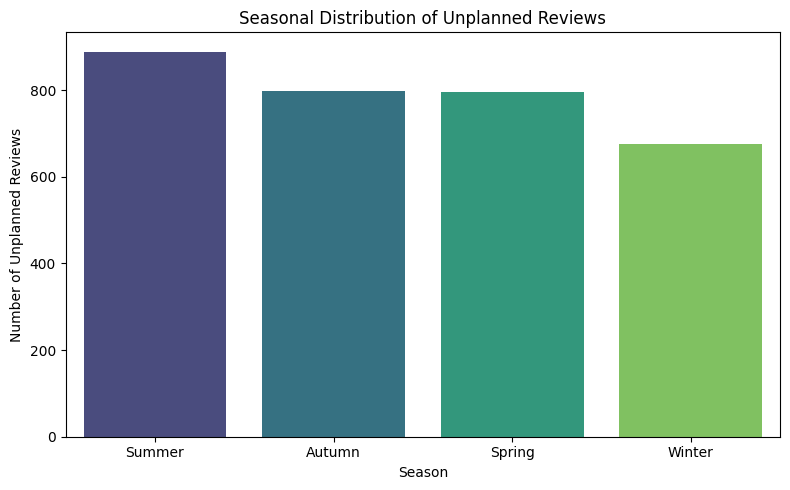

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Filter for unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Extract month and season
df_unplanned['Step Start Date'] = pd.to_datetime(df_unplanned['Step Start Date'])
df_unplanned['Month'] = df_unplanned['Step Start Date'].dt.month
df_unplanned['Season'] = df_unplanned['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

# --- A. Chi-Square Test for Monthly Distribution ---
monthly_counts = df_unplanned['Month'].value_counts().sort_index()
expected_counts = [len(df_unplanned) / 12] * 12  # Uniform expected distribution
chi2_stat_month, p_value_month = stats.chisquare(monthly_counts, f_exp=expected_counts)

print("Chi-Square Test for Monthly Distribution:")
print(f"Chi-Square Statistic: {chi2_stat_month:.2f}, p-value: {p_value_month:.4f}")

# --- B. Chi-Square Test for Seasonal Distribution ---
seasonal_counts = df_unplanned['Season'].value_counts()
expected_season_counts = [len(df_unplanned) / 4] * 4  # Uniform expected distribution
chi2_stat_season, p_value_season = stats.chisquare(seasonal_counts, f_exp=expected_season_counts)

print("\nChi-Square Test for Seasonal Distribution:")
print(f"Chi-Square Statistic: {chi2_stat_season:.2f}, p-value: {p_value_season:.4f}")

# --- C. Visualization ---
# Monthly distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Unplanned Reviews')
plt.title('Monthly Distribution of Unplanned Reviews')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Seasonal distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Number of Unplanned Reviews')
plt.title('Seasonal Distribution of Unplanned Reviews')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update the file path
df = pd.read_excel(file_path)

# Filter for unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate repeat reviews
repeat_reviews = df_unplanned.groupby('Person ID').size().reset_index(name='Repeat Count')

# Merge repeat count back to the original dataset
df_unplanned = df_unplanned.merge(repeat_reviews, on='Person ID')

# --- Association with Reasons ---
# Create a contingency table for reasons and repeat reviews (Repeat Count > 1)
df_unplanned['Repeat Indicator'] = (df_unplanned['Repeat Count'] > 1).astype(int)
reason_counts = pd.crosstab(df_unplanned['Reason for Unplanned'], df_unplanned['Repeat Indicator'])

# Perform Chi-Square Test
chi2_reason, p_reason, _, _ = stats.chi2_contingency(reason_counts)
print("Chi-Square Test for Association Between Reasons and Repeat Reviews:")
print(f"Chi-Square Statistic: {chi2_reason:.2f}, p-value: {p_reason:.4f}")

# --- Association with Demographics (Age Band) ---
# Create a contingency table for Age Band and repeat reviews
age_band_counts = pd.crosstab(df_unplanned['Age Band'], df_unplanned['Repeat Indicator'])

# Perform Chi-Square Test
chi2_age, p_age, _, _ = stats.chi2_contingency(age_band_counts)
print("\nChi-Square Test for Association Between Age Band and Repeat Reviews:")
print(f"Chi-Square Statistic: {chi2_age:.2f}, p-value: {p_age:.4f}")

# --- Visualization ---
# Plot reasons vs. repeat indicator
sns.barplot(x='Reason for Unplanned', y='Repeat Indicator', data=df_unplanned, ci=None, palette='viridis')
plt.xlabel('Reason for Unplanned')
plt.ylabel('Proportion of Repeat Reviews')
plt.title('Association Between Reasons and Repeat Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Age Band vs. repeat indicator
sns.barplot(x='Age Band', y='Repeat Indicator', data=df_unplanned, ci=None, palette='viridis')
plt.xlabel('Age Band')
plt.ylabel('Proportion of Repeat Reviews')
plt.title('Association Between Age Band and Repeat Reviews')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx to Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx


Chi-Square Test for Association Between Reasons and Repeat Reviews:
Chi-Square Statistic: 44.82, p-value: 0.0000

Chi-Square Test for Association Between Age Band and Repeat Reviews:
Chi-Square Statistic: 44.75, p-value: 0.0000


<ipython-input-3-f23da3ad1f8c>:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Reason for Unplanned', y='Repeat Indicator', data=df_unplanned, ci=None, palette='viridis')
<ipython-input-3-f23da3ad1f8c>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reason for Unplanned', y='Repeat Indicator', data=df_unplanned, ci=None, palette='viridis')


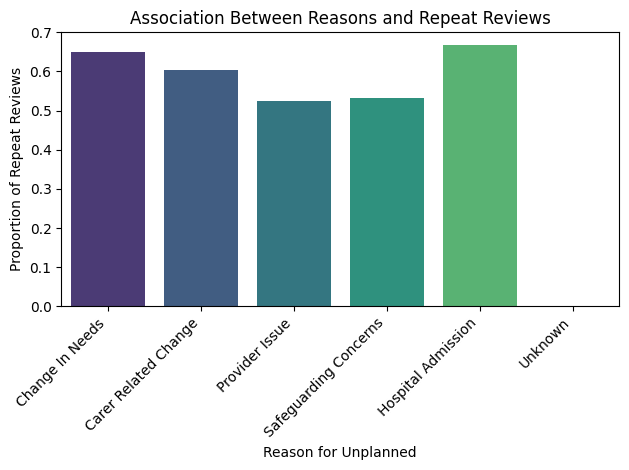

<ipython-input-3-f23da3ad1f8c>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age Band', y='Repeat Indicator', data=df_unplanned, ci=None, palette='viridis')
<ipython-input-3-f23da3ad1f8c>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Band', y='Repeat Indicator', data=df_unplanned, ci=None, palette='viridis')


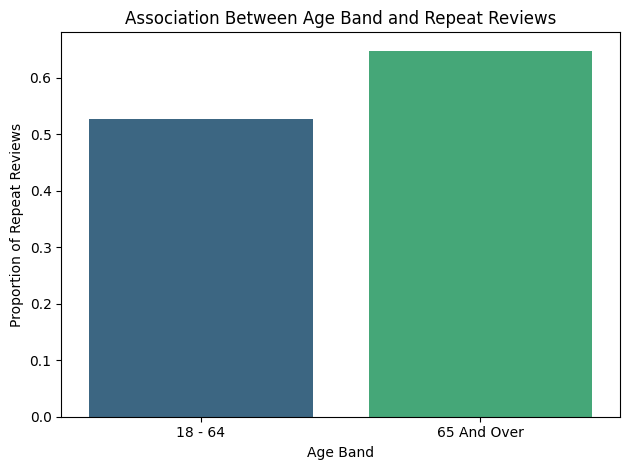

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update the file path
df = pd.read_excel(file_path)

# Filter for unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate repeat reviews
repeat_reviews = df_unplanned.groupby('Person ID').size().reset_index(name='Repeat Count')

# Merge repeat count back to the original dataset
df_unplanned = df_unplanned.merge(repeat_reviews, on='Person ID')

# --- Association with Reasons ---
# Create a contingency table for reasons and repeat reviews (Repeat Count > 1)
df_unplanned['Repeat Indicator'] = (df_unplanned['Repeat Count'] > 1).astype(int)
reason_counts = pd.crosstab(df_unplanned['Reason for Unplanned'], df_unplanned['Repeat Indicator'])

# Perform Chi-Square Test
chi2_reason, p_reason, _, _ = stats.chi2_contingency(reason_counts)
print("Chi-Square Test for Association Between Reasons and Repeat Reviews:")
print(f"Chi-Square Statistic: {chi2_reason:.2f}, p-value: {p_reason:.4f}")

# --- Association with Demographics (Age Band) ---
# Create a contingency table for Age Band and repeat reviews
age_band_counts = pd.crosstab(df_unplanned['Age Band'], df_unplanned['Repeat Indicator'])

# Perform Chi-Square Test
chi2_age, p_age, _, _ = stats.chi2_contingency(age_band_counts)
print("\nChi-Square Test for Association Between Age Band and Repeat Reviews:")
print(f"Chi-Square Statistic: {chi2_age:.2f}, p-value: {p_age:.4f}")

# --- Visualization ---
# Plot reasons vs. repeat indicator
sns.barplot(x='Reason for Unplanned', y='Repeat Indicator', data=df_unplanned, ci=None, palette='viridis')
plt.xlabel('Reason for Unplanned')
plt.ylabel('Proportion of Repeat Reviews')
plt.title('Association Between Reasons and Repeat Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Age Band vs. repeat indicator
sns.barplot(x='Age Band', y='Repeat Indicator', data=df_unplanned, ci=None, palette='viridis')
plt.xlabel('Age Band')
plt.ylabel('Proportion of Repeat Reviews')
plt.title('Association Between Age Band and Repeat Reviews')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Save reasons and repeat reviews table to Excel
reason_table.to_excel("Reasons_and_Repeat_Reviews.xlsx", index=True)

# Plot reasons vs. repeat indicator as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_table.index, y=reason_table[1], palette='viridis', errorbar=None)
plt.xlabel('Reason for Unplanned')
plt.ylabel('Count of Repeat Reviews')
plt.title('Association Between Reasons and Repeat Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save age bands and repeat reviews table to Excel
age_band_counts = pd.crosstab(df_unplanned['Age Band'], df_unplanned['Repeat Indicator'])
age_band_counts.to_excel("Age_Bands_and_Repeat_Reviews.xlsx", index=True)

# Plot Age Band vs. repeat indicator as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=age_band_counts.index, y=age_band_counts[1], palette='viridis', errorbar=None)
plt.xlabel('Age Band')
plt.ylabel('Count of Repeat Reviews')
plt.title('Association Between Age Band and Repeat Reviews')
plt.tight_layout()
plt.show()

# Instructions for Download in Colab
from google.colab import files

print("Downloading Reasons and Repeat Reviews table...")
files.download("Reasons_and_Repeat_Reviews.xlsx")

print("Downloading Age Bands and Repeat Reviews table...")
files.download("Age_Bands_and_Repeat_Reviews.xlsx")


NameError: name 'reason_table' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update the file path
df = pd.read_excel(file_path)

# Filter for unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate repeat reviews
repeat_reviews = df_unplanned.groupby('Person ID').size().reset_index(name='Repeat Count')

# Merge repeat count back to the original dataset
df_unplanned = df_unplanned.merge(repeat_reviews, on='Person ID')

# Create an indicator for repeat reviews
df_unplanned['Repeat Indicator'] = (df_unplanned['Repeat Count'] > 1).astype(int)

# Create a contingency table for reasons and repeat reviews
reason_counts = pd.crosstab(df_unplanned['Reason for Unplanned'], df_unplanned['Repeat Indicator'])

# Perform Chi-Square Test
_, _, _, expected = chi2_contingency(reason_counts)

# Create the reason_table
reason_table = reason_counts.copy()
reason_table['Total'] = reason_table.sum(axis=1)
reason_table['Expected Repeat'] = expected[:, 1]

# Save reasons and repeat reviews table to Excel
reason_table.to_excel("Reasons_and_Repeat_Reviews.xlsx", index=True)

# Plot reasons vs. repeat indicator as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_table.index, y=reason_table[1], palette='viridis', errorbar=None)
plt.xlabel('Reason for Unplanned')
plt.ylabel('Count of Repeat Reviews')
plt.title('Association Between Reasons and Repeat Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a contingency table for Age Band and repeat reviews
age_band_counts = pd.crosstab(df_unplanned['Age Band'], df_unplanned['Repeat Indicator'])

# Save age bands and repeat reviews table to Excel
age_band_counts.to_excel("Age_Bands_and_Repeat_Reviews.xlsx", index=True)

# Plot Age Band vs. repeat indicator as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=age_band_counts.index, y=age_band_counts[1], palette='viridis', errorbar=None)
plt.xlabel('Age Band')
plt.ylabel('Count of Repeat Reviews')
plt.title('Association Between Age Band and Repeat Reviews')
plt.tight_layout()
plt.show()

# Download the Excel files (for Google Colab)
from google.colab import files

print("Downloading Reasons and Repeat Reviews table...")
files.download("Reasons_and_Repeat_Reviews.xlsx")

print("Downloading Age Bands and Repeat Reviews table...")
files.download("Age_Bands_and_Repeat_Reviews.xlsx")


NameError: name 'chi2_contingency' is not defined

<ipython-input-6-78712b86be23>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_table.index, y=reason_table[1], palette='viridis', errorbar=None)


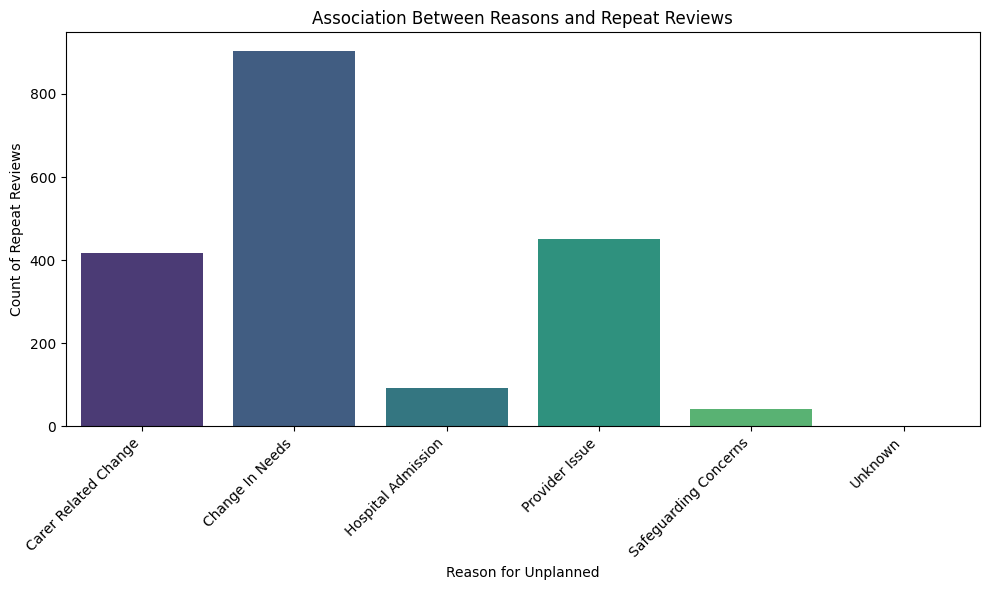

<ipython-input-6-78712b86be23>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_band_counts.index, y=age_band_counts[1], palette='viridis', errorbar=None)


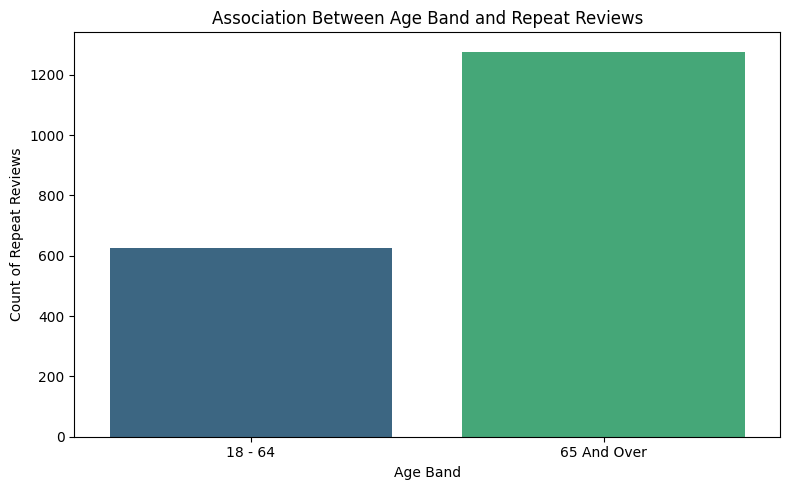

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency  # Ensure chi2_contingency is imported

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update the file path
df = pd.read_excel(file_path)

# Filter for unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate repeat reviews
repeat_reviews = df_unplanned.groupby('Person ID').size().reset_index(name='Repeat Count')

# Merge repeat count back to the original dataset
df_unplanned = df_unplanned.merge(repeat_reviews, on='Person ID')

# Create an indicator for repeat reviews
df_unplanned['Repeat Indicator'] = (df_unplanned['Repeat Count'] > 1).astype(int)

# Create a contingency table for reasons and repeat reviews
reason_counts = pd.crosstab(df_unplanned['Reason for Unplanned'], df_unplanned['Repeat Indicator'])

# Perform Chi-Square Test
_, _, _, expected = chi2_contingency(reason_counts)

# Create the reason_table
reason_table = reason_counts.copy()
reason_table['Total'] = reason_table.sum(axis=1)
reason_table['Expected Repeat'] = expected[:, 1]

# Save reasons and repeat reviews table to Excel
reason_table.to_excel("Reasons_and_Repeat_Reviews.xlsx", index=True)

# Plot reasons vs. repeat indicator as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_table.index, y=reason_table[1], palette='viridis', errorbar=None)
plt.xlabel('Reason for Unplanned')
plt.ylabel('Count of Repeat Reviews')
plt.title('Association Between Reasons and Repeat Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a contingency table for Age Band and repeat reviews
age_band_counts = pd.crosstab(df_unplanned['Age Band'], df_unplanned['Repeat Indicator'])

# Save age bands and repeat reviews table to Excel
age_band_counts.to_excel("Age_Bands_and_Repeat_Reviews.xlsx", index=True)

# Plot Age Band vs. repeat indicator as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=age_band_counts.index, y=age_band_counts[1], palette='viridis', errorbar=None)
plt.xlabel('Age Band')
plt.ylabel('Count of Repeat Reviews')
plt.title('Association Between Age Band and Repeat Reviews')
plt.tight_layout()
plt.show()

# Download the Excel files (for Google Colab)
from google.colab import files

print("Downloading Reasons and Repeat Reviews table...")
files.download("Reasons_and_Repeat_Reviews.xlsx")

print("Downloading Age Bands and Repeat Reviews table...")
files.download("Age_Bands_and_Repeat_Reviews.xlsx")


Reasons and Repeat Reviews (Counts and Percentages):


Repeat Indicator       Total    0  Non-Repeat Percentage    1  \
Reason for Unplanned                                            
Carer Related Change     690  273              39.565217  417   
Change In Needs         1390  487              35.035971  903   
Hospital Admission       138   46              33.333333   92   
Provider Issue           858  408              47.552448  450   
Safeguarding Concerns     79   37              46.835443   42   
Unknown                    4    4             100.000000    0   

Repeat Indicator       Repeat Percentage  
Reason for Unplanned                      
Carer Related Change           60.434783  
Change In Needs                64.964029  
Hospital Admission             66.666667  
Provider Issue                 52.447552  
Safeguarding Concerns          53.164557  
Unknown                         0.000000

<ipython-input-7-2c45985a07f2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_table.index, y=reason_table['Repeat Percentage'], palette='viridis', errorbar=None)


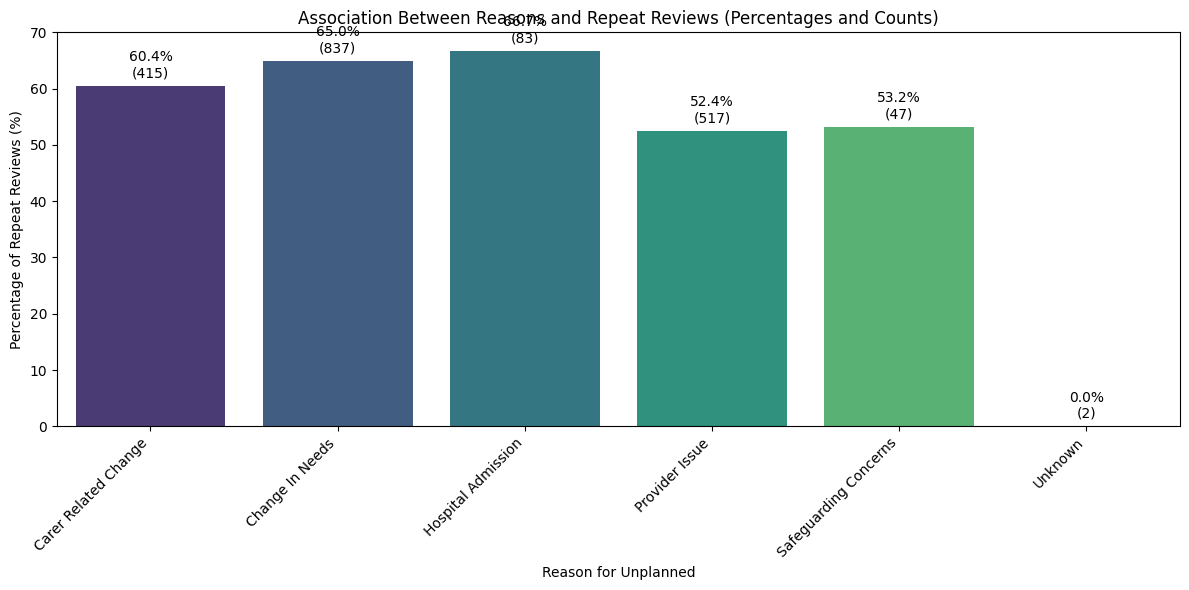

Repeat Indicator  Total    0  Non-Repeat Percentage     1  Repeat Percentage
Age Band                                                                    
18 - 64            1189  562              47.266611   627          52.733389
65 And Over        1970  693              35.177665  1277          64.822335


Age Bands and Repeat Reviews (Counts and Percentages):


<ipython-input-7-2c45985a07f2>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_band_counts.index, y=age_band_counts['Repeat Percentage'], palette='viridis', errorbar=None)


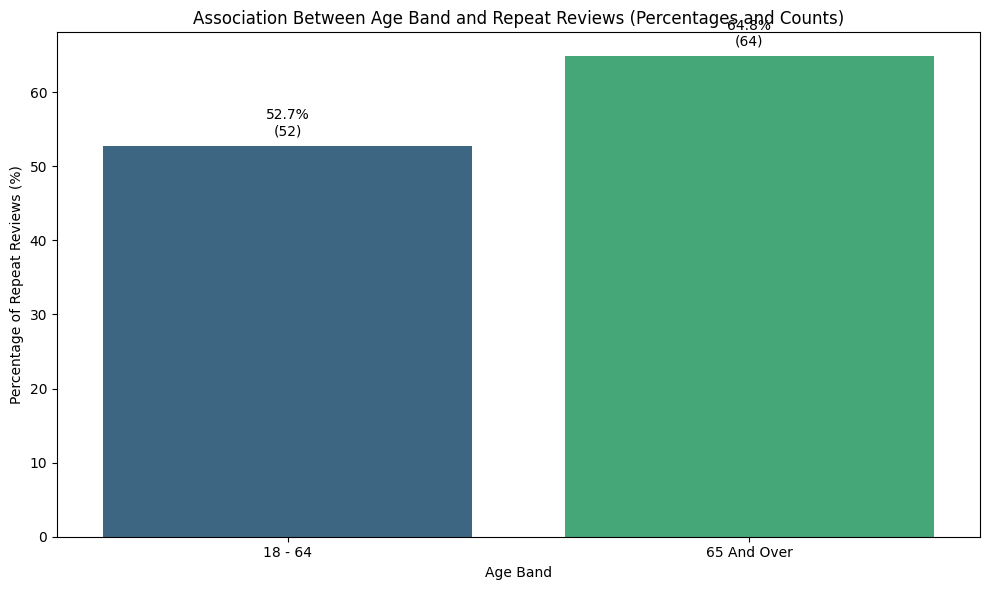

In [ ]:
# Calculate percentages for reasons and repeat reviews
reason_table['Repeat Percentage'] = (reason_table[1] / reason_table['Total']) * 100
reason_table['Non-Repeat Percentage'] = (reason_table[0] / reason_table['Total']) * 100

# Display the reasons table directly
print("Reasons and Repeat Reviews (Counts and Percentages):")
display(reason_table[['Total', 0, 'Non-Repeat Percentage', 1, 'Repeat Percentage']])

# Plot reasons vs. repeat indicator as a bar chart with percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=reason_table.index, y=reason_table['Repeat Percentage'], palette='viridis', errorbar=None)
for index, value in enumerate(reason_table['Repeat Percentage']):
    count = reason_table.iloc[index, 3]  # Repeat count
    plt.text(index, value + 1, f'{value:.1f}%\n({int(count)})', ha='center', va='bottom')
plt.xlabel('Reason for Unplanned')
plt.ylabel('Percentage of Repeat Reviews (%)')
plt.title('Association Between Reasons and Repeat Reviews (Percentages and Counts)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate percentages for age band and repeat reviews
age_band_counts['Total'] = age_band_counts.sum(axis=1)
age_band_counts['Repeat Percentage'] = (age_band_counts[1] / age_band_counts['Total']) * 100
age_band_counts['Non-Repeat Percentage'] = (age_band_counts[0] / age_band_counts['Total']) * 100

# Display the age bands table directly
print("\nAge Bands and Repeat Reviews (Counts and Percentages):")
display(age_band_counts[['Total', 0, 'Non-Repeat Percentage', 1, 'Repeat Percentage']])

# Plot age bands vs. repeat indicator as a bar chart with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=age_band_counts.index, y=age_band_counts['Repeat Percentage'], palette='viridis', errorbar=None)
for index, value in enumerate(age_band_counts['Repeat Percentage']):
    count = age_band_counts.iloc[index, 3]  # Repeat count
    plt.text(index, value + 1, f'{value:.1f}%\n({int(count)})', ha='center', va='bottom')
plt.xlabel('Age Band')
plt.ylabel('Percentage of Repeat Reviews (%)')
plt.title('Association Between Age Band and Repeat Reviews (Percentages and Counts)')
plt.tight_layout()
plt.show()


<ipython-input-8-74845207c160>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_table.index, y=reason_table['Repeat Percentage'], palette='viridis', errorbar=None)


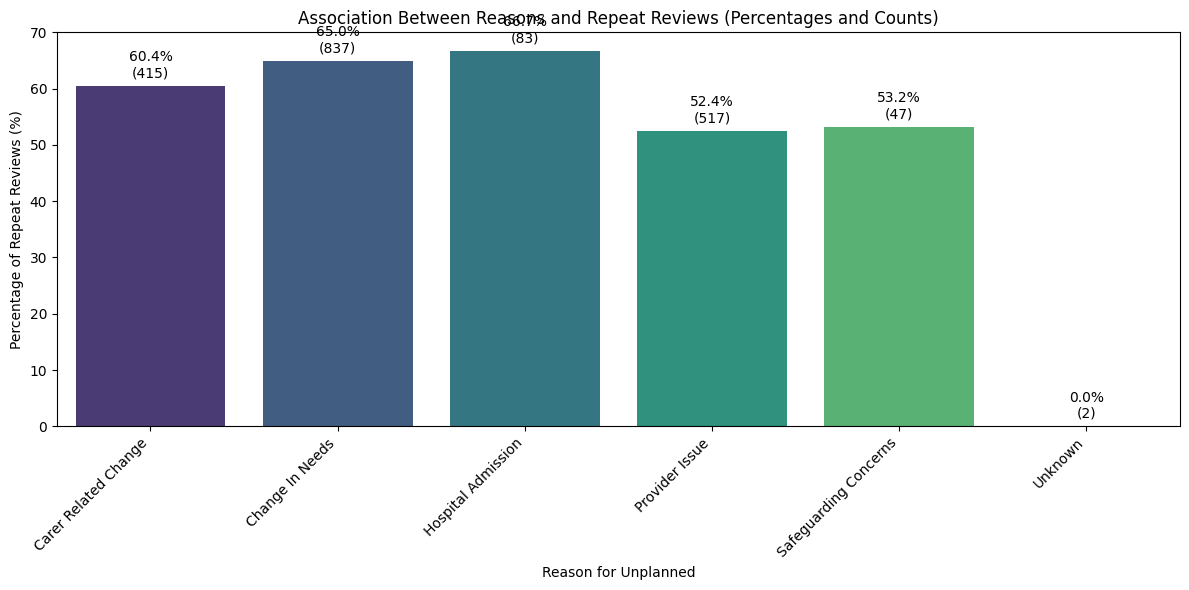

In [ ]:
# Correctly plot percentages for reasons with accurate counts
plt.figure(figsize=(12, 6))
sns.barplot(x=reason_table.index, y=reason_table['Repeat Percentage'], palette='viridis', errorbar=None)
for index, value in enumerate(reason_table['Repeat Percentage']):
    count = reason_table.iloc[index, 3]  # Correctly reference the repeat count (1)
    plt.text(index, value + 1, f'{value:.1f}%\n({int(count)})', ha='center', va='bottom')
plt.xlabel('Reason for Unplanned')
plt.ylabel('Percentage of Repeat Reviews (%)')
plt.title('Association Between Reasons and Repeat Reviews (Percentages and Counts)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-9-b139c2345e5f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_table.index, y=reason_table['Repeat Percentage'], palette='viridis', errorbar=None)


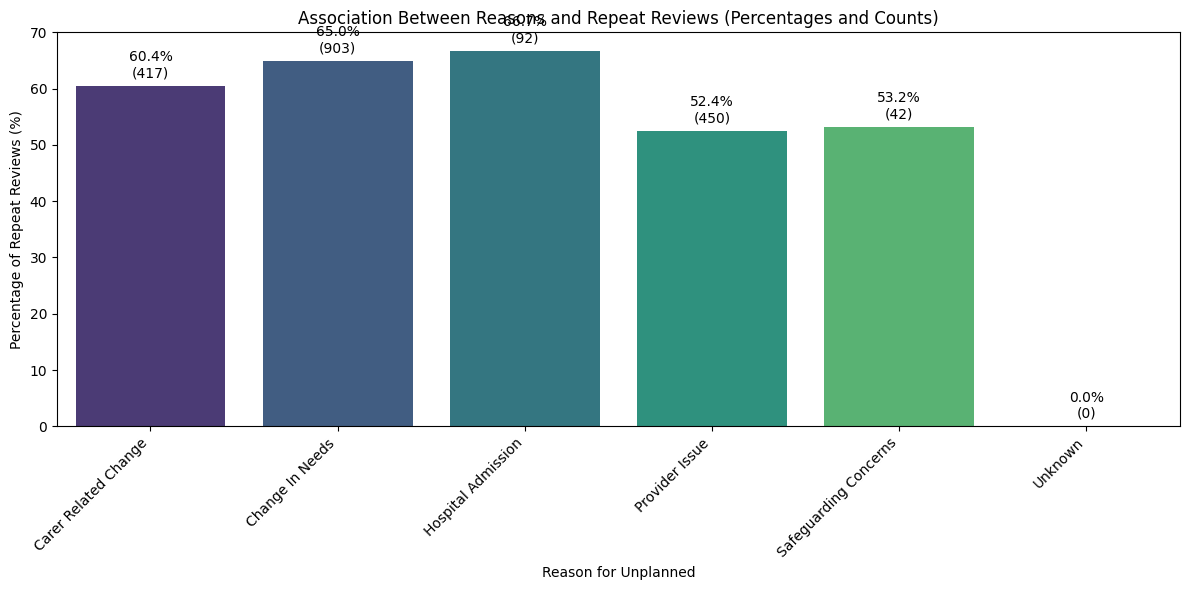

In [ ]:
# Correctly plot percentages with accurate counts for reasons
plt.figure(figsize=(12, 6))
sns.barplot(x=reason_table.index, y=reason_table['Repeat Percentage'], palette='viridis', errorbar=None)

# Loop through each bar and add accurate annotations
for index, value in enumerate(reason_table['Repeat Percentage']):
    repeat_count = reason_table.iloc[index, reason_table.columns.get_loc(1)]  # Access the '1' (repeat count) column
    plt.text(index, value + 1, f'{value:.1f}%\n({int(repeat_count)})', ha='center', va='bottom')

plt.xlabel('Reason for Unplanned')
plt.ylabel('Percentage of Repeat Reviews (%)')
plt.title('Association Between Reasons and Repeat Reviews (Percentages and Counts)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Reasons and Repeat Reviews (Counts and Percentages):
Repeat Indicator       Total  Non-Repeat Count  Non-Repeat Percentage  \
Reason for Unplanned                                                    
Carer Related Change     690               273              39.565217   
Change In Needs         1390               487              35.035971   
Hospital Admission       138                46              33.333333   
Provider Issue           858               408              47.552448   
Safeguarding Concerns     79                37              46.835443   
Unknown                    4                 4             100.000000   

Repeat Indicator       Repeat Count  Repeat Percentage  
Reason for Unplanned                                    
Carer Related Change            417          60.434783  
Change In Needs                 903          64.964029  
Hospital Admission               92          66.666667  
Provider Issue                  450          52.447552  
Safeguarding Concern

<ipython-input-10-67588f1cdfe3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_table.index, y=reason_table['Repeat Percentage'], palette='viridis', errorbar=None)


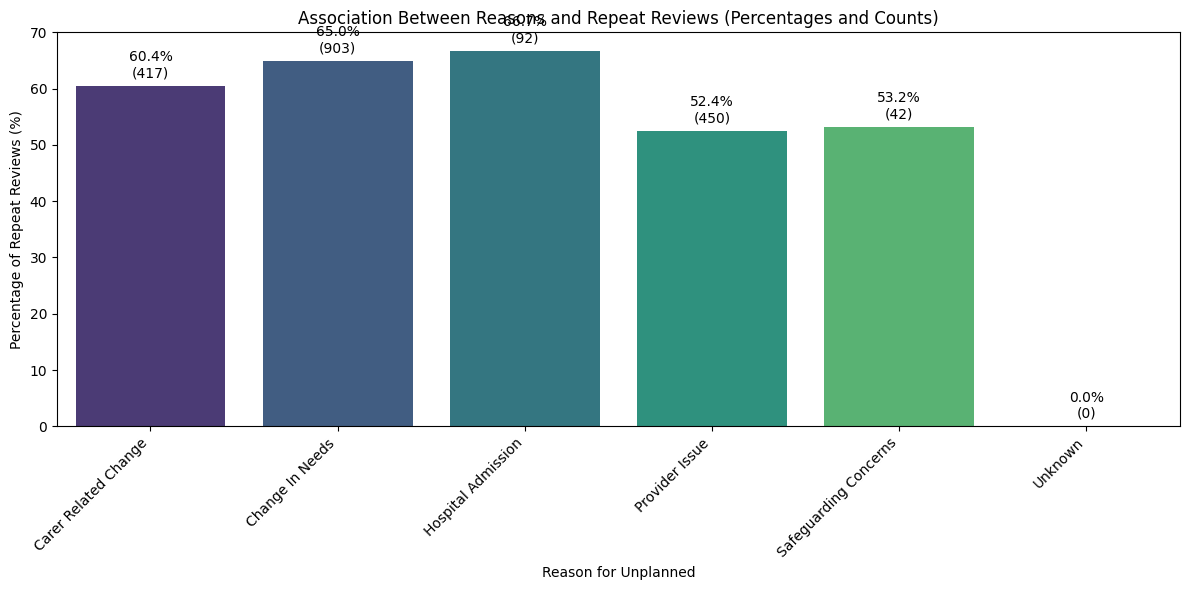

In [ ]:
# Add percentages and correct repeat counts to the table
reason_table['Repeat Count'] = reason_table[1]  # Actual repeat count
reason_table['Non-Repeat Count'] = reason_table[0]  # Actual non-repeat count
reason_table_display = reason_table[['Total', 'Non-Repeat Count', 'Non-Repeat Percentage', 'Repeat Count', 'Repeat Percentage']]

# Display the table with counts and percentages
print("Reasons and Repeat Reviews (Counts and Percentages):")
print(reason_table_display)

# Correctly plot percentages with accurate counts for reasons
plt.figure(figsize=(12, 6))
sns.barplot(x=reason_table.index, y=reason_table['Repeat Percentage'], palette='viridis', errorbar=None)

# Add accurate annotations to the bar chart
for index, value in enumerate(reason_table['Repeat Percentage']):
    repeat_count = reason_table.iloc[index]['Repeat Count']  # Correct repeat count
    plt.text(index, value + 1, f'{value:.1f}%\n({int(repeat_count)})', ha='center', va='bottom')

plt.xlabel('Reason for Unplanned')
plt.ylabel('Percentage of Repeat Reviews (%)')
plt.title('Association Between Reasons and Repeat Reviews (Percentages and Counts)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Reasons for Unplanned Reviews (Sorted by Repeat Percentage):
Repeat Indicator       Total    1  Repeat Percentage
Reason for Unplanned                                
Hospital Admission       138   92          66.666667
Change In Needs         1390  903          64.964029
Carer Related Change     690  417          60.434783
Safeguarding Concerns     79   42          53.164557
Provider Issue           858  450          52.447552
Unknown                    4    0           0.000000


<ipython-input-11-8c63f8e0e994>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_table_sorted.index, y=reason_table_sorted['Repeat Percentage'], palette='viridis', errorbar=None)


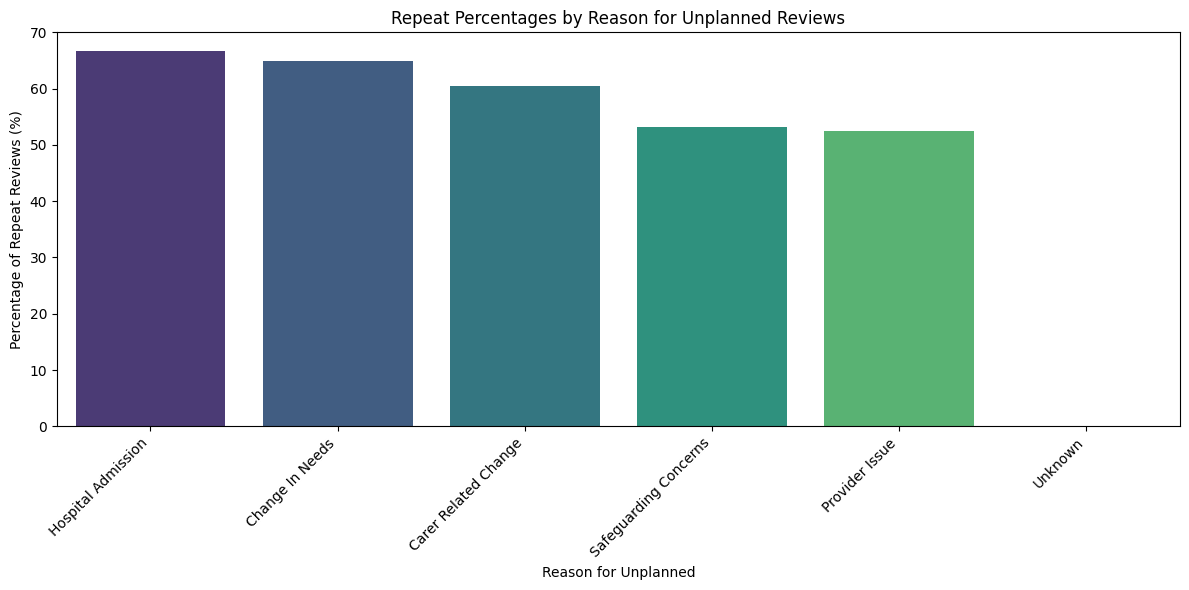


Chi-Square Test for Differences in Repeat Rates by Reason:
Chi-Square Statistic: 44.82, p-value: 0.0000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the dataset
file_path = '/content/Fully_Cleaned_SALT_Unplanned_Reviews_Data.xlsx'  # Update the file path
df = pd.read_excel(file_path)

# Filter for unplanned reviews
df_unplanned = df[df['Type of Review'] == 'Unplanned']

# Calculate repeat reviews
repeat_reviews = df_unplanned.groupby('Person ID').size().reset_index(name='Repeat Count')

# Merge repeat count back to the original dataset
df_unplanned = df_unplanned.merge(repeat_reviews, on='Person ID')

# Create an indicator for repeat reviews
df_unplanned['Repeat Indicator'] = (df_unplanned['Repeat Count'] > 1).astype(int)

# Create a contingency table for reasons and repeat reviews
reason_counts = pd.crosstab(df_unplanned['Reason for Unplanned'], df_unplanned['Repeat Indicator'])

# Calculate repeat percentages
reason_table = reason_counts.copy()
reason_table['Total'] = reason_table.sum(axis=1)
reason_table['Repeat Percentage'] = (reason_table[1] / reason_table['Total']) * 100

# Identify reasons with the highest repeat percentages
reason_table_sorted = reason_table.sort_values('Repeat Percentage', ascending=False)

# Display the sorted table
print("Reasons for Unplanned Reviews (Sorted by Repeat Percentage):")
print(reason_table_sorted[['Total', 1, 'Repeat Percentage']])

# Plot reasons vs. repeat percentages as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=reason_table_sorted.index, y=reason_table_sorted['Repeat Percentage'], palette='viridis', errorbar=None)
plt.xlabel('Reason for Unplanned')
plt.ylabel('Percentage of Repeat Reviews (%)')
plt.title('Repeat Percentages by Reason for Unplanned Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Perform Chi-Square Test to check if differences in repeat rates across reasons are significant
chi2_stat, p_value, _, _ = chi2_contingency(reason_counts)
print("\nChi-Square Test for Differences in Repeat Rates by Reason:")
print(f"Chi-Square Statistic: {chi2_stat:.2f}, p-value: {p_value:.4f}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data (replace 'path_to_file' with your file path)
cleaned_data = pd.read_excel('path_to_file')

# Summarizing the number of unplanned reviews by team
team_summary = cleaned_data['Assigned Team'].value_counts().reset_index()
team_summary.columns = ['Assigned Team', 'Unplanned Reviews']

# Calculating percentages
team_summary['Percentage'] = (team_summary['Unplanned Reviews'] / team_summary['Unplanned Reviews'].sum()) * 100

# Creating a bar chart for visualization
plt.figure(figsize=(12, 8))
bars = plt.bar(team_summary['Assigned Team'], team_summary['Unplanned Reviews'], tick_label=team_summary['Assigned Team'])

# Adding value annotations on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}\n({(height / team_summary["Unplanned Reviews"].sum() * 100):.1f}%)',
             ha='center', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Assigned Team')
plt.ylabel('Number of Unplanned Reviews')
plt.title('Number of Unplanned Reviews by Team')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

# Displaying the summarized data in a table
team_summary


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_file'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_social_care_data.xlsx to cleaned_social_care_data.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data (replace 'path_to_file' with your file path)
cleaned_data = pd.read_excel('path_to_file')

# Summarizing the number of unplanned reviews by team
team_summary = cleaned_data['Assigned Team'].value_counts().reset_index()
team_summary.columns = ['Assigned Team', 'Unplanned Reviews']

# Calculating percentages
team_summary['Percentage'] = (team_summary['Unplanned Reviews'] / team_summary['Unplanned Reviews'].sum()) * 100

# Creating a bar chart for visualization
plt.figure(figsize=(12, 8))
bars = plt.bar(team_summary['Assigned Team'], team_summary['Unplanned Reviews'], tick_label=team_summary['Assigned Team'])

# Adding value annotations on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}\n({(height / team_summary["Unplanned Reviews"].sum() * 100):.1f}%)',
             ha='center', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Assigned Team')
plt.ylabel('Number of Unplanned Reviews')
plt.title('Number of Unplanned Reviews by Team')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

# Displaying the summarized data in a table
team_summary



FileNotFoundError: [Errno 2] No such file or directory: 'path_to_file'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_social_care_data.xlsx to cleaned_social_care_data (1).xlsx


Saving cleaned_social_care_data.xlsx to cleaned_social_care_data (2).xlsx


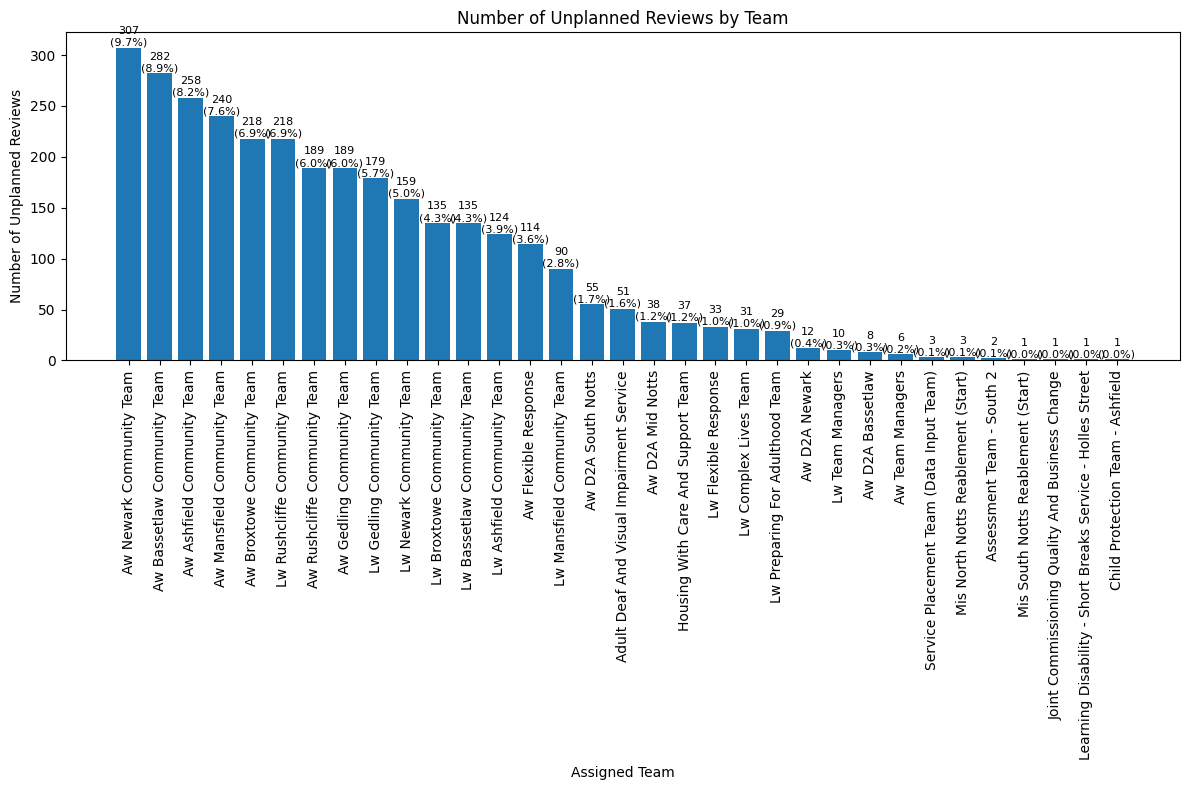

Assigned Team  Unplanned Reviews  \
0                            Aw Newark Community Team                307   
1                         Aw Bassetlaw Community Team                282   
2                          Aw Ashfield Community Team                258   
3                         Aw Mansfield Community Team                240   
4                          Aw Broxtowe Community Team                218   
5                        Lw Rushcliffe Community Team                218   
6                        Aw Rushcliffe Community Team                189   
7                           Aw Gedling Community Team                189   
8                           Lw Gedling Community Team                179   
9                            Lw Newark Community Team                159   
10                         Lw Broxtowe Community Team                135   
11                        Lw Bassetlaw Community Team                135   
12                         Lw Ashfield Community Team                124   
13                               Aw Flexible Response                114   
14                        Lw Mansfield Community Team                 90   
15                                 Aw D2A South Notts                 55   
16           Adult Deaf And Visual Impairment Service                 51   
17                                   Aw D2A Mid Notts                 38   
18                 Housing With Care And Support Team                 37   
19                               Lw Flexible Response                 33   
20                              Lw Complex Lives Team                 31   
21                    Lw Preparing For Adulthood Team                 29   
22                                      Aw D2A Newark                 12   
23                                   Lw Team Managers                 10   
24                                   Aw D2A Bassetlaw                  8   
25                                   Aw Team Managers                  6   
26           Service Placement Team (Data Input Team)                  3   
27                 Mis North Notts Reablement (Start)                  3   
28                          Assessment Team - South 2                  2   
29                 Mis South Notts Reablement (Start)                  1   
30    Joint Commissioning Quality And Business Change                  1   
31  Learning Disability - Short Breaks Service - H...                  1   
32                   Child Protection Team - Ashfield                  1   

    Percentage  
0     9.718265  
1     8.926876  
2     8.167142  
3     7.597341  
4     6.900918  
5     6.900918  
6     5.982906  
7     5.982906  
8     5.666350  
9     5.033238  
10    4.273504  
11    4.273504  
12    3.925293  
13    3.608737  
14    2.849003  
15    1.741057  
16    1.614435  
17    1.202912  
18    1.171257  
19    1.044634  
20    0.981323  
21    0.918012  
22    0.379867  
23    0.316556  
24    0.253245  
25    0.189934  
26    0.094967  
27    0.094967  
28    0.063311  
29    0.031656  
30    0.031656  
31    0.031656  
32    0.031656

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload your Excel file
uploaded = files.upload()

# Step 2: Replace 'your_file_name.xlsx' with the exact name of your uploaded file
file_name = list(uploaded.keys())[0]  # Automatically picks the uploaded file name
cleaned_data = pd.read_excel(file_name)

# Step 3: Summarizing the number of unplanned reviews by team
team_summary = cleaned_data['Assigned Team'].value_counts().reset_index()
team_summary.columns = ['Assigned Team', 'Unplanned Reviews']

# Calculating percentages
team_summary['Percentage'] = (team_summary['Unplanned Reviews'] / team_summary['Unplanned Reviews'].sum()) * 100

# Creating a bar chart for visualization
plt.figure(figsize=(12, 8))
bars = plt.bar(team_summary['Assigned Team'], team_summary['Unplanned Reviews'], tick_label=team_summary['Assigned Team'])

# Adding value annotations on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}\n({(height / team_summary["Unplanned Reviews"].sum() * 100):.1f}%)',
             ha='center', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Assigned Team')
plt.ylabel('Number of Unplanned Reviews')
plt.title('Number of Unplanned Reviews by Team')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

# Step 4: Displaying the summarized data in a table
team_summary


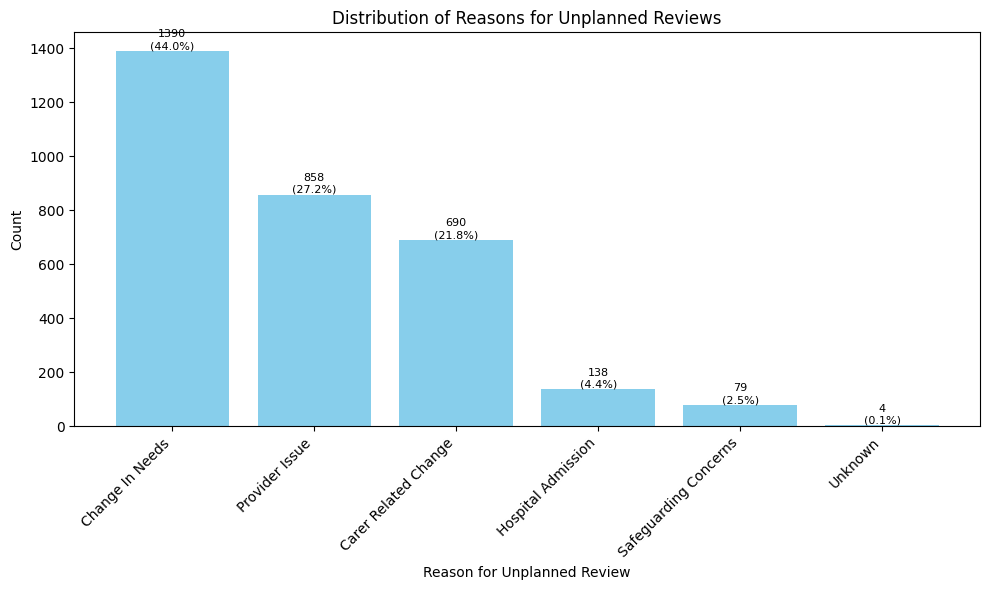

Reason  Count  Percentage
0        Change In Needs   1390   44.001266
1         Provider Issue    858   27.160494
2   Carer Related Change    690   21.842355
3     Hospital Admission    138    4.368471
4  Safeguarding Concerns     79    2.500791
5                Unknown      4    0.126622

In [ ]:
# Summarizing the frequency of reasons for unplanned reviews
reason_summary = cleaned_data['Reason for Unplanned'].value_counts().reset_index()
reason_summary.columns = ['Reason', 'Count']

# Adding percentages
reason_summary['Percentage'] = (reason_summary['Count'] / reason_summary['Count'].sum()) * 100

# Bar chart visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(reason_summary['Reason'], reason_summary['Count'], color='skyblue')

# Adding annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}\n({(height / reason_summary["Count"].sum() * 100):.1f}%)',
             ha='center', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Reason for Unplanned Review')
plt.ylabel('Count')
plt.title('Distribution of Reasons for Unplanned Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Displaying the summarized data
reason_summary


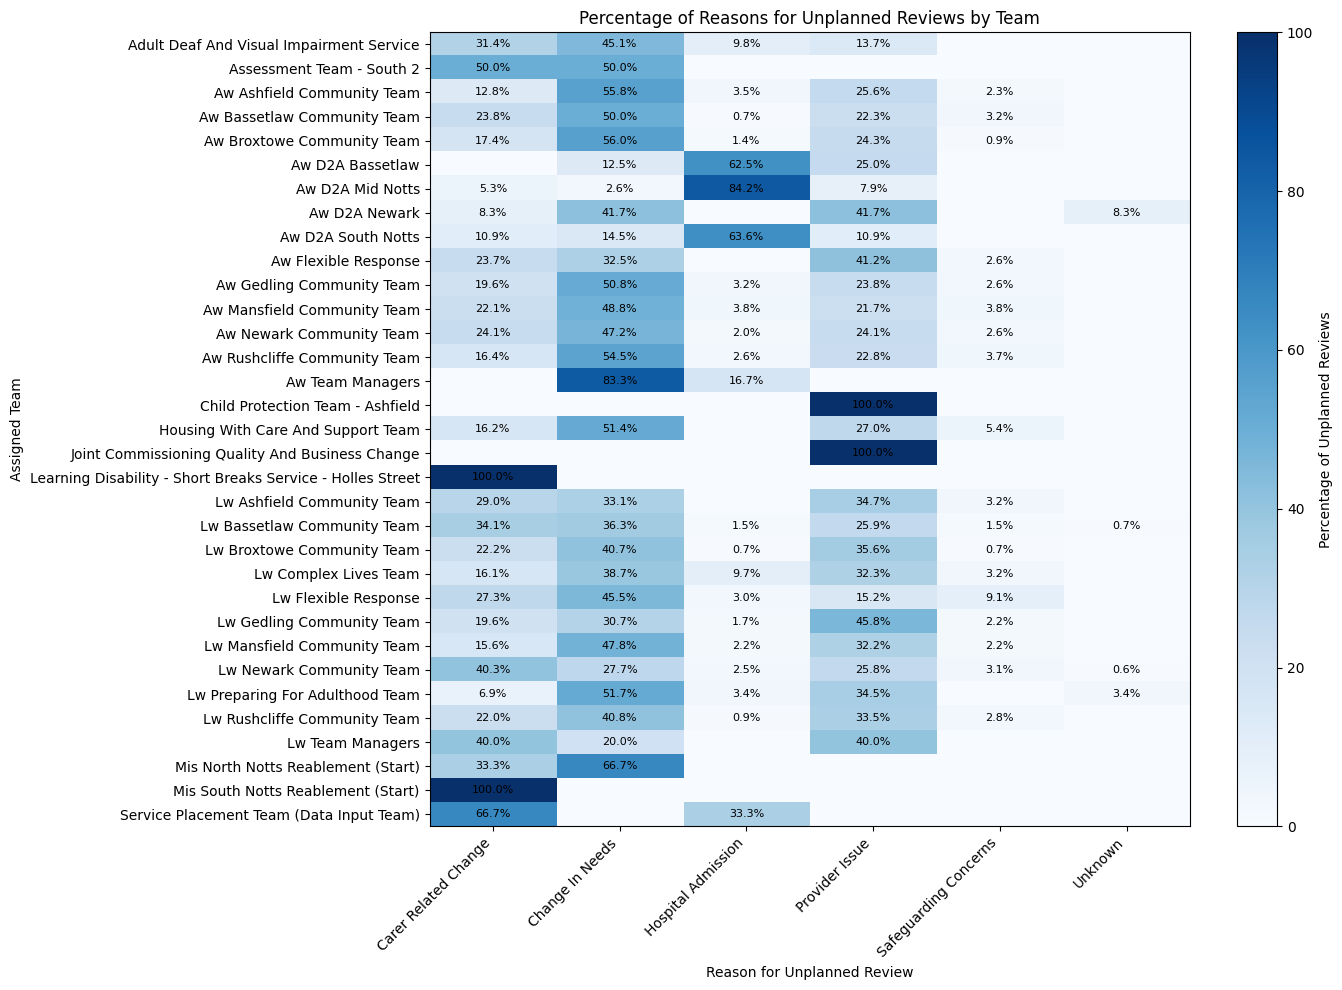

Reason for Unplanned                                Carer Related Change  \
Assigned Team                                                              
Adult Deaf And Visual Impairment Service                              16   
Assessment Team - South 2                                              1   
Aw Ashfield Community Team                                            33   
Aw Bassetlaw Community Team                                           67   
Aw Broxtowe Community Team                                            38   
Aw D2A Bassetlaw                                                       0   
Aw D2A Mid Notts                                                       2   
Aw D2A Newark                                                          1   
Aw D2A South Notts                                                     6   
Aw Flexible Response                                                  27   
Aw Gedling Community Team                                             37   
Aw Mansfield Community Team                                           53   
Aw Newark Community Team                                              74   
Aw Rushcliffe Community Team                                          31   
Aw Team Managers                                                       0   
Child Protection Team - Ashfield                                       0   
Housing With Care And Support Team                                     6   
Joint Commissioning Quality And Business Change                        0   
Learning Disability - Short Breaks Service - Ho...                     1   
Lw Ashfield Community Team                                            36   
Lw Bassetlaw Community Team                                           46   
Lw Broxtowe Community Team                                            30   
Lw Complex Lives Team                                                  5   
Lw Flexible Response                                                   9   
Lw Gedling Community Team                                             35   
Lw Mansfield Community Team                                           14   
Lw Newark Community Team                                              64   
Lw Preparing For Adulthood Team                                        2   
Lw Rushcliffe Community Team                                          48   
Lw Team Managers                                                       4   
Mis North Notts Reablement (Start)                                     1   
Mis South Notts Reablement (Start)                                     1   
Service Placement Team (Data Input Team)                               2   

Reason for Unplanned                                Change In Needs  \
Assigned Team                                                         
Adult Deaf And Visual Impairment Service                         23   
Assessment Team - South 2                                         1   
Aw Ashfield Community Team                                      144   
Aw Bassetlaw Community Team                                     141   
Aw Broxtowe Community Team                                      122   
Aw D2A Bassetlaw                                                  1   
Aw D2A Mid Notts                                                  1   
Aw D2A Newark                                                     5   
Aw D2A South Notts                                                8   
Aw Flexible Response                                             37   
Aw Gedling Community Team                                        96   
Aw Mansfield Community Team                                     117   
Aw Newark Community Team                                        145   
Aw Rushcliffe Community Team                                    103   
Aw Team Managers                                                  5   
Child Protection Team - Ashfield                                  0   
Housing With Care And Support Team                           

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your loaded DataFrame
# Creating a cross-tabulation of reasons and assigned teams
team_reason_crosstab = pd.crosstab(cleaned_data['Assigned Team'], cleaned_data['Reason for Unplanned'])

# Adding a percentage breakdown for each team
team_reason_percentage = team_reason_crosstab.div(team_reason_crosstab.sum(axis=1), axis=0) * 100

# Plotting the heatmap for visualization
plt.figure(figsize=(14, 10))
plt.imshow(team_reason_percentage, cmap='Blues', aspect='auto')
plt.colorbar(label='Percentage of Unplanned Reviews')

# Adding labels and title
plt.xticks(range(len(team_reason_percentage.columns)), team_reason_percentage.columns, rotation=45, ha='right')
plt.yticks(range(len(team_reason_percentage.index)), team_reason_percentage.index)
plt.xlabel('Reason for Unplanned Review')
plt.ylabel('Assigned Team')
plt.title('Percentage of Reasons for Unplanned Reviews by Team')

# Annotating percentages on the heatmap
for i in range(len(team_reason_percentage.index)):
    for j in range(len(team_reason_percentage.columns)):
        value = team_reason_percentage.iloc[i, j]
        if value > 0:  # Only annotate non-zero values
            plt.text(j, i, f'{value:.1f}%', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Displaying the crosstab data
team_reason_crosstab


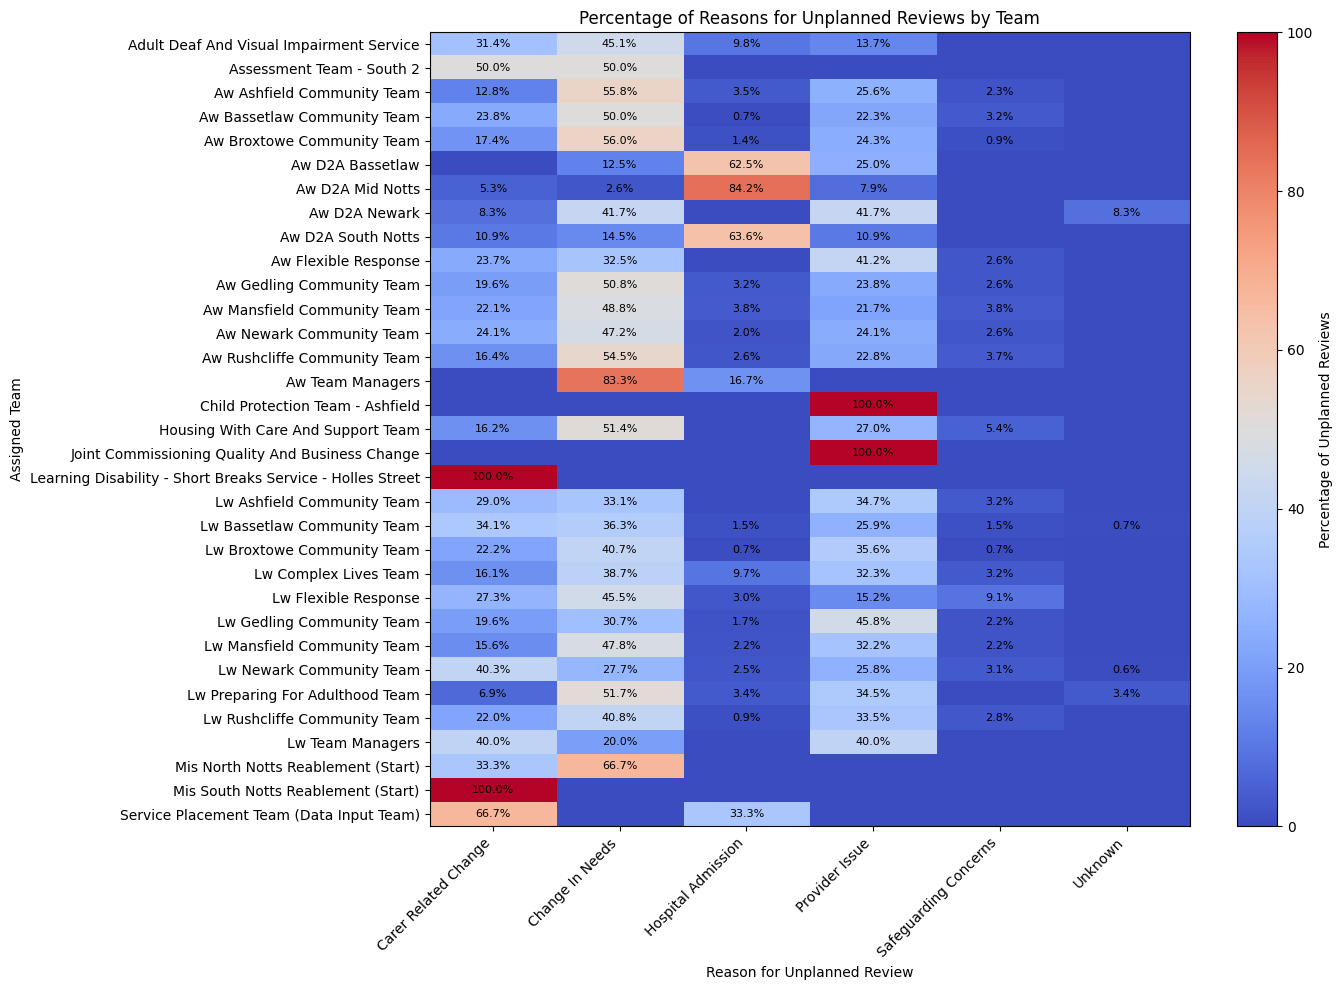

Reason for Unplanned                                Carer Related Change  \
Assigned Team                                                              
Adult Deaf And Visual Impairment Service                              16   
Assessment Team - South 2                                              1   
Aw Ashfield Community Team                                            33   
Aw Bassetlaw Community Team                                           67   
Aw Broxtowe Community Team                                            38   
Aw D2A Bassetlaw                                                       0   
Aw D2A Mid Notts                                                       2   
Aw D2A Newark                                                          1   
Aw D2A South Notts                                                     6   
Aw Flexible Response                                                  27   
Aw Gedling Community Team                                             37   
Aw Mansfield Community Team                                           53   
Aw Newark Community Team                                              74   
Aw Rushcliffe Community Team                                          31   
Aw Team Managers                                                       0   
Child Protection Team - Ashfield                                       0   
Housing With Care And Support Team                                     6   
Joint Commissioning Quality And Business Change                        0   
Learning Disability - Short Breaks Service - Ho...                     1   
Lw Ashfield Community Team                                            36   
Lw Bassetlaw Community Team                                           46   
Lw Broxtowe Community Team                                            30   
Lw Complex Lives Team                                                  5   
Lw Flexible Response                                                   9   
Lw Gedling Community Team                                             35   
Lw Mansfield Community Team                                           14   
Lw Newark Community Team                                              64   
Lw Preparing For Adulthood Team                                        2   
Lw Rushcliffe Community Team                                          48   
Lw Team Managers                                                       4   
Mis North Notts Reablement (Start)                                     1   
Mis South Notts Reablement (Start)                                     1   
Service Placement Team (Data Input Team)                               2   

Reason for Unplanned                                Change In Needs  \
Assigned Team                                                         
Adult Deaf And Visual Impairment Service                         23   
Assessment Team - South 2                                         1   
Aw Ashfield Community Team                                      144   
Aw Bassetlaw Community Team                                     141   
Aw Broxtowe Community Team                                      122   
Aw D2A Bassetlaw                                                  1   
Aw D2A Mid Notts                                                  1   
Aw D2A Newark                                                     5   
Aw D2A South Notts                                                8   
Aw Flexible Response                                             37   
Aw Gedling Community Team                                        96   
Aw Mansfield Community Team                                     117   
Aw Newark Community Team                                        145   
Aw Rushcliffe Community Team                                    103   
Aw Team Managers                                                  5   
Child Protection Team - Ashfield                                  0   
Housing With Care And Support Team                           

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your loaded DataFrame
# Creating a cross-tabulation of reasons and assigned teams
team_reason_crosstab = pd.crosstab(cleaned_data['Assigned Team'], cleaned_data['Reason for Unplanned'])

# Adding a percentage breakdown for each team
team_reason_percentage = team_reason_crosstab.div(team_reason_crosstab.sum(axis=1), axis=0) * 100

# Plotting the heatmap for visualization with a different color map (e.g., 'coolwarm')
plt.figure(figsize=(14, 10))
plt.imshow(team_reason_percentage, cmap='coolwarm', aspect='auto')  # Change 'coolwarm' to your preferred colormap
plt.colorbar(label='Percentage of Unplanned Reviews')

# Adding labels and title
plt.xticks(range(len(team_reason_percentage.columns)), team_reason_percentage.columns, rotation=45, ha='right')
plt.yticks(range(len(team_reason_percentage.index)), team_reason_percentage.index)
plt.xlabel('Reason for Unplanned Review')
plt.ylabel('Assigned Team')
plt.title('Percentage of Reasons for Unplanned Reviews by Team')

# Annotating percentages on the heatmap
for i in range(len(team_reason_percentage.index)):
    for j in range(len(team_reason_percentage.columns)):
        value = team_reason_percentage.iloc[i, j]
        if value > 0:  # Only annotate non-zero values
            plt.text(j, i, f'{value:.1f}%', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Displaying the crosstab data
team_reason_crosstab


Chi-Square Test Results
Chi-Square Statistic: 0.00
p-value: 1.0000
Degrees of Freedom: 0

Expected Frequencies:
Type of Review                                      Unplanned
Assigned Team                                                
Adult Deaf And Visual Impairment Service                 51.0
Assessment Team - South 2                                 2.0
Aw Ashfield Community Team                              258.0
Aw Bassetlaw Community Team                             282.0
Aw Broxtowe Community Team                              218.0
Aw D2A Bassetlaw                                          8.0
Aw D2A Mid Notts                                         38.0
Aw D2A Newark                                            12.0
Aw D2A South Notts                                       55.0
Aw Flexible Response                                    114.0
Aw Gedling Community Team                               189.0
Aw Mansfield Community Team                             240.0
Aw Newark Community 

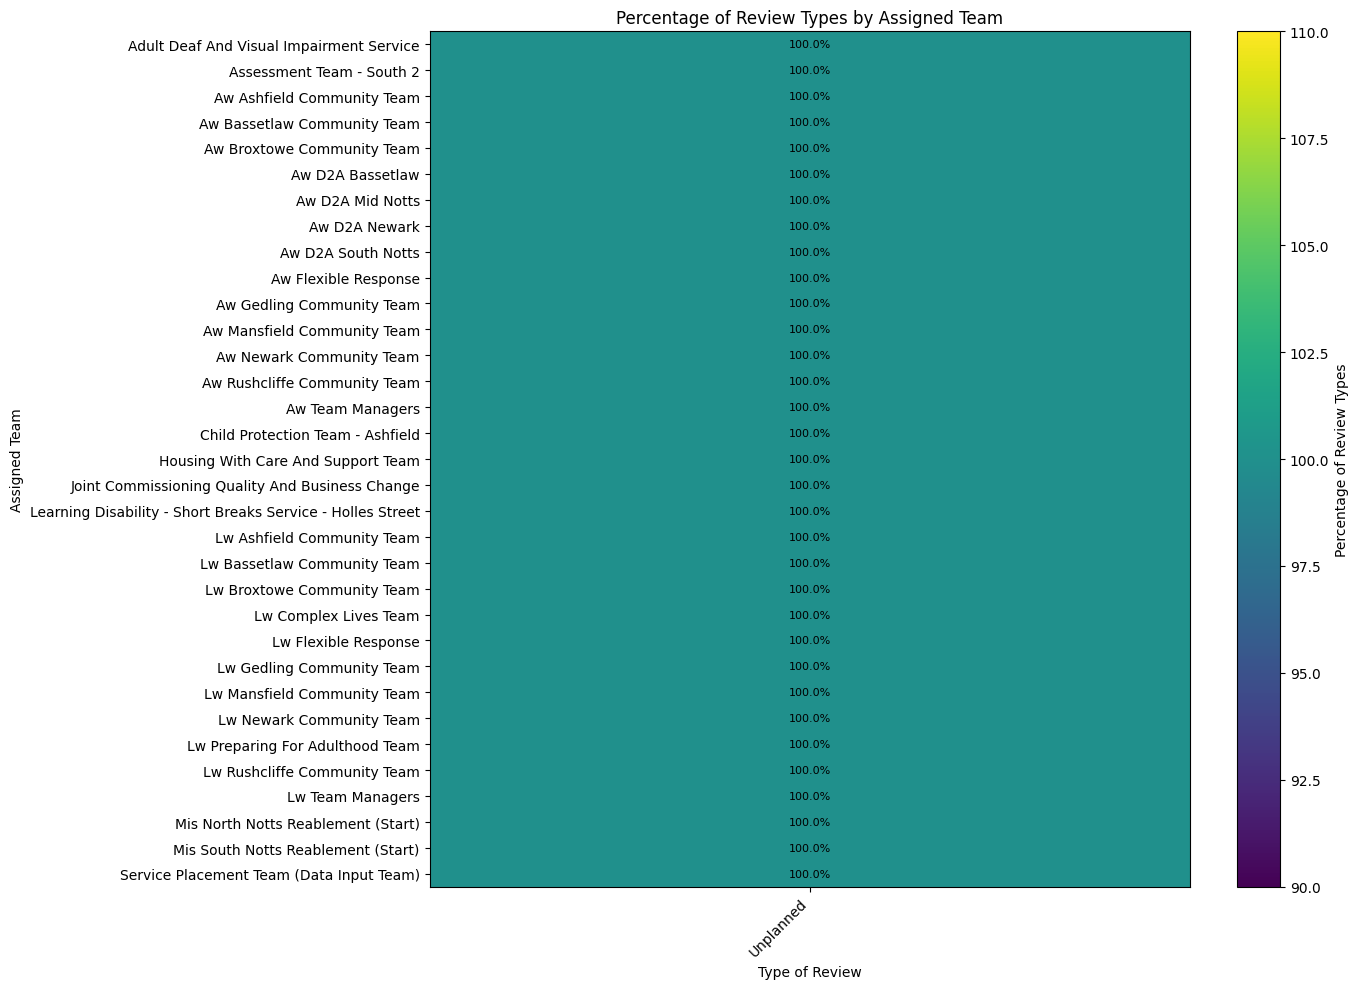

Type of Review                                      Unplanned
Assigned Team                                                
Adult Deaf And Visual Impairment Service                   51
Assessment Team - South 2                                   2
Aw Ashfield Community Team                                258
Aw Bassetlaw Community Team                               282
Aw Broxtowe Community Team                                218
Aw D2A Bassetlaw                                            8
Aw D2A Mid Notts                                           38
Aw D2A Newark                                              12
Aw D2A South Notts                                         55
Aw Flexible Response                                      114
Aw Gedling Community Team                                 189
Aw Mansfield Community Team                               240
Aw Newark Community Team                                  307
Aw Rushcliffe Community Team                              189
Aw Team Managers                                            6
Child Protection Team - Ashfield                            1
Housing With Care And Support Team                         37
Joint Commissioning Quality And Business Change             1
Learning Disability - Short Breaks Service - Ho...          1
Lw Ashfield Community Team                                124
Lw Bassetlaw Community Team                               135
Lw Broxtowe Community Team                                135
Lw Complex Lives Team                                      31
Lw Flexible Response                                       33
Lw Gedling Community Team                                 179
Lw Mansfield Community Team                                90
Lw Newark Community Team                                  159
Lw Preparing For Adulthood Team                            29
Lw Rushcliffe Community Team                              218
Lw Team Managers                                           10
Mis North Notts Reablement (Start)                          3
Mis South Notts Reablement (Start)                          1
Service Placement Team (Data Input Team)                    3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'cleaned_data' is your loaded DataFrame

# Cross-tabulation of teams and review types
team_review_crosstab = pd.crosstab(cleaned_data['Assigned Team'], cleaned_data['Type of Review'])

# Statistical Test: Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(team_review_crosstab)

# Displaying the Chi-Square Test results
print("Chi-Square Test Results")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=team_review_crosstab.index, columns=team_review_crosstab.columns))

# Interpretation
if p < 0.05:
    print("\nThe p-value is less than 0.05, indicating a statistically significant association between Assigned Teams and Review Types.")
else:
    print("\nThe p-value is greater than 0.05, indicating no statistically significant association between Assigned Teams and Review Types.")

# Adding percentage breakdown
team_review_percentage = team_review_crosstab.div(team_review_crosstab.sum(axis=1), axis=0) * 100

# Heatmap Visualization with a custom colormap
plt.figure(figsize=(14, 10))
plt.imshow(team_review_percentage, cmap='viridis', aspect='auto')  # Custom colormap
plt.colorbar(label='Percentage of Review Types')

# Adding labels and title
plt.xticks(range(len(team_review_percentage.columns)), team_review_percentage.columns, rotation=45, ha='right')
plt.yticks(range(len(team_review_percentage.index)), team_review_percentage.index)
plt.xlabel('Type of Review')
plt.ylabel('Assigned Team')
plt.title('Percentage of Review Types by Assigned Team')

# Annotating percentages on the heatmap
for i in range(len(team_review_percentage.index)):
    for j in range(len(team_review_percentage.columns)):
        value = team_review_percentage.iloc[i, j]
        if value > 0:  # Annotate only non-zero values
            plt.text(j, i, f'{value:.1f}%', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Displaying the raw cross-tabulation for reference
team_review_crosstab


Chi-Square Test Results
Chi-Square Statistic: 1493.53
p-value: 0.0000
Degrees of Freedom: 160

Expected Frequencies:
Reason for Unplanned                                Carer Related Change  \
Assigned Team                                                              
Adult Deaf And Visual Impairment Service                       11.139601   
Assessment Team - South 2                                       0.436847   
Aw Ashfield Community Team                                     56.353276   
Aw Bassetlaw Community Team                                    61.595442   
Aw Broxtowe Community Team                                     47.616334   
Aw D2A Bassetlaw                                                1.747388   
Aw D2A Mid Notts                                                8.300095   
Aw D2A Newark                                                   2.621083   
Aw D2A South Notts                                             12.013295   
Aw Flexible Response                           

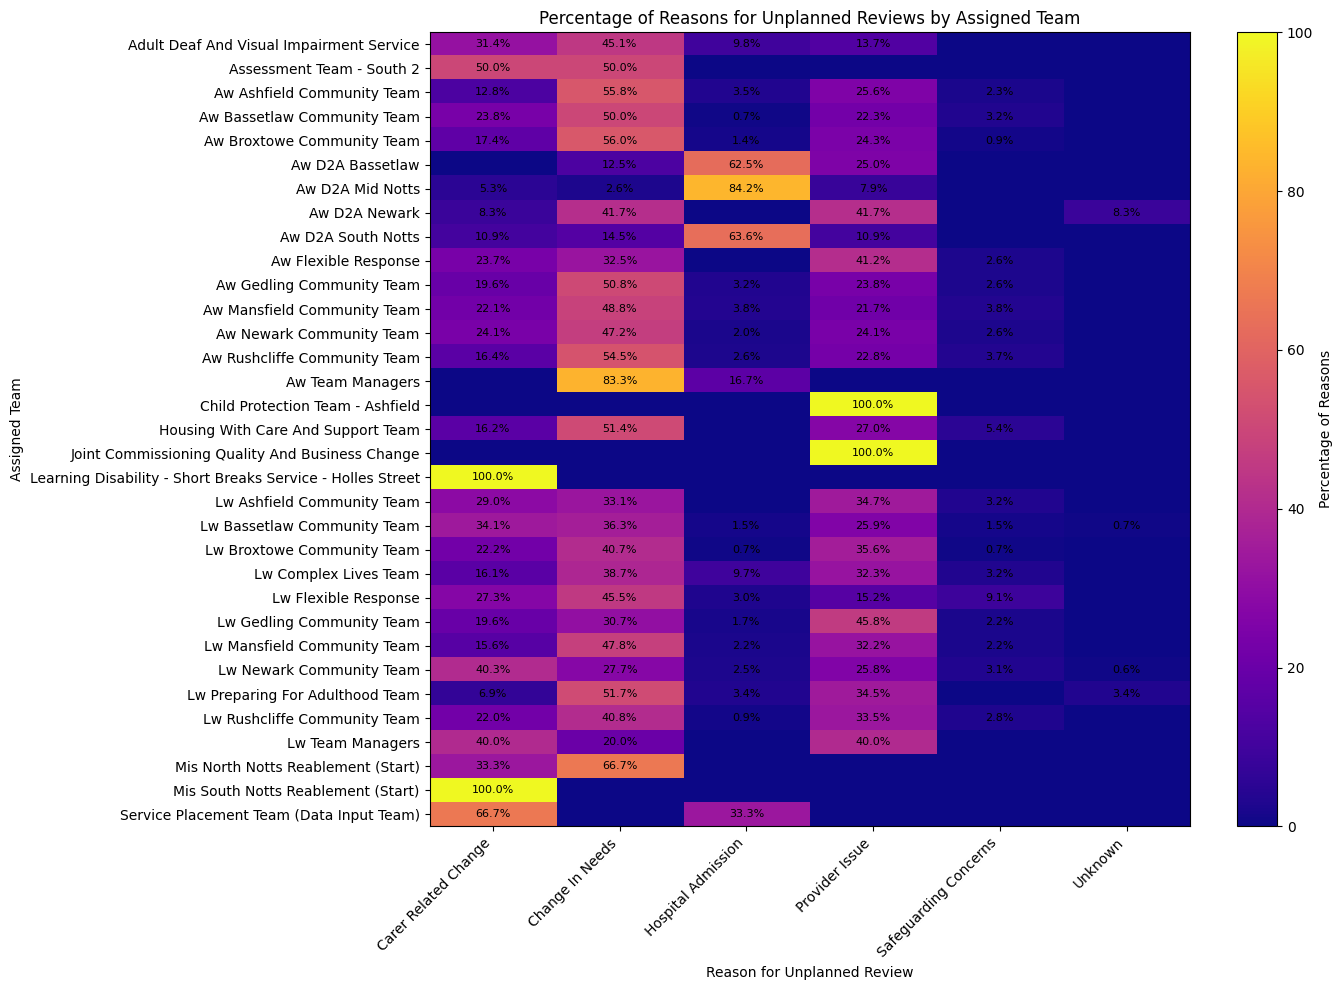

Reason for Unplanned                                Carer Related Change  \
Assigned Team                                                              
Adult Deaf And Visual Impairment Service                              16   
Assessment Team - South 2                                              1   
Aw Ashfield Community Team                                            33   
Aw Bassetlaw Community Team                                           67   
Aw Broxtowe Community Team                                            38   
Aw D2A Bassetlaw                                                       0   
Aw D2A Mid Notts                                                       2   
Aw D2A Newark                                                          1   
Aw D2A South Notts                                                     6   
Aw Flexible Response                                                  27   
Aw Gedling Community Team                                             37   
Aw Mansfield Community Team                                           53   
Aw Newark Community Team                                              74   
Aw Rushcliffe Community Team                                          31   
Aw Team Managers                                                       0   
Child Protection Team - Ashfield                                       0   
Housing With Care And Support Team                                     6   
Joint Commissioning Quality And Business Change                        0   
Learning Disability - Short Breaks Service - Ho...                     1   
Lw Ashfield Community Team                                            36   
Lw Bassetlaw Community Team                                           46   
Lw Broxtowe Community Team                                            30   
Lw Complex Lives Team                                                  5   
Lw Flexible Response                                                   9   
Lw Gedling Community Team                                             35   
Lw Mansfield Community Team                                           14   
Lw Newark Community Team                                              64   
Lw Preparing For Adulthood Team                                        2   
Lw Rushcliffe Community Team                                          48   
Lw Team Managers                                                       4   
Mis North Notts Reablement (Start)                                     1   
Mis South Notts Reablement (Start)                                     1   
Service Placement Team (Data Input Team)                               2   

Reason for Unplanned                                Change In Needs  \
Assigned Team                                                         
Adult Deaf And Visual Impairment Service                         23   
Assessment Team - South 2                                         1   
Aw Ashfield Community Team                                      144   
Aw Bassetlaw Community Team                                     141   
Aw Broxtowe Community Team                                      122   
Aw D2A Bassetlaw                                                  1   
Aw D2A Mid Notts                                                  1   
Aw D2A Newark                                                     5   
Aw D2A South Notts                                                8   
Aw Flexible Response                                             37   
Aw Gedling Community Team                                        96   
Aw Mansfield Community Team                                     117   
Aw Newark Community Team                                        145   
Aw Rushcliffe Community Team                                    103   
Aw Team Managers                                                  5   
Child Protection Team - Ashfield                                  0   
Housing With Care And Support Team                           

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'cleaned_data' is your loaded DataFrame

# Cross-tabulation of teams and reasons for unplanned reviews
team_reason_crosstab = pd.crosstab(cleaned_data['Assigned Team'], cleaned_data['Reason for Unplanned'])

# Statistical Test: Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(team_reason_crosstab)

# Displaying the Chi-Square Test results
print("Chi-Square Test Results")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=team_reason_crosstab.index, columns=team_reason_crosstab.columns))

# Interpretation
if p < 0.05:
    print("\nThe p-value is less than 0.05, indicating a statistically significant association between Assigned Teams and Reasons for Unplanned Reviews.")
else:
    print("\nThe p-value is greater than 0.05, indicating no statistically significant association between Assigned Teams and Reasons for Unplanned Reviews.")

# Adding percentage breakdown
team_reason_percentage = team_reason_crosstab.div(team_reason_crosstab.sum(axis=1), axis=0) * 100

# Heatmap Visualization with a custom colormap
plt.figure(figsize=(14, 10))
plt.imshow(team_reason_percentage, cmap='plasma', aspect='auto')  # Custom colormap
plt.colorbar(label='Percentage of Reasons')

# Adding labels and title
plt.xticks(range(len(team_reason_percentage.columns)), team_reason_percentage.columns, rotation=45, ha='right')
plt.yticks(range(len(team_reason_percentage.index)), team_reason_percentage.index)
plt.xlabel('Reason for Unplanned Review')
plt.ylabel('Assigned Team')
plt.title('Percentage of Reasons for Unplanned Reviews by Assigned Team')

# Annotating percentages on the heatmap
for i in range(len(team_reason_percentage.index)):
    for j in range(len(team_reason_percentage.columns)):
        value = team_reason_percentage.iloc[i, j]
        if value > 0:  # Annotate only non-zero values
            plt.text(j, i, f'{value:.1f}%', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Displaying the raw cross-tabulation for reference
team_reason_crosstab


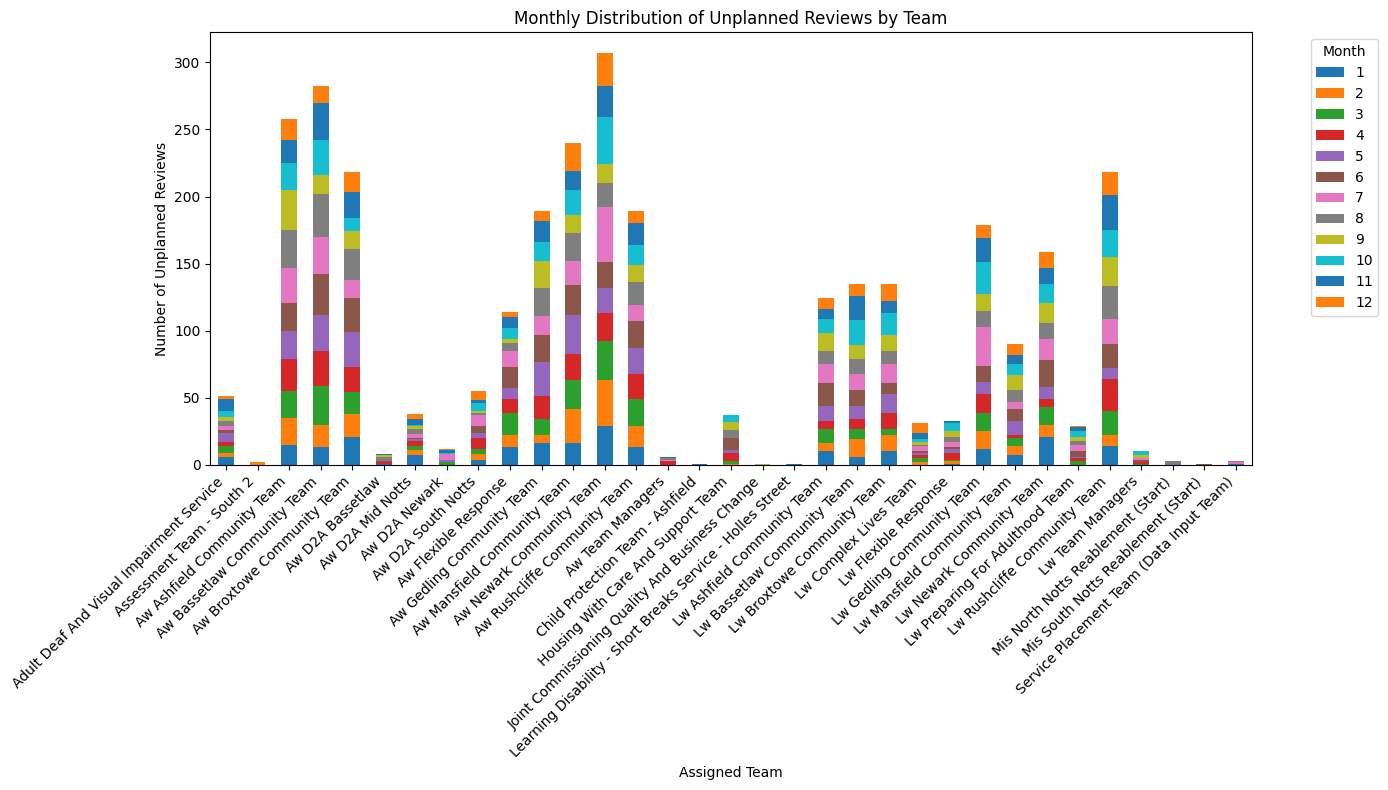

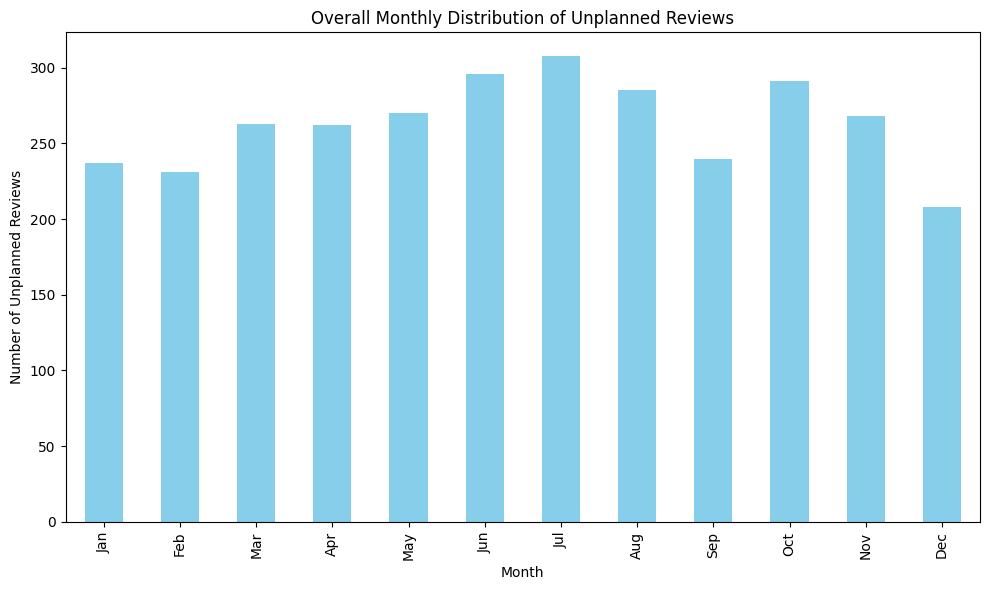

Chi-Square Test Results for Month Distribution
Chi-Square Statistic: 486.18
p-value: 0.0000
Degrees of Freedom: 352

Expected Frequencies:
Step Start Month                                           1          2   \
Assigned Team                                                              
Adult Deaf And Visual Impairment Service             3.826211   3.729345   
Assessment Team - South 2                            0.150047   0.146249   
Aw Ashfield Community Team                          19.356125  18.866097   
Aw Bassetlaw Community Team                         21.156695  20.621083   
Aw Broxtowe Community Team                          16.355176  15.941121   
Aw D2A Bassetlaw                                     0.600190   0.584995   
Aw D2A Mid Notts                                     2.850902   2.778727   
Aw D2A Newark                                        0.900285   0.877493   
Aw D2A South Notts                                   4.126306   4.021842   
Aw Flexible Response     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from statsmodels.stats.proportion import proportions_chisquare

# Assuming 'cleaned_data' is the DataFrame with data
# Extracting the month from the start date column
cleaned_data['Step Start Month'] = pd.to_datetime(cleaned_data['Step  Start  Date']).dt.month

# Grouping by team and month to count the number of unplanned reviews
team_month_distribution = cleaned_data.groupby(['Assigned Team', 'Step Start Month']).size().unstack(fill_value=0)

# Summarizing the total reviews per month across all teams
month_totals = team_month_distribution.sum(axis=0)

# Visualizing the month distribution using a stacked bar chart
team_month_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Monthly Distribution of Unplanned Reviews by Team')
plt.xlabel('Assigned Team')
plt.ylabel('Number of Unplanned Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Overall month distribution (across all teams)
month_totals.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Overall Monthly Distribution of Unplanned Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Unplanned Reviews')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Statistical Test: Chi-Square Test of Independence
# Checking if the distribution of months is uniform across all teams
chi2, p, dof, expected = stats.chi2_contingency(team_month_distribution)

print("Chi-Square Test Results for Month Distribution")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=team_month_distribution.index, columns=team_month_distribution.columns))

# Interpretation of the p-value
if p < 0.05:
    print("\nThe p-value is less than 0.05, indicating a statistically significant association between teams and the distribution of unplanned reviews by start month.")
else:
    print("\nThe p-value is greater than 0.05, indicating no statistically significant association between teams and the distribution of unplanned reviews by start month.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is the DataFrame with the dataset
# Grouping data by 'Reason for Unplanned' and 'Age Band' and counting occurrences
age_group_distribution = cleaned_data.groupby(['Reason for Unplanned', 'Age Band']).size().unstack(fill_value=0)

# Adding percentage columns
age_group_percentage = age_group_distribution.div(age_group_distribution.sum(axis=1), axis=0) * 100

# Plotting the percentage distribution as a grouped bar chart
age_group_percentage.plot(kind='bar', figsize=(14, 8), width=0.8)

# Adding labels, title, and formatting
plt.title('Reasons for Unplanned Reviews by Age Group (Percentage)', fontsize=14)
plt.xlabel('Reason for Unplanned Review', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Age Band', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Adding percentage annotations
for i, bar_group in enumerate(plt.gca().containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Annotate only non-zero values
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


KeyError: 'Age Band'

In [ ]:
# Check column names in the dataset
print(cleaned_data.columns)


Index(['Person Id', 'Current  Age  Band', 'Step Id', 'Review Type',
       'Step  Start  Date', 'Step  End  Date', 'Type of Review',
       'Reason for Unplanned', 'Assigned Team', 'Step Start Month'],
      dtype='object')


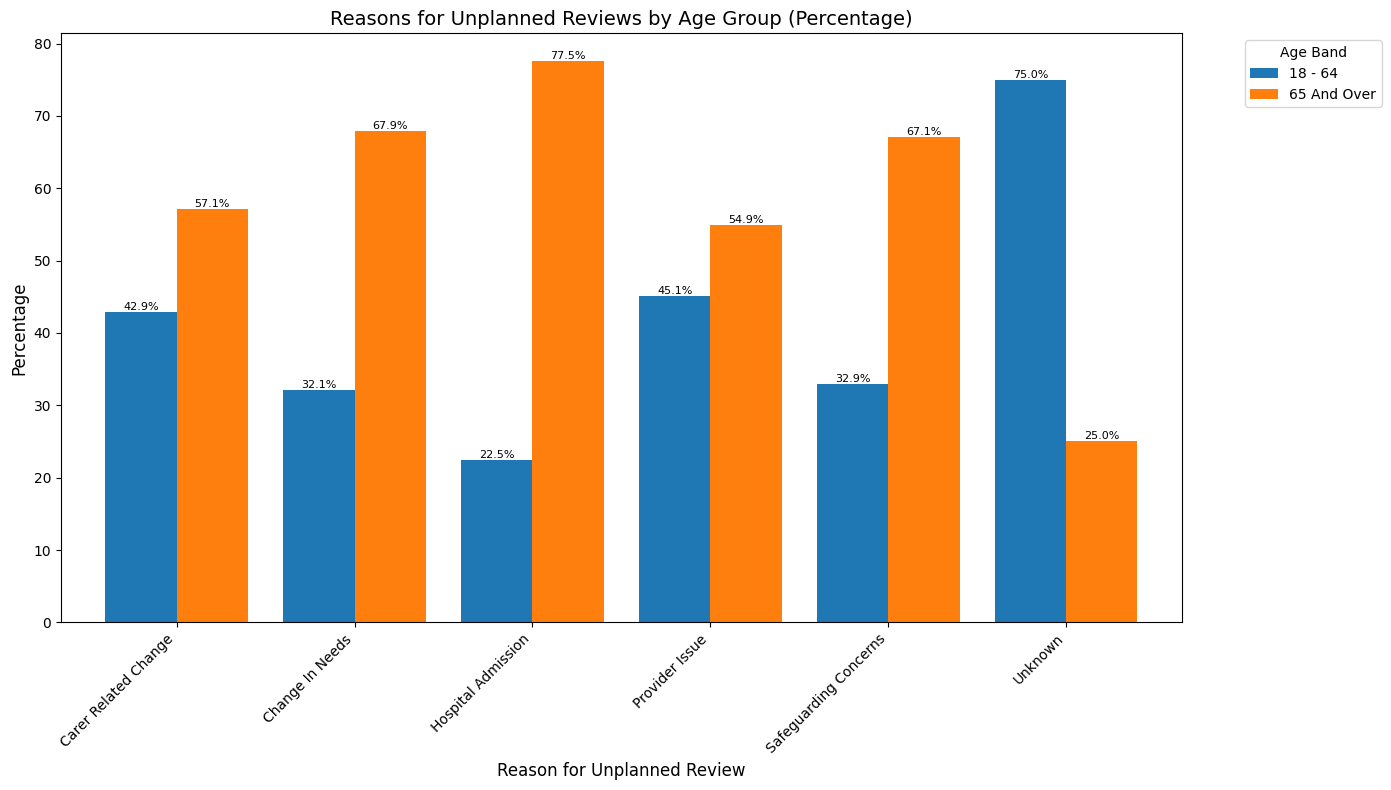

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by 'Reason for Unplanned' and 'Current  Age  Band' and counting occurrences
age_group_distribution = cleaned_data.groupby(['Reason for Unplanned', 'Current  Age  Band']).size().unstack(fill_value=0)

# Adding percentage columns
age_group_percentage = age_group_distribution.div(age_group_distribution.sum(axis=1), axis=0) * 100

# Plotting the percentage distribution as a grouped bar chart
age_group_percentage.plot(kind='bar', figsize=(14, 8), width=0.8)

# Adding labels, title, and formatting
plt.title('Reasons for Unplanned Reviews by Age Group (Percentage)', fontsize=14)
plt.xlabel('Reason for Unplanned Review', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Age Band', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Adding percentage annotations
for i, bar_group in enumerate(plt.gca().containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Annotate only non-zero values
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


Chi-Square Test Results
Chi-Square Statistic: 63.44
p-value: 0.0000
Degrees of Freedom: 5

Expected Frequencies:
Current  Age  Band        18 - 64  65 And Over
Reason for Unplanned                          
Carer Related Change   259.705603   430.294397
Change In Needs        523.175055   866.824945
Hospital Admission      51.941121    86.058879
Provider Issue         322.938272   535.061728
Safeguarding Concerns   29.734410    49.265590
Unknown                  1.505540     2.494460

The differences in the frequency of unplanned reviews between the age groups are statistically significant (p < 0.05).


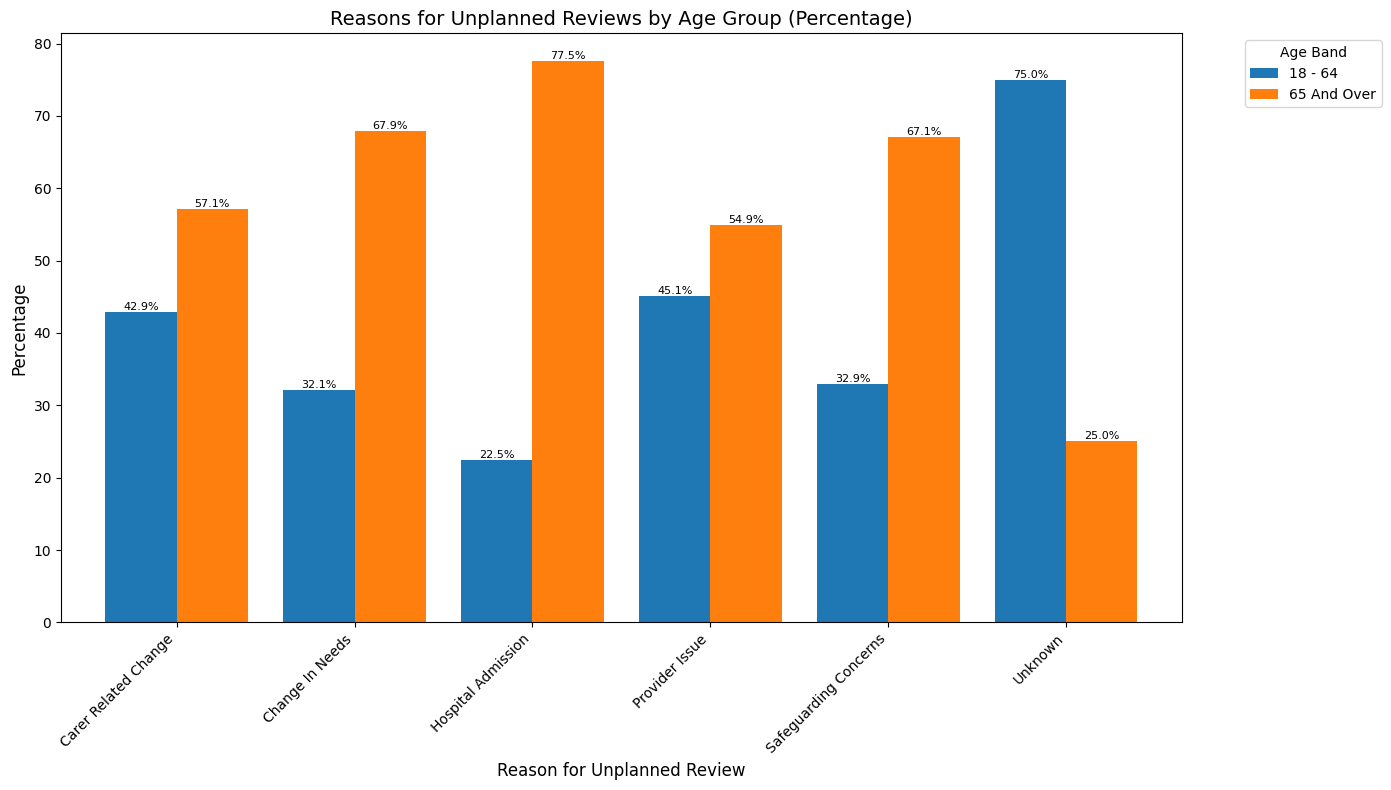

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Grouping data by 'Reason for Unplanned' and 'Current  Age  Band' and counting occurrences
age_group_distribution = cleaned_data.groupby(['Reason for Unplanned', 'Current  Age  Band']).size().unstack(fill_value=0)

# Adding percentage columns for visualization
age_group_percentage = age_group_distribution.div(age_group_distribution.sum(axis=1), axis=0) * 100

# Performing Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(age_group_distribution)

# Displaying the Chi-Square Test Results
print("Chi-Square Test Results")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=age_group_distribution.index, columns=age_group_distribution.columns))

# Interpretation
if p < 0.05:
    print("\nThe differences in the frequency of unplanned reviews between the age groups are statistically significant (p < 0.05).")
else:
    print("\nThe differences in the frequency of unplanned reviews between the age groups are not statistically significant (p >= 0.05).")

# Plotting the percentage distribution as a grouped bar chart
age_group_percentage.plot(kind='bar', figsize=(14, 8), width=0.8)

# Adding labels, title, and formatting
plt.title('Reasons for Unplanned Reviews by Age Group (Percentage)', fontsize=14)
plt.xlabel('Reason for Unplanned Review', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Age Band', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Adding percentage annotations
for i, bar_group in enumerate(plt.gca().containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Annotate only non-zero values
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


Most Common Reasons for Unplanned Reviews:
Reason for Unplanned
Change In Needs          1390
Provider Issue            858
Carer Related Change      690
Hospital Admission        138
Safeguarding Concerns      79
Unknown                     4
Name: count, dtype: int64


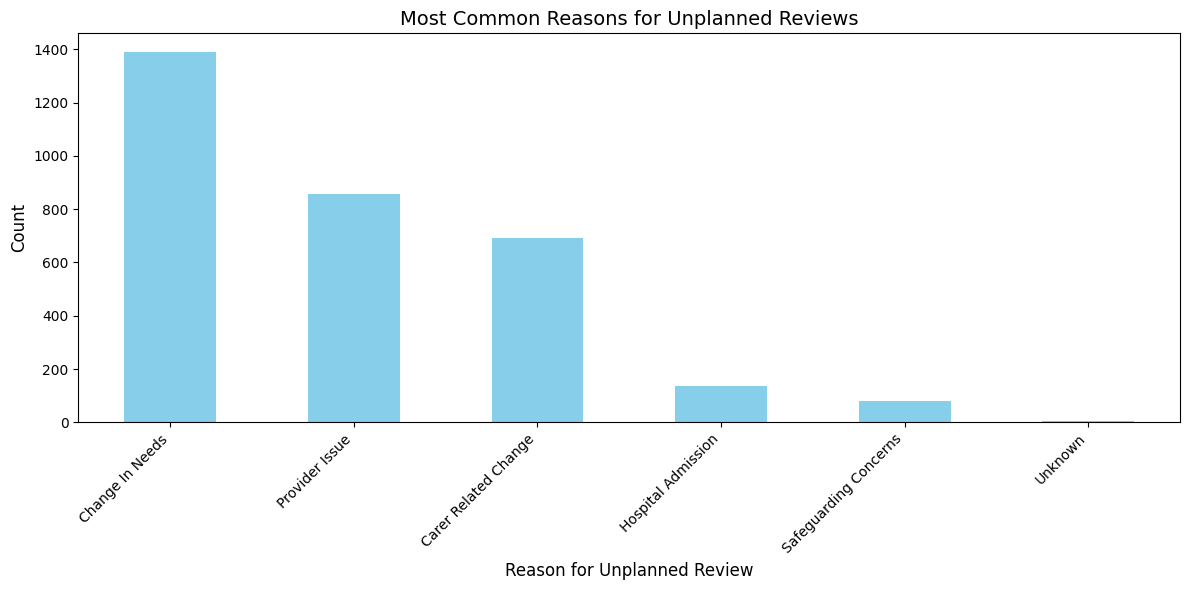

In [ ]:
# Grouping data by 'Reason for Unplanned' and counting occurrences
reason_counts = cleaned_data['Reason for Unplanned'].value_counts()

# Displaying the results
print("Most Common Reasons for Unplanned Reviews:")
print(reason_counts)

# Plotting the distribution of reasons as a bar chart
reason_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')

# Adding labels and title
plt.title('Most Common Reasons for Unplanned Reviews', fontsize=14)
plt.xlabel('Reason for Unplanned Review', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Grouping data by 'Reason for Unplanned' and counting occurrences
reason_counts = cleaned_data['Reason for Unplanned'].value_counts()

# Calculating percentages for each reason
reason_percentages = (reason_counts / reason_counts.sum()) * 100

# Plotting a pie chart
plt.figure(figsize=(10, 8))
plt.pie(reason_percentages, labels=reason_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12'})
plt.title('Distribution of Reasons for Unplanned Reviews', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


SyntaxError: unterminated string literal (detected at line 11) (<ipython-input-17-7386d1c50ac9>, line 11)

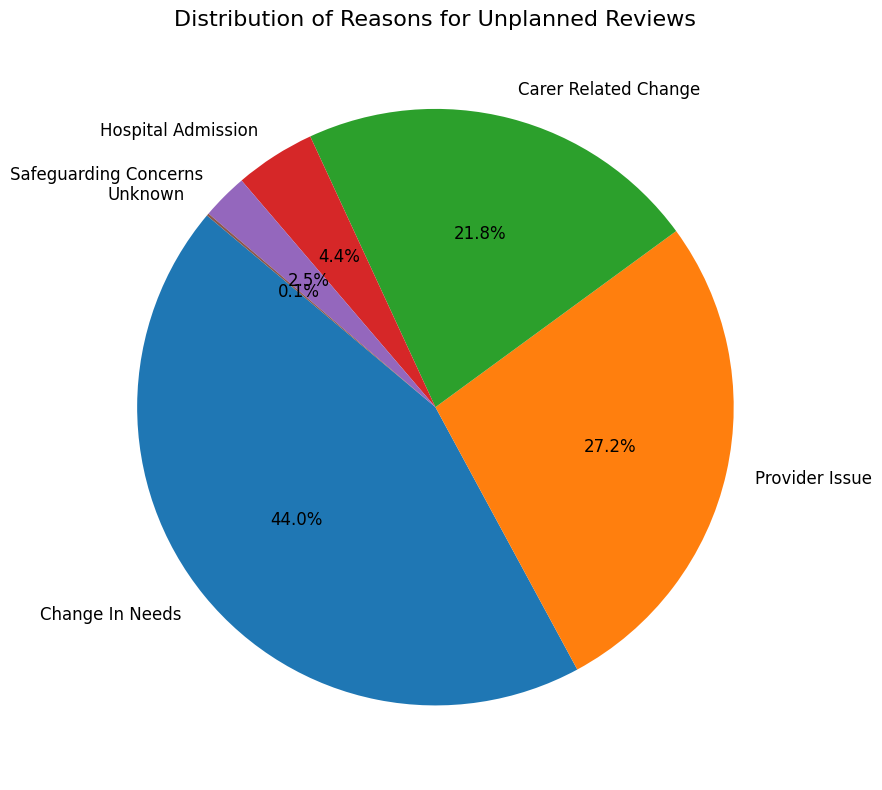

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by 'Reason for Unplanned' and counting occurrences
reason_counts = cleaned_data['Reason for Unplanned'].value_counts()

# Calculating percentages for each reason
reason_percentages = (reason_counts / reason_counts.sum()) * 100

# Plotting a pie chart
plt.figure(figsize=(10, 8))
plt.pie(reason_percentages, labels=reason_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Distribution of Reasons for Unplanned Reviews', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
The average duration between the step start and end dates is 19.68 days.
index,Reason for Unplanned,Duration (Days)
0,Carer Related Change,19.233333333333334
1,Change In Needs,18.60503597122302
2,Hospital Admission,9.492753623188406
3,Provider Issue,19.853146853146853
4,Safeguarding Concerns,39.75949367088607
5,Unknown,385.75

reason for Unplanned	Duration (Days)
0	Carer Related Change	19.233333
1	Change In Needs	18.605036
2	Hospital Admission	9.492754
3	Provider Issue	19.853147
4	Safeguarding Concerns	39.759494
5	Unknown	385.750000

1. Shapiro-Wilk Test for Normality
•	The Shapiro-Wilk test evaluates whether the data for each month is normally distributed.
•	Output: Each month has a test statistic and a p-value. For example:
o	Month 1: (0.482, 8.91e-26)
	Test statistic: 0.482
	p-value: 8.91e-26 (very close to zero)
Interpretation:
•	Null Hypothesis (H₀): The data is normally distributed.
•	If the p-value is less than 0.05, we reject H₀ and conclude the data is not normally distributed.
•	In this case, for all months, the p-values are extremely small (close to 0), indicating that the data is not normally distributed for any month.
________________________________________
2. Levene's Test for Homogeneity of Variance
•	Levene’s test evaluates whether the variances of the durations across months are equal.
•	Output:
o	Test statistic: 0.629
o	p-value: 0.804
Interpretation:
•	Null Hypothesis (H₀): The variances are equal across months.
•	If the p-value is greater than 0.05, we fail to reject H₀ and conclude that the variances are equal.
•	In this case, the p-value (0.804) is much greater than 0.05, so we conclude that the variances across months are equal.
________________________________________
3. ANOVA Test
•	ANOVA evaluates whether the means of the durations are significantly different across months.
•	Output:
o	Test statistic: 0.729
o	p-value: 0.712
Interpretation:
•	Null Hypothesis (H₀): The mean durations are the same across all months.
•	If the p-value is less than 0.05, we reject H₀ and conclude that at least one month has a significantly different mean duration.
•	In this case, the p-value (0.712) is much greater than 0.05, so we fail to reject the null hypothesis and conclude that there is no significant difference in the average durations across months.
________________________________________
4. Kruskal-Wallis Test
•	The Kruskal-Wallis test is a non-parametric test that evaluates whether the medians of durations differ across months.
•	Output:
o	Test statistic: 22.807
o	p-value: 0.019
Interpretation:
•	Null Hypothesis (H₀): The medians are the same across all months.
•	If the p-value is less than 0.05, we reject H₀ and conclude that at least one month has a significantly different median duration.
•	In this case, the p-value (0.019) is less than 0.05, so we reject the null hypothesis and conclude that there are significant differences in the median durations across months.
________________________________________
Summary of Results
1.	Shapiro-Wilk Test:
o	The data is not normally distributed for any month.
2.	Levene’s Test:
o	The variances are equal across months.
3.	ANOVA:
o	There is no significant difference in mean durations across months.
4.	Kruskal-Wallis Test:
o	There is a significant difference in median durations across months.
________________________________________
What This Means for Publication
1.	Since the data is not normally distributed, ANOVA may not be appropriate. Instead, the Kruskal-Wallis test is more reliable.
2.	Report the Kruskal-Wallis results:
o	"A Kruskal-Wallis H-test showed significant differences in median durations across months, χ²(11) = 22.81, p = 0.019."
3.	Post-hoc testing (e.g., Dunn's test) should be conducted to identify which months differ significantly


SyntaxError: invalid character '•' (U+2022) (<ipython-input-19-e43347e2f039>, line 19)

In [ ]:
import pandas as pd
from scikit_posthocs import posthoc_dunn
import matplotlib.pyplot as plt

# Example data
data = {
    'Reason for Unplanned': ['Carer Related Change', 'Change In Needs', 'Hospital Admission',
                             'Provider Issue', 'Safeguarding Concerns', 'Unknown'],
    'Duration (Days)': [19.233333, 18.605036, 9.492754, 19.853147, 39.759494, 385.75]
}
df = pd.DataFrame(data)

# Dunn's Post-hoc Test
posthoc_results = posthoc_dunn(df, val_col='Duration (Days)', group_col='Reason for Unplanned', p_adjust='bonferroni')

# Di


ModuleNotFoundError: No module named 'scikit_posthocs'

In [ ]:
!pip install scikit-posthocs


Dunn's Post-Hoc Test Results (p-values):
                       Carer Related Change  Change In Needs  \
Carer Related Change                    1.0              1.0   
Change In Needs                         1.0              1.0   
Hospital Admission                      1.0              1.0   
Provider Issue                          1.0              1.0   
Safeguarding Concerns                   1.0              1.0   
Unknown                                 1.0              1.0   

                       Hospital Admission  Provider Issue  \
Carer Related Change             1.000000             1.0   
Change In Needs                  1.000000             1.0   
Hospital Admission               1.000000             1.0   
Provider Issue                   1.000000             1.0   
Safeguarding Concerns            1.000000             1.0   
Unknown                          0.881726             1.0   

                       Safeguarding Concerns   Unknown  
Carer Related Change     

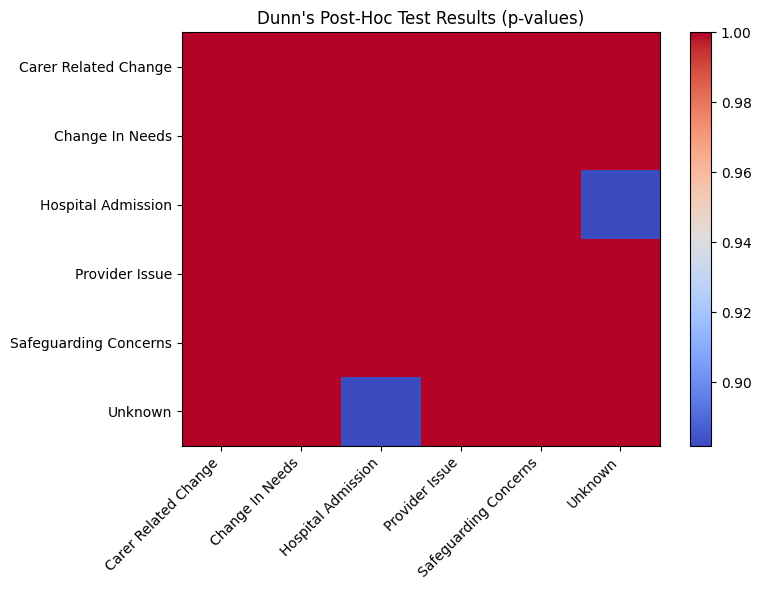

In [ ]:
import pandas as pd
from scikit_posthocs import posthoc_dunn
import matplotlib.pyplot as plt

# Example data
data = {
    'Reason for Unplanned': ['Carer Related Change', 'Change In Needs', 'Hospital Admission',
                             'Provider Issue', 'Safeguarding Concerns', 'Unknown'],
    'Duration (Days)': [19.233333, 18.605036, 9.492754, 19.853147, 39.759494, 385.75]
}
df = pd.DataFrame(data)

# Dunn's Post-hoc Test
posthoc_results = posthoc_dunn(df, val_col='Duration (Days)', group_col='Reason for Unplanned', p_adjust='bonferroni')

# Display Post-Hoc Results
print("Dunn's Post-Hoc Test Results (p-values):")
print(posthoc_results)

# Visualize the results
plt.figure(figsize=(8, 6))
ax = plt.axes()
cbar = plt.colorbar(ax.imshow(posthoc_results, cmap="coolwarm", aspect="auto"), ax=ax)
plt.xticks(range(len(posthoc_results.columns)), posthoc_results.columns, rotation=45, ha='right')
plt.yticks(range(len(posthoc_results.index)), posthoc_results.index)
plt.title("Dunn's Post-Hoc Test Results (p-values)")
plt.tight_layout()
plt.show()


Correlation Analysis Results
Pearson Correlation Coefficient: 0.07, p-value: 0.8370
Spearman Correlation Coefficient: 0.17, p-value: 0.5868


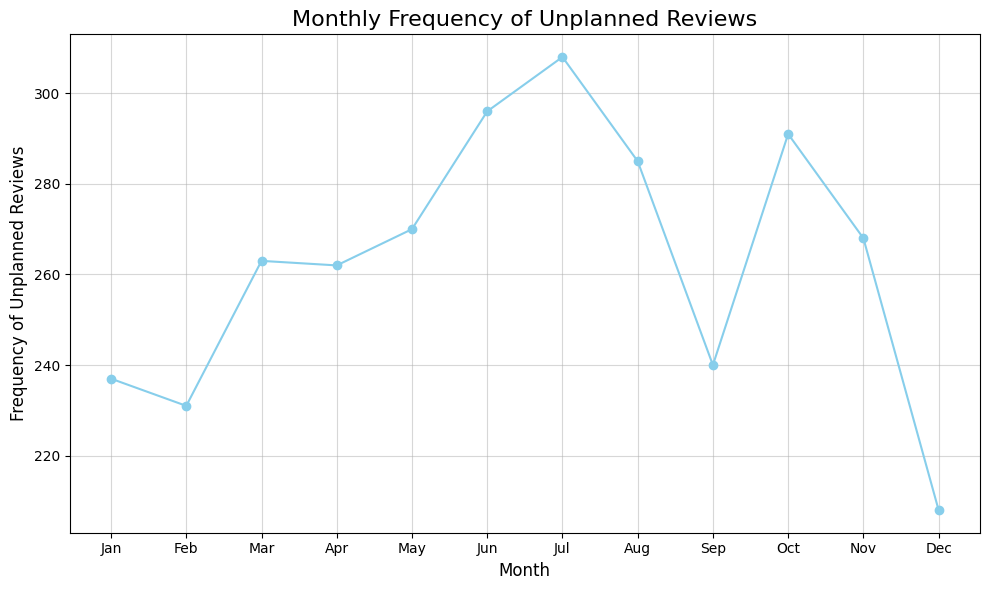

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Extracting the month and aggregating frequencies
monthly_reviews = cleaned_data.groupby('Step Start Month').size()

# Creating a DataFrame for analysis
month_freq_df = pd.DataFrame({'Month': monthly_reviews.index, 'Frequency': monthly_reviews.values})

# Pearson Correlation
pearson_corr, pearson_p = pearsonr(month_freq_df['Month'], month_freq_df['Frequency'])

# Spearman Correlation
spearman_corr, spearman_p = spearmanr(month_freq_df['Month'], month_freq_df['Frequency'])

# Print correlation results
print("Correlation Analysis Results")
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")

# Visualization: Line Chart for Monthly Distribution
plt.figure(figsize=(10, 6))
plt.plot(month_freq_df['Month'], month_freq_df['Frequency'], marker='o', linestyle='-', color='skyblue')
plt.title('Monthly Frequency of Unplanned Reviews', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Frequency of Unplanned Reviews', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Sample Data Preparation
# Assuming cleaned_data contains demographic attributes and team information
data = cleaned_data[['Current  Age  Band', 'Assigned Team']]

# Step 1: Preprocessing
# Encode categorical variables and scale numeric variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Current  Age  Band']),  # Replace with numeric attributes
        ('cat', OneHotEncoder(), ['Assigned Team'])  # Encode categorical attributes
    ])

# Step 2: K-Means Clustering
kmeans_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('kmeans', KMeans(n_clusters=3, random_state=42))])
kmeans_pipeline.fit(data)

# Add cluster labels to the dataset
data['Cluster'] = kmeans_pipeline.named_steps['kmeans'].labels_

# Step 3: Visualize Clusters
# Count individuals in each cluster
cluster_counts = data['Cluster'].value_counts()

# Plot cluster distribution
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Individuals by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 4: Analyze Clusters
# Group by cluster to summarize demographic attributes
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


ValueError: could not convert string to float: '18 - 64'

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Select relevant columns for clustering
data = cleaned_data[['Current  Age  Band', 'Assigned Team']]

# Preprocessing: Encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Current  Age  Band', 'Assigned Team'])  # Encode both categorical variables
    ])

# K-Means Clustering Pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Scale the encoded data
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # 3 clusters
])

# Fit the pipeline to the data
kmeans_pipeline.fit(data)

# Add cluster labels to the dataset
data['Cluster'] = kmeans_pipeline.named_steps['kmeans'].labels_

# Count individuals in


<ipython-input-25-c209c739aaa3>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans_pipeline.named_steps['kmeans'].labels_


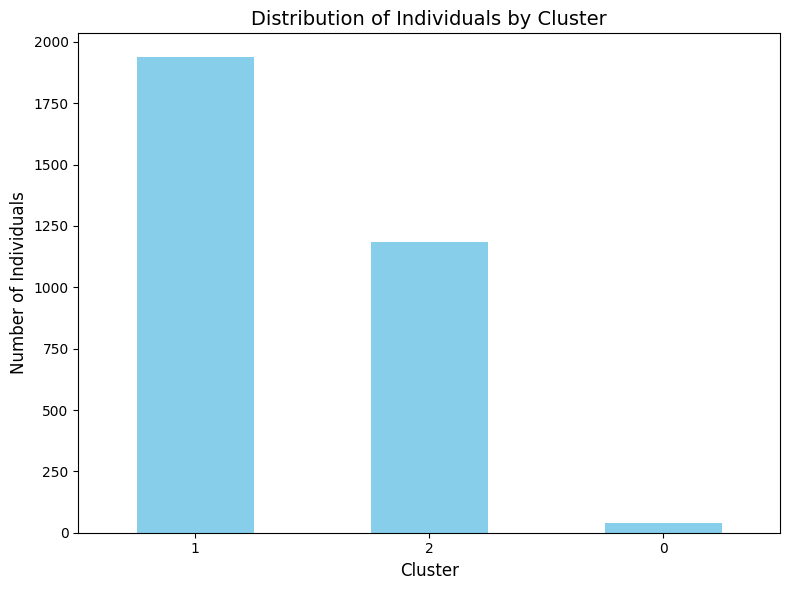

Cluster Analysis Summary:
Cluster
0      38
1    1938
2    1183
dtype: int64


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Select relevant columns for clustering
data = cleaned_data[['Current  Age  Band', 'Assigned Team']]

# Preprocessing: Encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Current  Age  Band', 'Assigned Team'])  # Encode both categorical variables
    ])

# K-Means Clustering Pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Scale the encoded data
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # 3 clusters
])

# Fit the pipeline to the data
kmeans_pipeline.fit(data)

# Create a copy of the dataset to avoid the SettingWithCopyWarning
data = data.copy()

# Add cluster labels to the dataset
data['Cluster'] = kmeans_pipeline.named_steps['kmeans'].labels_

# Count individuals in each cluster
cluster_counts = data['Cluster'].value_counts()

# Plot cluster distribution
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Individuals by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Analyze clusters
print("Cluster Analysis Summary:")
print(data.groupby('Cluster').size())


In [ ]:
Next Steps
Deeper Analysis of Clusters:

Analyze demographic distributions and team assignments for each cluster.
Identify high-need or specialized groups within each cluster.
Actionable Insights:

Design interventions specific to the needs of each cluster (e.g., targeted programs for high-need age bands or teams).
Visualization:

Create additional visualizations (e.g., stacked bar charts or demographic summaries) to communicate the differences between clusters.
Let me know if you'd like assistance with further cluster-level analysis!

SyntaxError: unterminated string literal (detected at line 12) (<ipython-input-27-dfd7ecb86893>, line 12)

Cluster 0 Analysis:
Age Band Distribution:
Current  Age  Band
65 And Over    84.210526
18 - 64        15.789474
Name: proportion, dtype: float64
Team Distribution:
Assigned Team
Aw D2A Mid Notts    100.0
Name: proportion, dtype: float64
Total Count: 38

Cluster 1 Analysis:
Age Band Distribution:
Current  Age  Band
65 And Over    100.0
Name: proportion, dtype: float64
Team Distribution:
Assigned Team
Aw Newark Community Team                           15.428277
Aw Bassetlaw Community Team                        14.499484
Aw Ashfield Community Team                         13.209494
Aw Mansfield Community Team                        12.177503
Aw Broxtowe Community Team                         11.197110
Aw Rushcliffe Community Team                        9.700722
Aw Gedling Community Team                           9.597523
Aw Flexible Response                                5.882353
Aw D2A South Notts                                  2.786378
Adult Deaf And Visual Impairment Service        

<ipython-input-28-2404b087c877>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_analysis = data.groupby('Cluster').apply(


<Figure size 1000x600 with 0 Axes>

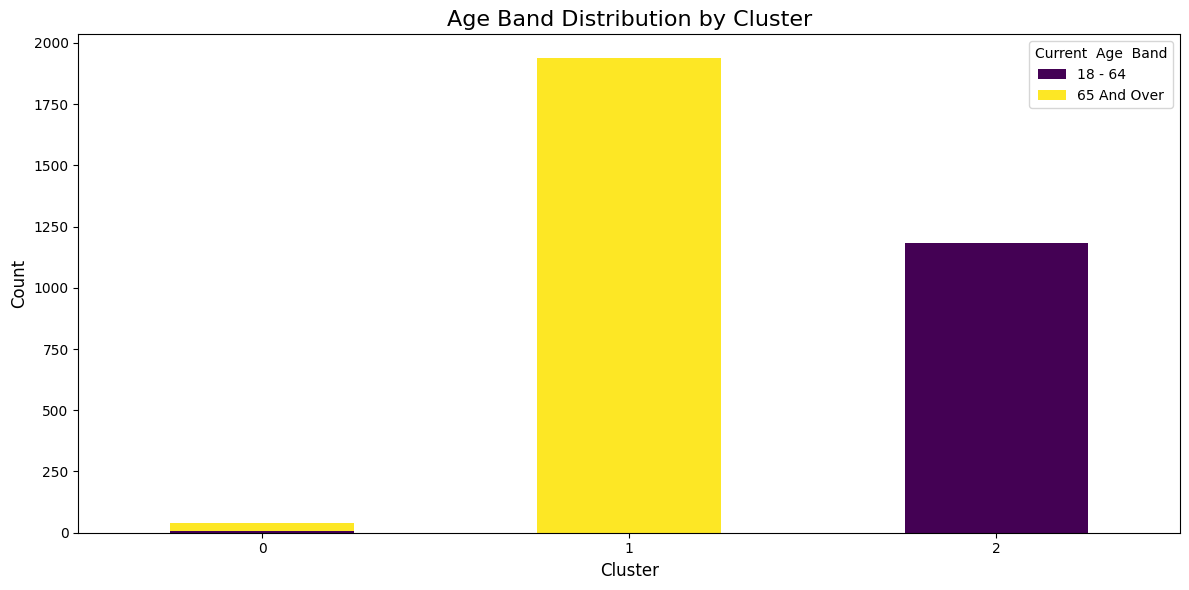

<Figure size 1200x600 with 0 Axes>

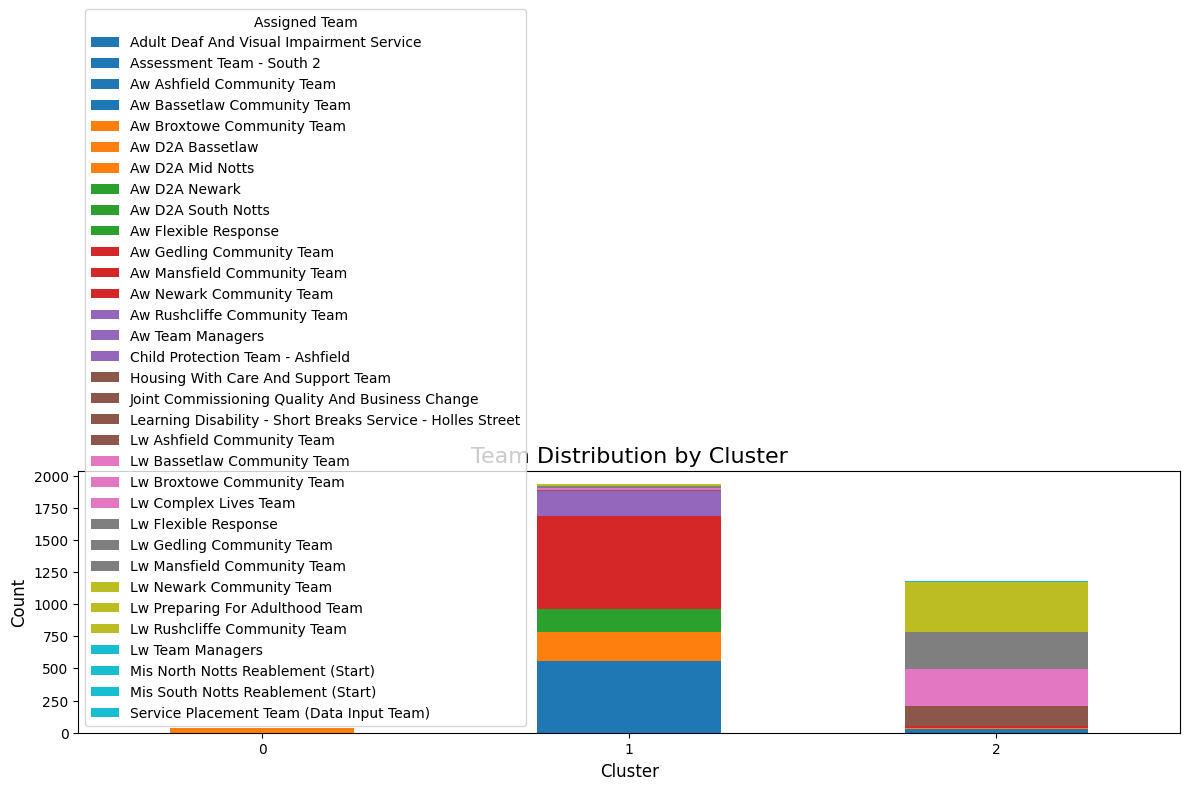

In [ ]:
# Group data by clusters to analyze demographic and team distributions
cluster_analysis = data.groupby('Cluster').apply(
    lambda x: {
        'Age Band Distribution': x['Current  Age  Band'].value_counts(normalize=True) * 100,
        'Team Distribution': x['Assigned Team'].value_counts(normalize=True) * 100,
        'Count': len(x)
    }
)

# Display analysis results
for cluster_id, details in cluster_analysis.items():
    print(f"Cluster {cluster_id} Analysis:")
    print(f"Age Band Distribution:\n{details['Age Band Distribution']}")
    print(f"Team Distribution:\n{details['Team Distribution']}")
    print(f"Total Count: {details['Count']}\n")

# Visualize Age Band Distribution by Cluster
plt.figure(figsize=(10, 6))
age_band_counts = data.groupby(['Cluster', 'Current  Age  Band']).size().unstack()
age_band_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Age Band Distribution by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualize Team Distribution by Cluster
plt.figure(figsize=(12, 6))
team_counts = data.groupby(['Cluster', 'Assigned Team']).size().unstack()
team_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Team Distribution by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Group data by clusters to analyze demographic and team distributions
cluster_analysis = data.groupby('Cluster').apply(
    lambda x: {
        'Age Band Distribution': x['Current  Age  Band'].value_counts(normalize=True) * 100,
        'Team Distribution': x['Assigned Team'].value_counts(normalize=True) * 100,
        'Count': len(x)
    }
)

# Display analysis results
for cluster_id, details in cluster_analysis.items():
    print(f"Cluster {cluster_id} Analysis:")
    print(f"Age Band Distribution:\n{details['Age Band Distribution']}")
    print(f"Team Distribution:\n{details['Team Distribution']}")
    print(f"Total Count: {details['Count']}\n")


Cluster 0 Analysis:
Age Band Distribution:
Current  Age  Band
65 And Over    84.210526
18 - 64        15.789474
Name: proportion, dtype: float64
Team Distribution:
Assigned Team
Aw D2A Mid Notts    100.0
Name: proportion, dtype: float64
Total Count: 38

Cluster 1 Analysis:
Age Band Distribution:
Current  Age  Band
65 And Over    100.0
Name: proportion, dtype: float64
Team Distribution:
Assigned Team
Aw Newark Community Team                           15.428277
Aw Bassetlaw Community Team                        14.499484
Aw Ashfield Community Team                         13.209494
Aw Mansfield Community Team                        12.177503
Aw Broxtowe Community Team                         11.197110
Aw Rushcliffe Community Team                        9.700722
Aw Gedling Community Team                           9.597523
Aw Flexible Response                                5.882353
Aw D2A South Notts                                  2.786378
Adult Deaf And Visual Impairment Service        

<ipython-input-29-69809181a279>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_analysis = data.groupby('Cluster').apply(


In [ ]:
Cluster 0 Analysis:
Age Band Distribution:
Current  Age  Band
65 And Over    84.210526
18 - 64        15.789474
Name: proportion, dtype: float64
Team Distribution:
Assigned Team
Aw D2A Mid Notts    100.0
Name: proportion, dtype: float64
Total Count: 38

Cluster 1 Analysis:
Age Band Distribution:
Current  Age  Band
65 And Over    100.0
Name: proportion, dtype: float64
Team Distribution:
Assigned Team
Aw Newark Community Team                           15.428277
Aw Bassetlaw Community Team                        14.499484
Aw Ashfield Community Team                         13.209494
Aw Mansfield Community Team                        12.177503
Aw Broxtowe Community Team                         11.197110
Aw Rushcliffe Community Team                        9.700722
Aw Gedling Community Team                           9.597523
Aw Flexible Response                                5.882353
Aw D2A South Notts                                  2.786378
Adult Deaf And Visual Impairment Service            1.289990
Aw D2A Newark                                       0.567595
Lw Rushcliffe Community Team                        0.515996
Lw Broxtowe Community Team                          0.464396
Lw Gedling Community Team                           0.464396
Lw Ashfield Community Team                          0.412797
Aw D2A Bassetlaw                                    0.361197
Lw Newark Community Team                            0.309598
Lw Bassetlaw Community Team                         0.257998
Lw Mansfield Community Team                         0.206398
Aw Team Managers                                    0.206398
Mis North Notts Reablement (Start)                  0.154799
Lw Flexible Response                                0.103199
Housing With Care And Support Team                  0.051600
Joint Commissioning Quality And Business Change     0.051600
Mis South Notts Reablement (Start)                  0.051600
Service Placement Team (Data Input Team)            0.051600
Name: proportion, dtype: float64
Total Count: 1938

Cluster 2 Analysis:
Age Band Distribution:
Current  Age  Band
18 - 64    100.0
Name: proportion, dtype: float64
Team Distribution:
Assigned Team
Lw Rushcliffe Community Team                                  17.582418
Lw Gedling Community Team                                     14.370245
Lw Newark Community Team                                      12.933221
Lw Bassetlaw Community Team                                   10.989011
Lw Broxtowe Community Team                                    10.650888
Lw Ashfield Community Team                                     9.805579
Lw Mansfield Community Team                                    7.269653
Housing With Care And Support Team                             3.043111
Lw Flexible Response                                           2.620456
Lw Complex Lives Team                                          2.620456
Lw Preparing For Adulthood Team                                2.451395
Adult Deaf And Visual Impairment Service                       2.197802
Lw Team Managers                                               0.845309
Aw Newark Community Team                                       0.676247
Aw Mansfield Community Team                                    0.338123
Aw Gedling Community Team                                      0.253593
Aw Team Managers                                               0.169062
Assessment Team - South 2                                      0.169062
Service Placement Team (Data Input Team)                       0.169062
Aw Ashfield Community Team                                     0.169062
Aw Broxtowe Community Team                                     0.084531
Aw Rushcliffe Community Team                                   0.084531
Aw D2A Bassetlaw                                               0.084531
Aw D2A South Notts                                             0.084531
Aw D2A Newark                                                  0.084531
Aw Bassetlaw Community Team                                    0.084531
Learning Disability - Short Breaks Service - Holles Street     0.084531
Child Protection Team - Ashfield                               0.084531
Name: proportion, dtype: float64
Total Count: 1183

<ipython-input-29-69809181a279>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_analysis = data.groupby('Cluster').apply(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Cluster and Assigned Team to calculate counts
team_distribution = data.groupby(['Cluster', 'Assigned Team']).size().unstack(fill_value=0)

# Plot a stacked bar chart
team_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add labels and title
plt.title('Cluster-Specific Team Distributions', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Assigned Team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


NameError: name 'data' is not defined

In [ ]:
# Example of loading and preprocessing the data
import pandas as pd

# Replace 'your_file_path.xlsx' with the actual path to your cleaned data file
data = pd.read_excel('your_file_path.xlsx')

# Ensure the required columns are present
data = data[['Cluster', 'Assigned Team', 'Current  Age  Band']]  # Keep only necessary columns


FileNotFoundError: [Errno 2] No such file or directory: 'your_file_path.xlsx'

In [ ]:
# Corrected path for the uploaded file
data = pd.read_excel('/mnt/data/cleaned_social_care_data.xlsx')

# Ensure the required columns are present
data = data[['Cluster', 'Assigned Team', 'Current  Age  Band']]  # Keep only necessary columns


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/cleaned_social_care_data.xlsx'

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
# Replace 'uploaded_filename.xlsx' with the actual name of the file you upload
data = pd.read_excel(list(uploaded.keys())[0])

# Display the first few rows of the data to confirm it loaded correctly
print(data.head())


Saving cleaned_social_care_data.xlsx to cleaned_social_care_data.xlsx
   Person Id Current  Age  Band    Step Id      Review Type Step  Start  Date  \
0    1000475            18 - 64  117938297  Community Based        2024-01-17   
1    1000475            18 - 64  117513870  Community Based        2023-06-07   
2    1000475            18 - 64  116851029  Community Based        2022-12-20   
3    1000556            18 - 64  117893089  Community Based        2023-08-25   
4    1001514        65 And Over  117000755  Community Based        2023-11-27   

  Step  End  Date Type of Review   Reason for Unplanned  \
0      2024-01-18      Unplanned        Change In Needs   
1      2023-06-07      Unplanned   Carer Related Change   
2      2023-05-25      Unplanned        Change In Needs   
3      2023-08-25      Unplanned         Provider Issue   
4      2023-12-11      Unplanned  Safeguarding Concerns   

                        Assigned Team  
0          Lw Ashfield Community Team  
1       

In [ ]:
# Example of loading and preprocessing the data
import pandas as pd

# Replace 'your_file_path.xlsx' with the actual path to your cleaned data file
data = pd.read_excel('your_file_path.xlsx')

# Ensure the required columns are present
data = data[['Cluster', 'Assigned Team', 'Current  Age  Band']]  # Keep only necessary columns


FileNotFoundError: [Errno 2] No such file or directory: 'your_file_path.xlsx'

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Check the uploaded file name
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

# Load the uploaded file into a DataFrame
data = pd.read_excel(filename)

# Display the first few rows of the data to confirm it loaded correctly
print(data.head())


Saving cleaned_social_care_data.xlsx to cleaned_social_care_data (1).xlsx
Uploaded file: cleaned_social_care_data (1).xlsx
   Person Id Current  Age  Band    Step Id      Review Type Step  Start  Date  \
0    1000475            18 - 64  117938297  Community Based        2024-01-17   
1    1000475            18 - 64  117513870  Community Based        2023-06-07   
2    1000475            18 - 64  116851029  Community Based        2022-12-20   
3    1000556            18 - 64  117893089  Community Based        2023-08-25   
4    1001514        65 And Over  117000755  Community Based        2023-11-27   

  Step  End  Date Type of Review   Reason for Unplanned  \
0      2024-01-18      Unplanned        Change In Needs   
1      2023-06-07      Unplanned   Carer Related Change   
2      2023-05-25      Unplanned        Change In Needs   
3      2023-08-25      Unplanned         Provider Issue   
4      2023-12-11      Unplanned  Safeguarding Concerns   

                        Assigned Te

In [ ]:
# Group data by Cluster and Assigned Team to calculate counts
team_distribution = data.groupby(['Cluster', 'Assigned Team']).size().unstack(fill_value=0)


KeyError: 'Cluster'

In [ ]:
# Run clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select relevant columns for clustering
data = cleaned_data[['Current  Age  Band', 'Assigned Team']]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Current  Age  Band', 'Assigned Team'])  # Encode categorical variables
    ])

# Clustering pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit pipeline and add Cluster column
kmeans_pipeline.fit(data)
data['Cluster'] = kmeans_pipeline.named_steps['kmeans'].labels_


NameError: name 'cleaned_data' is not defined

In [ ]:
import pandas as pd

# Replace 'file_path.xlsx' with the actual path to your file
cleaned_data = pd.read_excel('/mnt/data/cleaned_social_care_data.xlsx')

# Display the first few rows to confirm successful loading
print(cleaned_data.head())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/cleaned_social_care_data.xlsx'

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the uploaded file into a DataFrame
filename = list(uploaded.keys())[0]  # Get the uploaded file name
cleaned_data = pd.read_excel(filename)

# Display the first few rows to confirm successful loading
print(cleaned_data.head())


Saving cleaned_social_care_data.xlsx to cleaned_social_care_data (2).xlsx
   Person Id Current  Age  Band    Step Id      Review Type Step  Start  Date  \
0    1000475            18 - 64  117938297  Community Based        2024-01-17   
1    1000475            18 - 64  117513870  Community Based        2023-06-07   
2    1000475            18 - 64  116851029  Community Based        2022-12-20   
3    1000556            18 - 64  117893089  Community Based        2023-08-25   
4    1001514        65 And Over  117000755  Community Based        2023-11-27   

  Step  End  Date Type of Review   Reason for Unplanned  \
0      2024-01-18      Unplanned        Change In Needs   
1      2023-06-07      Unplanned   Carer Related Change   
2      2023-05-25      Unplanned        Change In Needs   
3      2023-08-25      Unplanned         Provider Issue   
4      2023-12-11      Unplanned  Safeguarding Concerns   

                        Assigned Team  
0          Lw Ashfield Community Team  
1   

In [ ]:
print(cleaned_data.columns)


Index(['Person Id', 'Current  Age  Band', 'Step Id', 'Review Type',
       'Step  Start  Date', 'Step  End  Date', 'Type of Review',
       'Reason for Unplanned', 'Assigned Team'],
      dtype='object')


In [ ]:
# Select relevant columns for clustering
data = cleaned_data[['Current  Age  Band', 'Assigned Team']]

# Proceed with clustering and visualization as outlined earlier.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select relevant columns
data = cleaned_data[['Current  Age  Band', 'Assigned Team']]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Current  Age  Band', 'Assigned Team'])  # Encode categorical variables
    ])

# Clustering pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit pipeline and add Cluster column
kmeans_pipeline.fit(data)
data['Cluster'] = kmeans_pipeline.named_steps['kmeans'].labels_

# Confirm clusters
print(data['Cluster'].value_counts())


Cluster
1    1938
2    1183
0      38
Name: count, dtype: int64


<ipython-input-13-8849e532ae06>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans_pipeline.named_steps['kmeans'].labels_


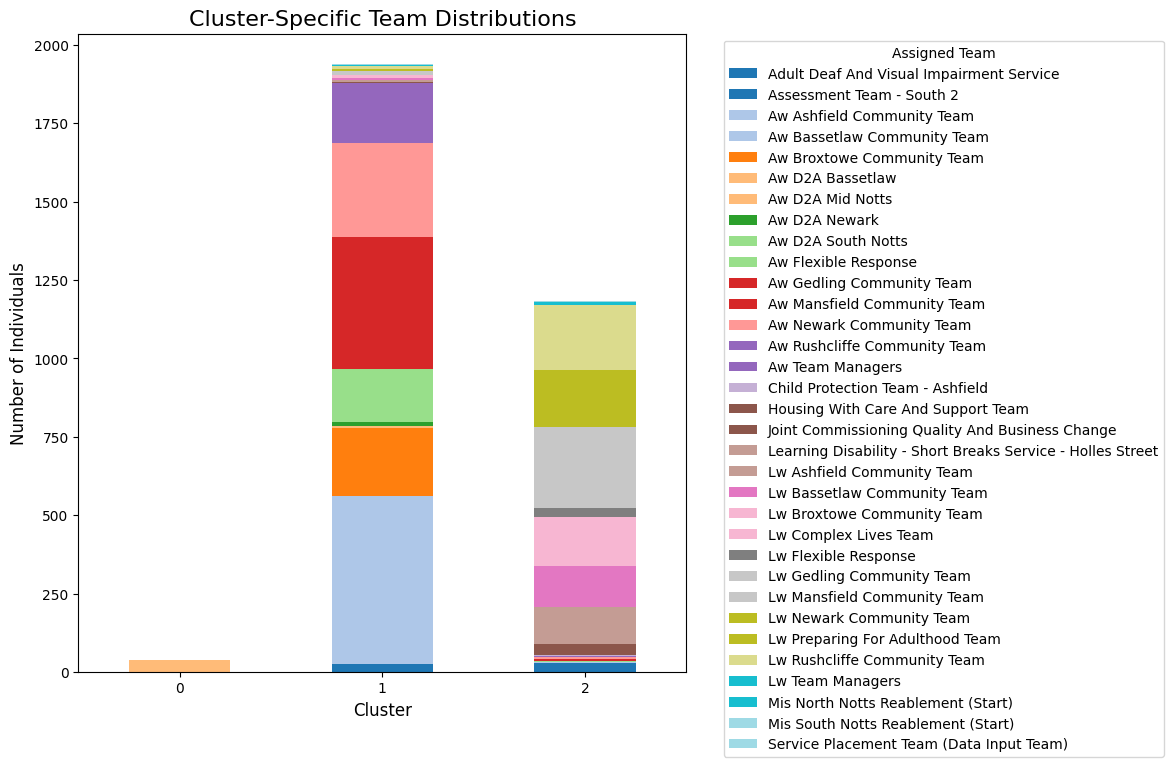

In [ ]:
# Group data by Cluster and Assigned Team
team_distribution = data.groupby(['Cluster', 'Assigned Team']).size().unstack(fill_value=0)

# Plot the stacked bar chart
team_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add labels and titles
plt.title('Cluster-Specific Team Distributions', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Assigned Team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


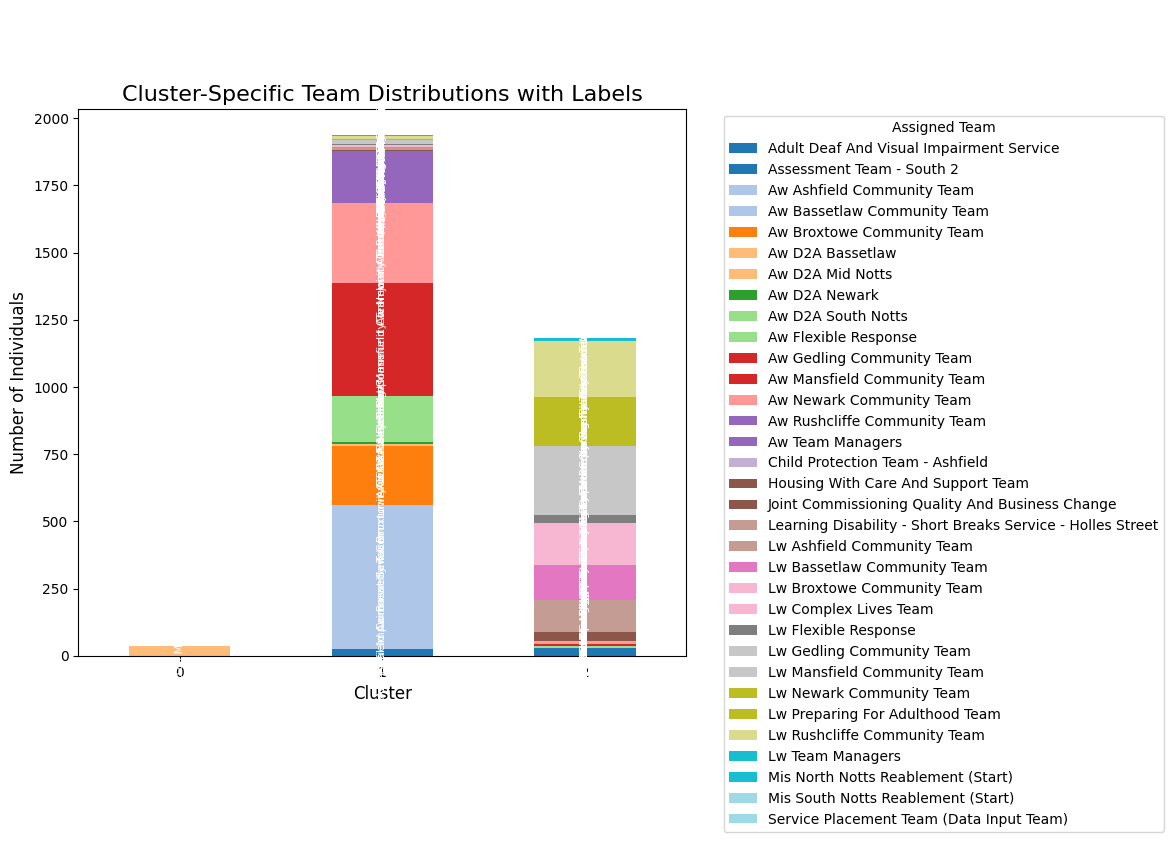

In [ ]:
import matplotlib.pyplot as plt

# Group data by Cluster and Assigned Team to calculate counts
team_distribution = data.groupby(['Cluster', 'Assigned Team']).size().unstack(fill_value=0)

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = team_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20', ax=ax)

# Add labels to each segment
for cluster_idx, cluster in enumerate(team_distribution.index):
    bottom = 0  # Tracks the cumulative height for stacking
    for team_idx, team in enumerate(team_distribution.columns):
        count = team_distribution.loc[cluster, team]
        if count > 0:
            # Get the bar's center x-coordinate
            x = cluster_idx
            y = bottom + count / 2  # Place label in the middle of the bar segment
            # Add the label to the bar segment
            ax.text(
                x, y, str(team),  # Show team name
                ha='center', va='center', fontsize=8, rotation=90, color='white'
            )
            bottom += count  # Update the bottom for the next segment

# Customize the chart
plt.title('Cluster-Specific Team Distributions with Labels', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Assigned Team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


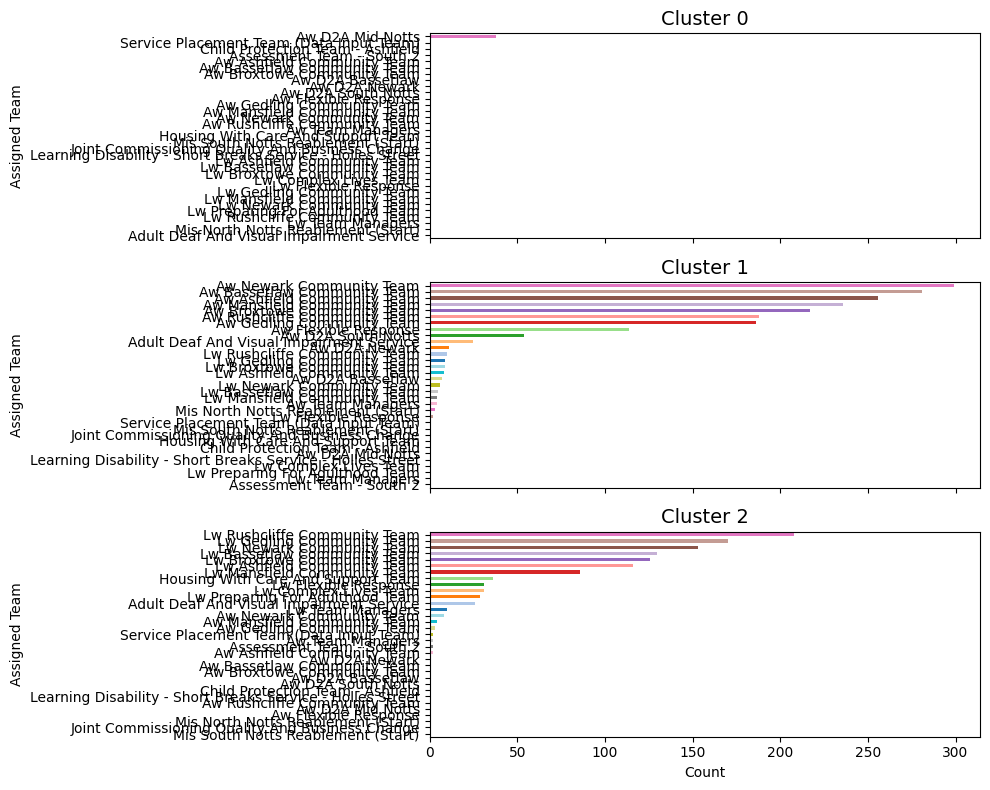

In [ ]:
# Group data by Cluster and Assigned Team
team_distribution = data.groupby(['Cluster', 'Assigned Team']).size().unstack(fill_value=0)

# Plot a separate horizontal bar chart for each cluster
fig, axes = plt.subplots(nrows=team_distribution.shape[0], figsize=(10, 8), sharex=True)

for i, (cluster, row) in enumerate(team_distribution.iterrows()):
    row.sort_values().plot(kind='barh', ax=axes[i], color=plt.cm.tab20.colors)
    axes[i].set_title(f'Cluster {cluster}', fontsize=14)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Assigned Team')

plt.tight_layout()
plt.show()


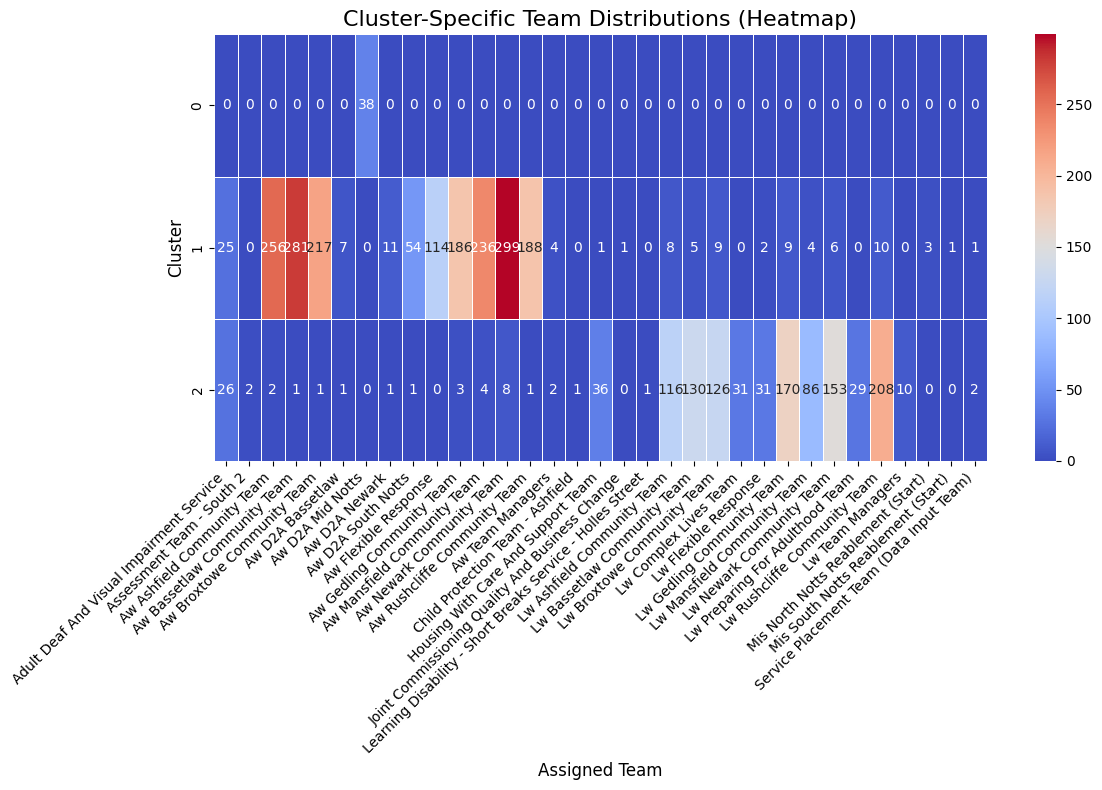

In [ ]:
import seaborn as sns

# Create a heatmap for team distribution
plt.figure(figsize=(12, 8))
sns.heatmap(team_distribution, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=0.5)

# Add labels and title
plt.title('Cluster-Specific Team Distributions (Heatmap)', fontsize=16)
plt.xlabel('Assigned Team', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [ ]:
import squarify

# Flatten data for the treemap
cluster_summaries = []
for cluster, row in team_distribution.iterrows():
    for team, value in row.items():
        cluster_summaries.append({'Cluster': cluster, 'Team': team, 'Value': value})

treemap_data = pd.DataFrame(cluster_summaries)

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=treemap_data['Value'],
    label=treemap_data['Cluster'] + ' - ' + treemap_data['Team'],
    alpha=0.8
)
plt.title('Cluster-Specific Team Distributions (Treemap)', fontsize=16)
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'squarify'

In [ ]:
import squarify
import matplotlib.pyplot as plt
import pandas as pd

# Flatten data for the treemap
cluster_summaries = []
for cluster, row in team_distribution.iterrows():
    for team, value in row.items():
        cluster_summaries.append({'Cluster': cluster, 'Team': team, 'Value': value})

treemap_data = pd.DataFrame(cluster_summaries)

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=treemap_data['Value'],
    label=treemap_data['Cluster'] + ' - ' + treemap_data['Team'],
    alpha=0.8
)
plt.title('Cluster-Specific Team Distributions (Treemap)', fontsize=16)
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'squarify'

In [ ]:
!pip install squarify


ZeroDivisionError: float division by zero

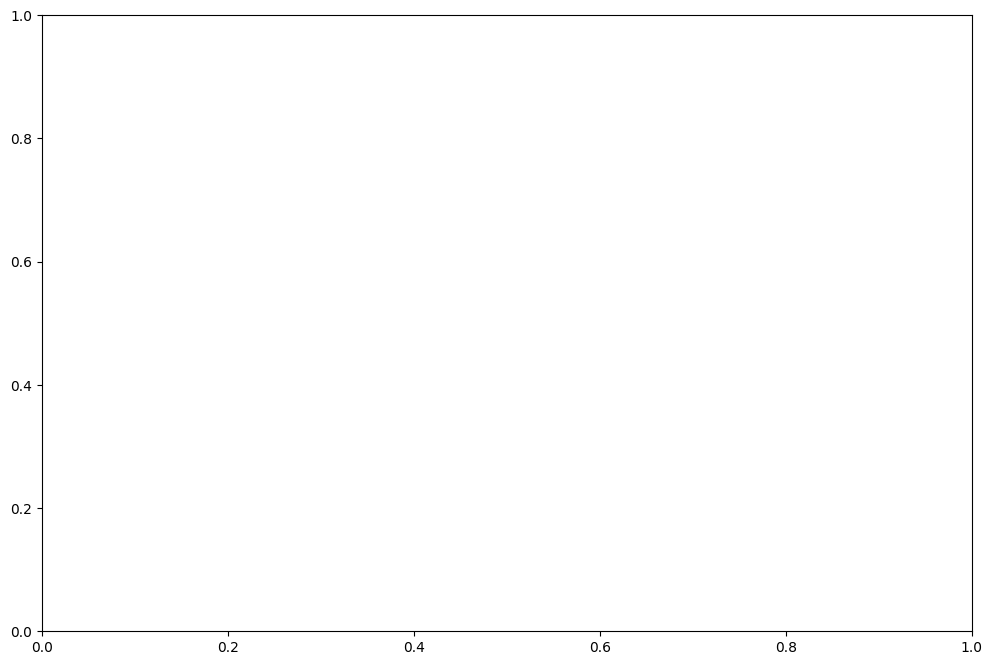

In [ ]:
import squarify
import matplotlib.pyplot as plt
import pandas as pd

# Example: Flatten the team distribution data for the treemap
cluster_summaries = []
for cluster, row in team_distribution.iterrows():
    for team, value in row.items():
        cluster_summaries.append({'Cluster': cluster, 'Team': team, 'Value': value})

treemap_data = pd.DataFrame(cluster_summaries)

# Combine Cluster and Team for labels
treemap_data['Label'] = treemap_data['Cluster'].astype(str) + ' - ' + treemap_data['Team']

# Plot the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=treemap_data['Value'],
    label=treemap_data['Label'],
    alpha=0.8
)
plt.title('Cluster-Specific Team Distributions (Treemap)', fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
# Filter out rows with zero or missing values in the 'Value' column
treemap_data = treemap_data[treemap_data['Value'] > 0]


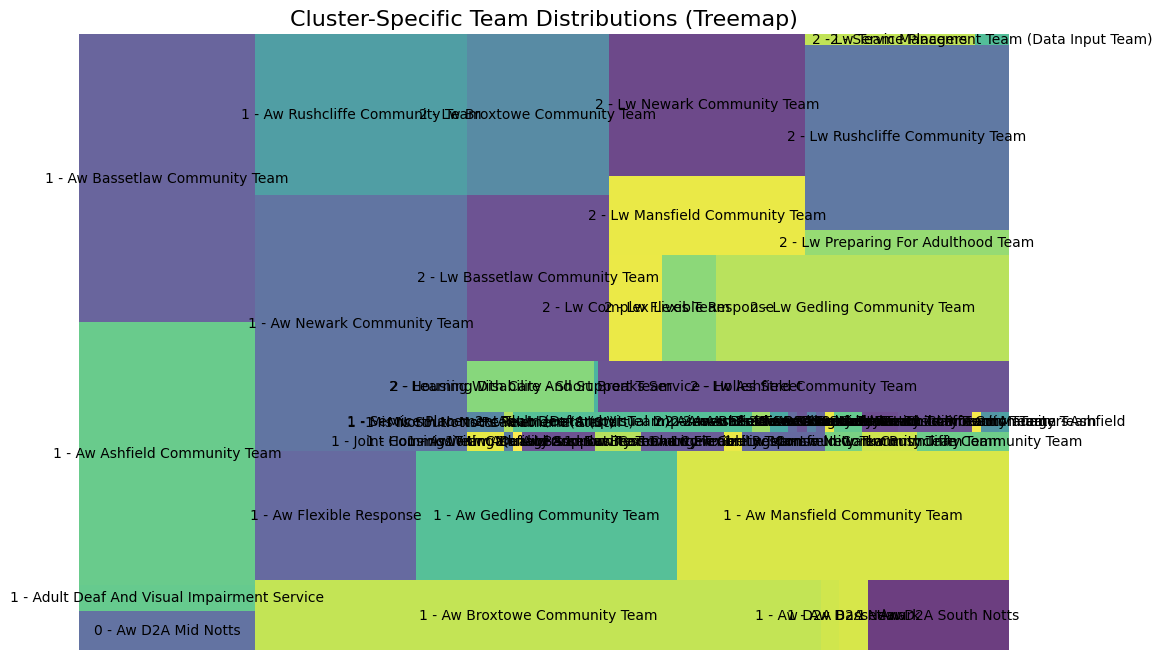

In [ ]:
import squarify
import matplotlib.pyplot as plt

# Plot the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=treemap_data['Value'],
    label=treemap_data['Label'],
    alpha=0.8
)
plt.title('Cluster-Specific Team Distributions (Treemap)', fontsize=16)
plt.axis('off')
plt.show()


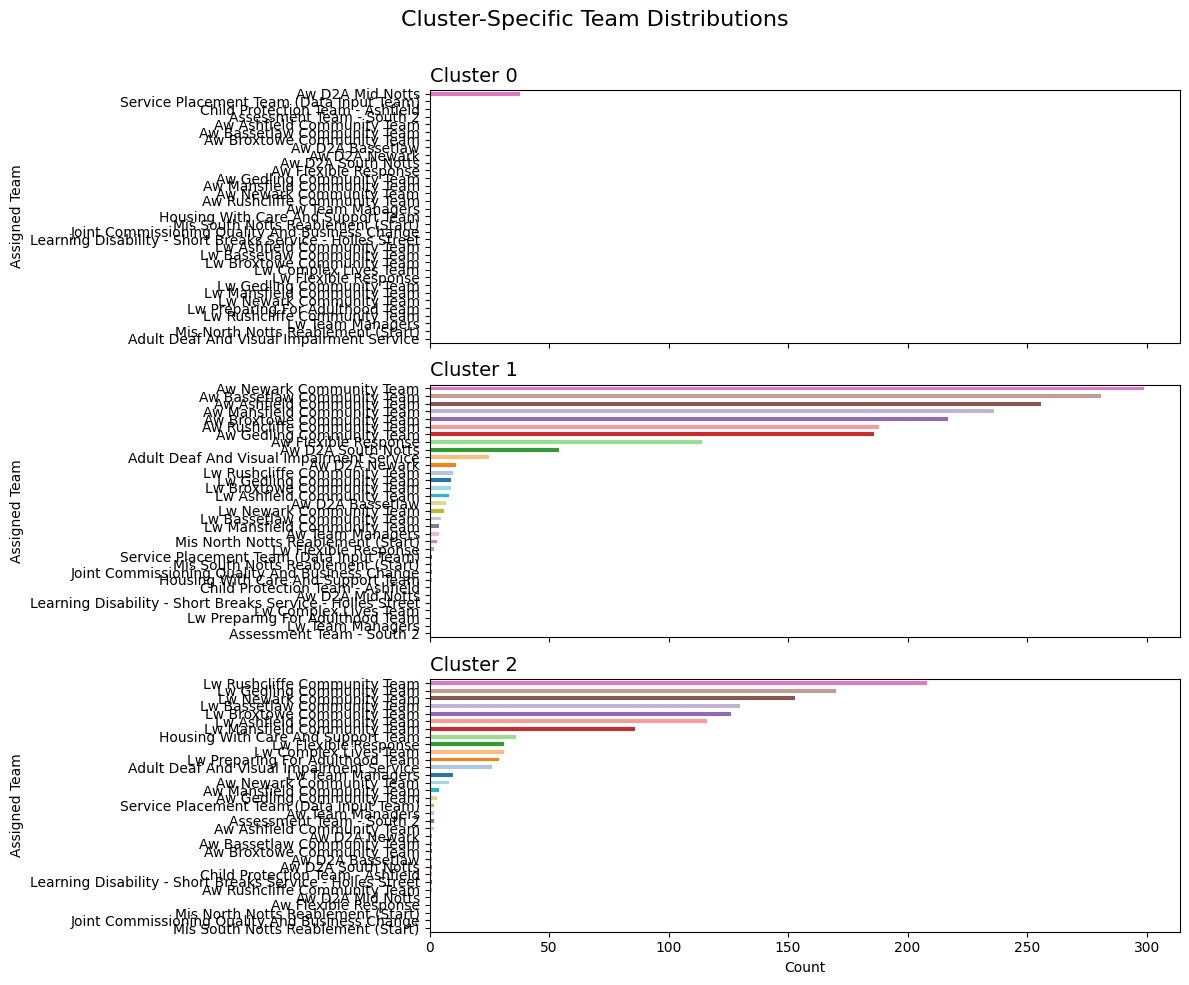

In [ ]:
# Group data by Cluster and Assigned Team to calculate counts
team_distribution = data.groupby(['Cluster', 'Assigned Team']).size().unstack(fill_value=0)

# Plot a separate horizontal bar chart for each cluster
fig, axes = plt.subplots(nrows=team_distribution.shape[0], figsize=(12, 10), sharex=True)

for i, (cluster, row) in enumerate(team_distribution.iterrows()):
    # Sort values for better readability
    sorted_row = row.sort_values(ascending=True)

    # Plot horizontal bar chart
    sorted_row.plot(kind='barh', ax=axes[i], color=plt.cm.tab20.colors)

    # Customize each subplot
    axes[i].set_title(f'Cluster {cluster}', fontsize=14, loc='left')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Assigned Team')
    axes[i].tick_params(axis='y', labelsize=10)  # Adjust font size for y-axis labels

# Add overall title and adjust layout
fig.suptitle('Cluster-Specific Team Distributions', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top spacing for title
plt.show()


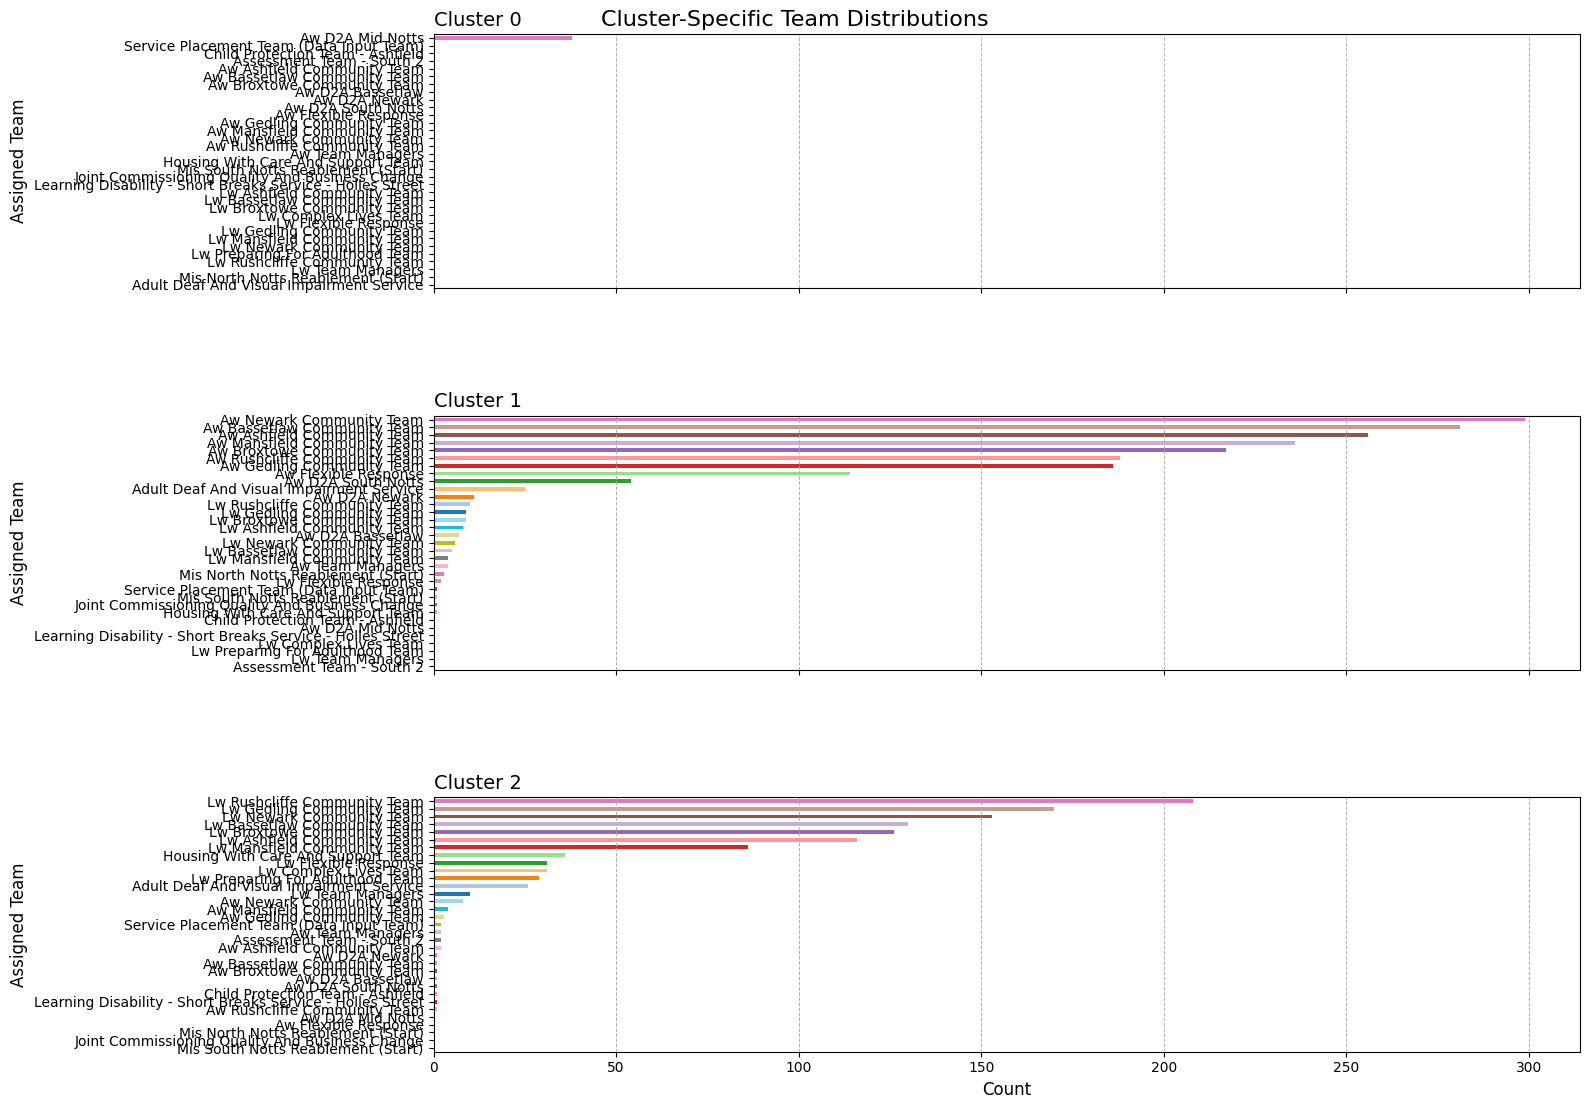

In [ ]:
# Group data by Cluster and Assigned Team to calculate counts
team_distribution = data.groupby(['Cluster', 'Assigned Team']).size().unstack(fill_value=0)

# Plot a horizontal bar chart for each cluster
fig, axes = plt.subplots(nrows=team_distribution.shape[0], figsize=(16, 12), sharex=True)

for i, (cluster, row) in enumerate(team_distribution.iterrows()):
    # Sort values for better readability
    sorted_row = row.sort_values(ascending=True)

    # Plot horizontal bar chart
    sorted_row.plot(kind='barh', ax=axes[i], color=plt.cm.tab20.colors)

    # Customize each subplot
    axes[i].set_title(f'Cluster {cluster}', fontsize=14, loc='left')
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].set_ylabel('Assigned Team', fontsize=12)
    axes[i].tick_params(axis='y', labelsize=10)  # Adjust font size for y-axis labels

    # Set horizontal gridlines for better readability
    axes[i].grid(axis='x', linestyle='--', linewidth=0.7)

# Adjust layout and overall title
fig.suptitle('Cluster-Specific Team Distributions', fontsize=16, y=0.92)
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.5)  # Adjust spacing between plots
plt.show()


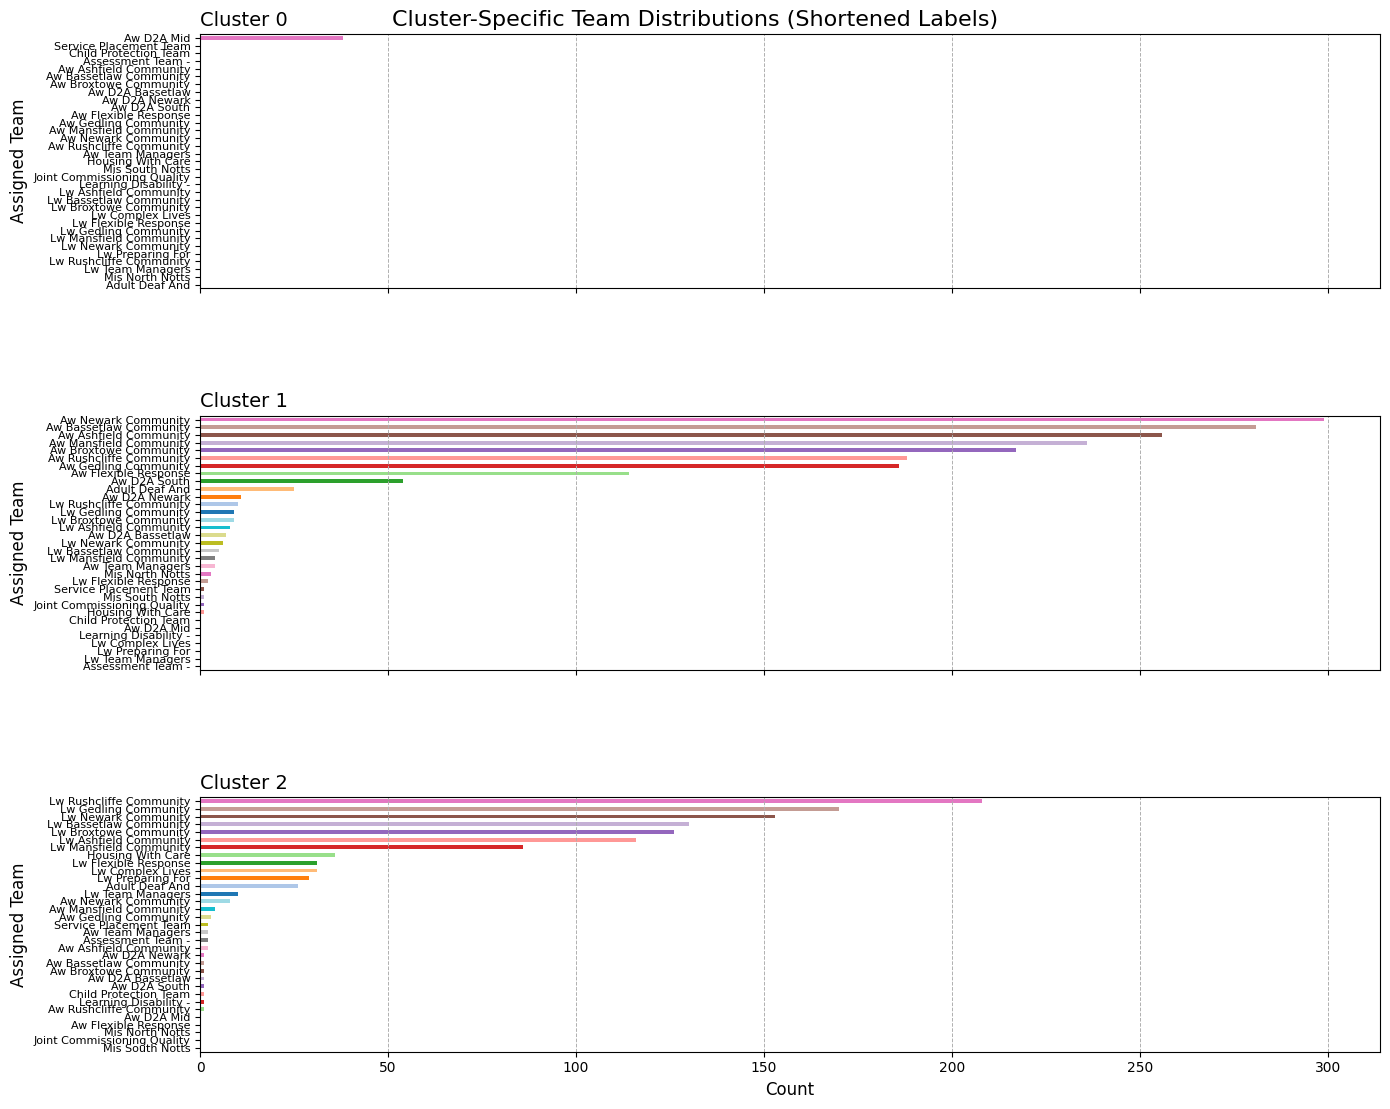

In [ ]:
import matplotlib.pyplot as plt

# Shorten team names for readability
team_distribution_short = team_distribution.rename(
    columns=lambda x: ' '.join(x.split()[:3])  # Shorten to the first 3 words
)

# Plot each cluster in separate subplots
fig, axes = plt.subplots(
    nrows=team_distribution_short.shape[0], figsize=(14, 12), sharex=True
)

for i, (cluster, row) in enumerate(team_distribution_short.iterrows()):
    # Sort values for better readability
    sorted_row = row.sort_values(ascending=True)

    # Plot horizontal bar chart
    sorted_row.plot(kind="barh", ax=axes[i], color=plt.cm.tab20.colors)

    # Customize each subplot
    axes[i].set_title(f"Cluster {cluster}", fontsize=14, loc="left")
    axes[i].set_xlabel("Count", fontsize=12)
    axes[i].set_ylabel("Assigned Team", fontsize=12)
    axes[i].tick_params(axis="y", labelsize=8)  # Adjust font size for y-axis labels

    # Set gridlines for better readability
    axes[i].grid(axis="x", linestyle="--", linewidth=0.7)

# Adjust layout and overall title
fig.suptitle("Cluster-Specific Team Distributions (Shortened Labels)", fontsize=16, y=0.92)
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.5)  # Adjust spacing between plots
plt.show()


In [ ]:
top_n = 10  # Adjust this value to display more or fewer teams
sorted_row = row.sort_values(ascending=True).tail(top_n)


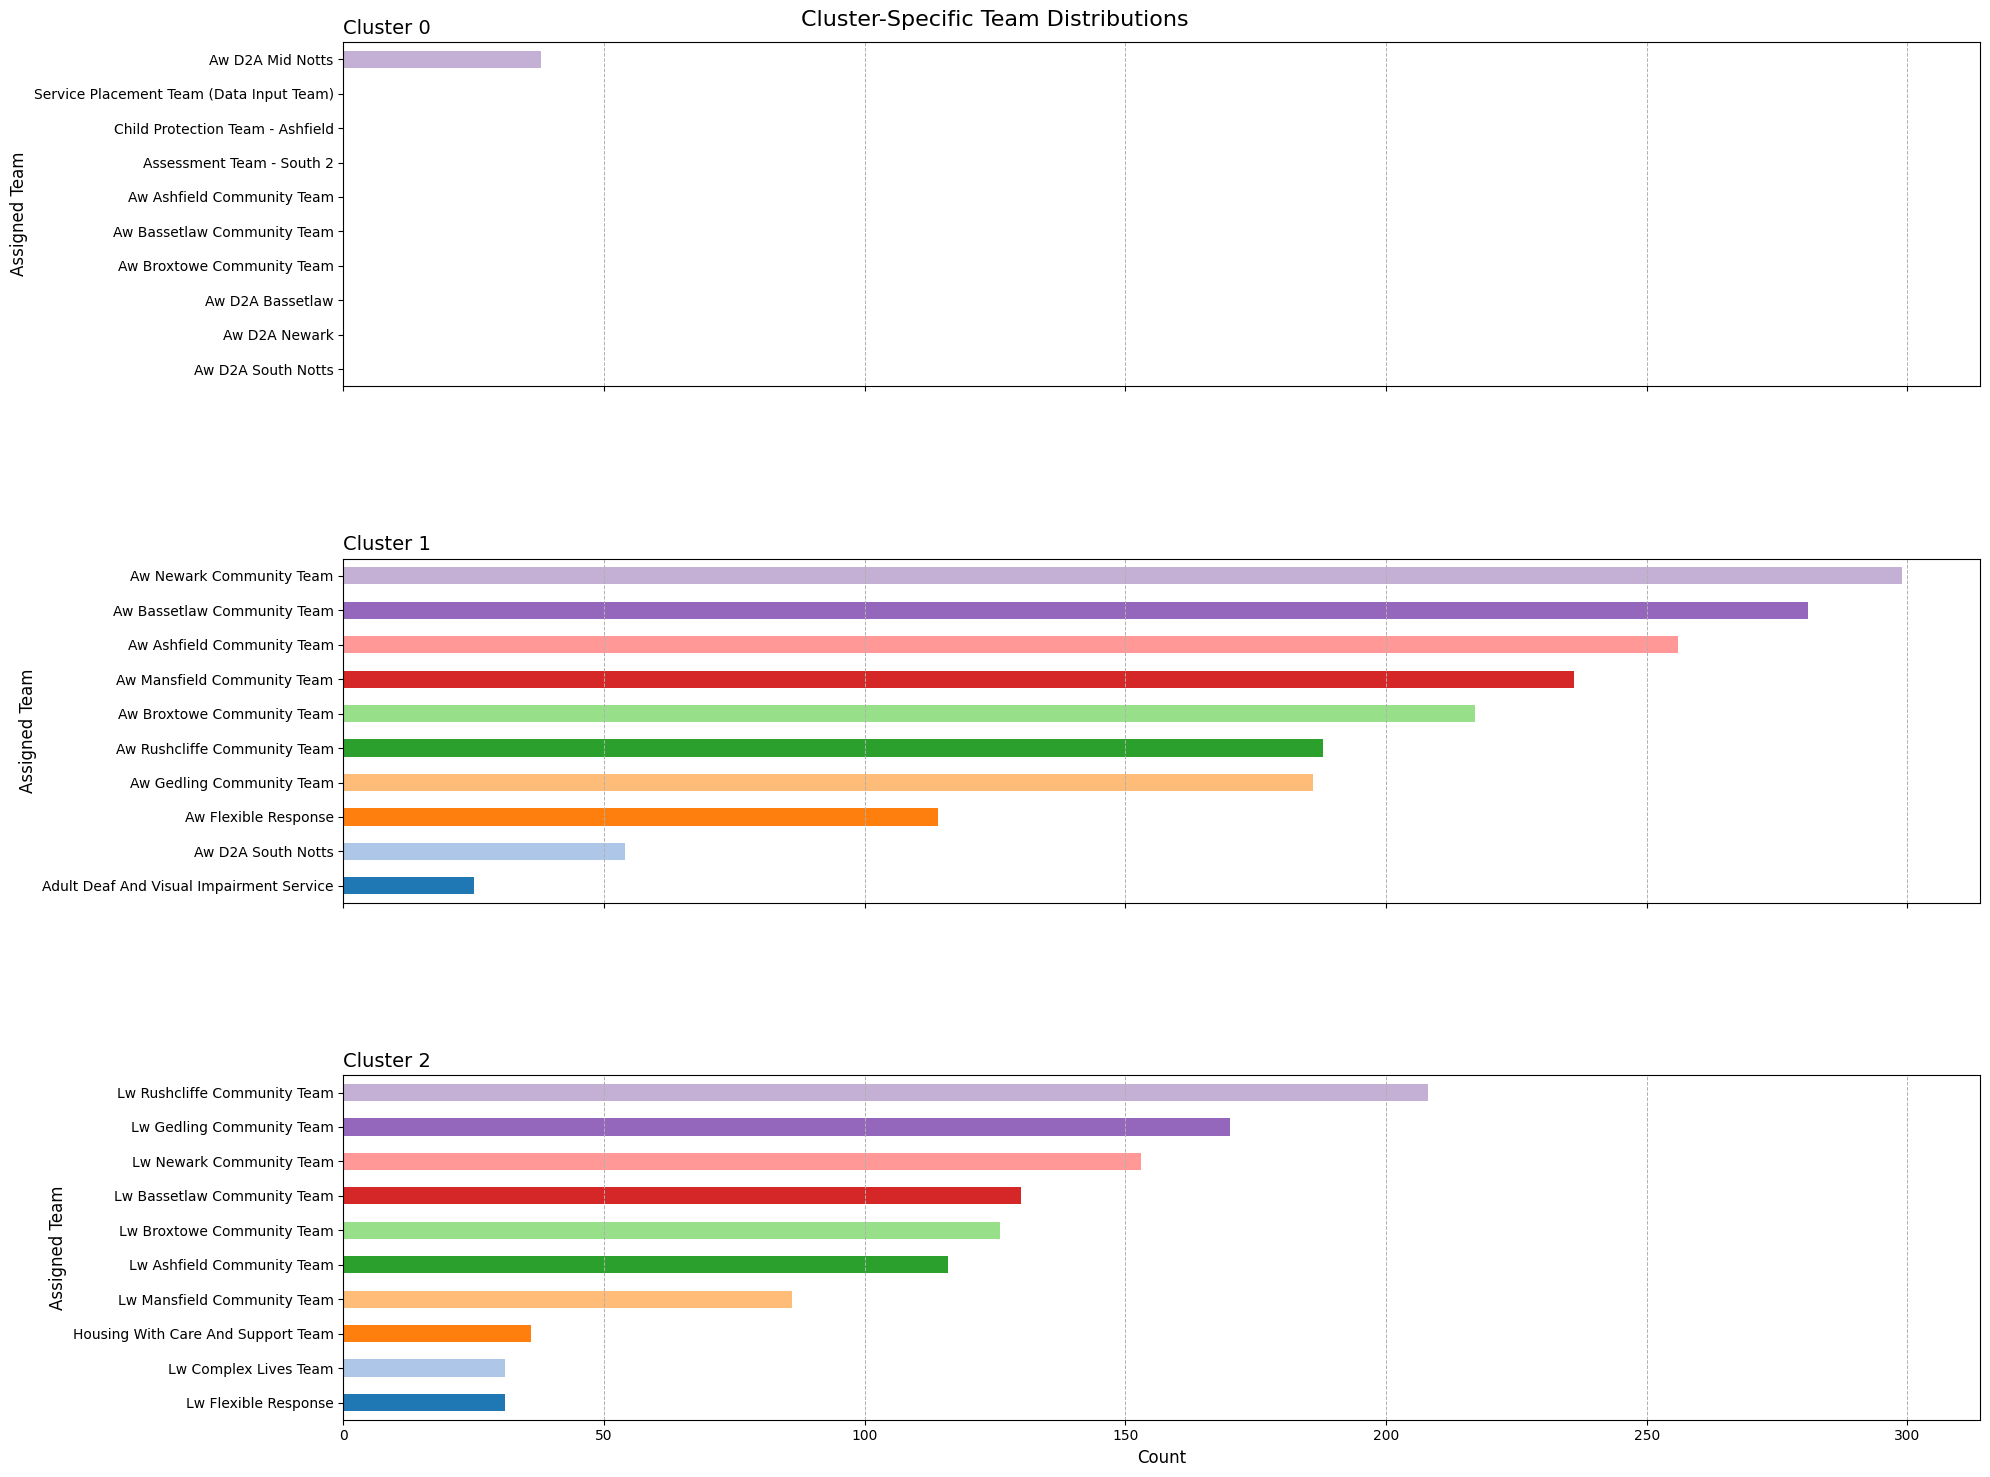

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your dataframe and already loaded with 'Cluster' and 'Assigned Team' columns

# Group data by Cluster and Assigned Team to calculate counts
team_distribution = data.groupby(['Cluster', 'Assigned Team']).size().unstack(fill_value=0)

# Define the maximum number of teams to show per cluster and threshold for combining smaller teams
top_n = 10  # Display top N teams per cluster
threshold = 5  # Combine teams with counts below this threshold into "Other"

# Plot a horizontal bar chart for each cluster
fig, axes = plt.subplots(nrows=team_distribution.shape[0], figsize=(20, 16), sharex=True)

for i, (cluster, row) in enumerate(team_distribution.iterrows()):
    # Combine smaller teams into "Other" category
    row = row.copy()
    small_teams = row[row < threshold].sum()  # Sum counts of small teams
    row.loc[row < threshold] = 0  # Set small team counts to 0
    if small_teams > 0:  # If there are small teams, create an "Other" category
        row["Other"] = small_teams

    # Sort and select the top N teams
    sorted_row = row.sort_values(ascending=True).tail(top_n)

    # Plot horizontal bar chart
    sorted_row.plot(kind="barh", ax=axes[i], color=plt.cm.tab20.colors)

    # Customize each subplot
    axes[i].set_title(f"Cluster {cluster}", fontsize=14, loc="left")
    axes[i].set_xlabel("Count", fontsize=12)
    axes[i].set_ylabel("Assigned Team", fontsize=12)
    axes[i].tick_params(axis="y", labelsize=10)  # Adjust font size for y-axis labels

    # Set gridlines for better readability
    axes[i].grid(axis="x", linestyle="--", linewidth=0.7)

# Add overall title and adjust layout
fig.suptitle("Cluster-Specific Team Distributions", fontsize=16, y=0.92)
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.5)  # Adjust spacing between plots
plt.show()


In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Use the uploaded file's name
file_name = list(uploaded.keys())[0]  # Automatically get the uploaded file name
data = pd.read_excel(file_name)

# Step 3: Display the data
print(data.head())


Saving cleaned_social_care_data.xlsx to cleaned_social_care_data (1).xlsx
   Person Id Current  Age  Band    Step Id      Review Type Step  Start  Date  \
0    1000475            18 - 64  117938297  Community Based        2024-01-17   
1    1000475            18 - 64  117513870  Community Based        2023-06-07   
2    1000475            18 - 64  116851029  Community Based        2022-12-20   
3    1000556            18 - 64  117893089  Community Based        2023-08-25   
4    1001514        65 And Over  117000755  Community Based        2023-11-27   

  Step  End  Date Type of Review   Reason for Unplanned  \
0      2024-01-18      Unplanned        Change In Needs   
1      2023-06-07      Unplanned   Carer Related Change   
2      2023-05-25      Unplanned        Change In Needs   
3      2023-08-25      Unplanned         Provider Issue   
4      2023-12-11      Unplanned  Safeguarding Concerns   

                        Assigned Team  
0          Lw Ashfield Community Team  
1   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_excel('/content/cleaned_social_care_data (7).xlsx')  # Adjust file name if necessary

# Step 2: Count unplanned reviews for each individual
# Assuming "Reason for Unplanned" is not null for unplanned reviews
unplanned_reviews = data[~data['Reason for Unplanned'].isna()]
review_counts = unplanned_reviews.groupby('Person Id').size()

# Step 3: Categorize the counts
categories = {
    "1 Review": (review_counts == 1).sum(),
    "2 Reviews": (review_counts == 2).sum(),
    "3 Reviews": (review_counts == 3).sum(),
    "4 Reviews": (review_counts == 4).sum(),
    "5 Reviews": (review_counts == 5).sum(),
    "6 Reviews": (review_counts == 6).sum(),
    "7+ Reviews": (review_counts >= 7).sum(),
}

# Step 4: Create a frequency table
frequency_table = pd.DataFrame(list(categories.items()), columns=['Category', 'Count'])

# Export the frequency table to an Excel file
output_path = '/content/unplanned_review_frequency.xlsx'
frequency_table.to_excel(output_path, index=False)
print(f"Frequency table saved to {output_path}")

# Step 5: Maximum number of unplanned reviews
max_reviews = review_counts.max()
print(f"\nMaximum number of unplanned reviews for any individual: {max_reviews}")

# Step 6: Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(frequency_table['Category'], frequency_table['Count'], color='skyblue')

# Add count annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', fontsize=10)

# Customize the plot
plt.title("Frequency of Unplanned Reviews per Individual", fontsize=14)
plt.xlabel("Number of Reviews", fontsize=12)
plt.ylabel("Count of Individuals", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned_social_care_data (7).xlsx'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_social_care_data.xlsx to cleaned_social_care_data (2).xlsx


In [ ]:
file_name = list(uploaded.keys())[0]  # Automatically fetch the uploaded file name
data = pd.read_excel(file_name)  # Use the uploaded file


Saving cleaned_social_care_data.xlsx to cleaned_social_care_data (3).xlsx
Frequency table saved to /content/unplanned_review_frequency.xlsx

Maximum number of unplanned reviews for any individual: 8


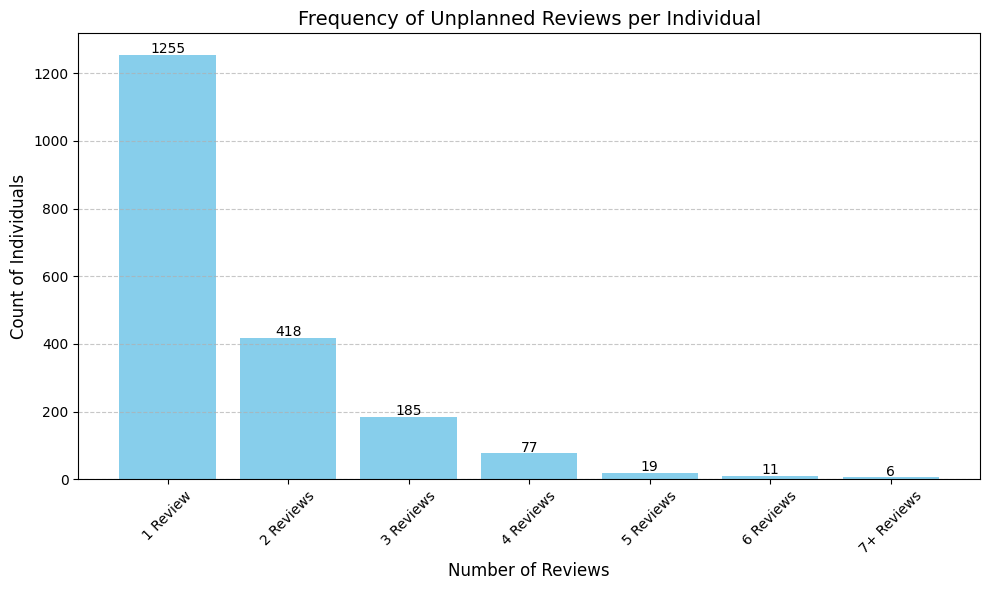

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Upload and Load the File
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Automatically fetch the uploaded file name
data = pd.read_excel(file_name)  # Load the uploaded file

# Step 2: Count unplanned reviews for each individual
# Assuming "Reason for Unplanned" is not null for unplanned reviews
unplanned_reviews = data[~data['Reason for Unplanned'].isna()]
review_counts = unplanned_reviews.groupby('Person Id').size()

# Step 3: Categorize the counts
categories = {
    "1 Review": (review_counts == 1).sum(),
    "2 Reviews": (review_counts == 2).sum(),
    "3 Reviews": (review_counts == 3).sum(),
    "4 Reviews": (review_counts == 4).sum(),
    "5 Reviews": (review_counts == 5).sum(),
    "6 Reviews": (review_counts == 6).sum(),
    "7+ Reviews": (review_counts >= 7).sum(),
}

# Step 4: Create a frequency table
frequency_table = pd.DataFrame(list(categories.items()), columns=['Category', 'Count'])

# Export the frequency table to an Excel file
output_path = '/content/unplanned_review_frequency.xlsx'
frequency_table.to_excel(output_path, index=False)
print(f"Frequency table saved to {output_path}")

# Step 5: Maximum number of unplanned reviews
max_reviews = review_counts.max()
print(f"\nMaximum number of unplanned reviews for any individual: {max_reviews}")

# Step 6: Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(frequency_table['Category'], frequency_table['Count'], color='skyblue')

# Add count annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', fontsize=10)

# Customize the plot
plt.title("Frequency of Unplanned Reviews per Individual", fontsize=14)
plt.xlabel("Number of Reviews", fontsize=12)
plt.ylabel("Count of Individuals", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
